In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

In [8]:
data_out = pd.read_csv('/content/drive/MyDrive/TFG_Vanesa_Gómez_Martínez/BPtRoster.csv')

In [9]:
data_out.head()

RecID  PtID BCaseControlStatus
0      6   199               Case
1      8   194               Case
2      9    56            Control
3     10   201               Case
4     11   107            Control

In [10]:
data_out.drop(['RecID'], axis=1, inplace=True)


In [11]:

data_out.head()

PtID BCaseControlStatus
0   199               Case
1   194               Case
2    56            Control
3   201               Case
4   107            Control

De esta manera, nos quedamos con el ID correspondiente para cada paciente

A continuación, reemplazo a los pacientes Caso por un 1, y a los pacientes Control por un 0, consiguiendo así una variable binaria:

In [12]:
data_out['BCaseControlStatus']=data_out['BCaseControlStatus'].replace(['Case'], 1).replace(['Control'], 0)


In [13]:
data_out.head()

PtID  BCaseControlStatus
0   199                   1
1   194                   1
2    56                   0
3   201                   1
4   107                   0

In [14]:
data_out.isnull().values.any()

False

Además, no existe ningún valor NaN, por lo que no existen valores perdidos en los pacientes caso y control.

A continuación, uniremos los dos dataframes por su PtID y así crear un único dataframe:

In [15]:
data1=pd.read_csv('/content/drive/MyDrive/TFG_Vanesa_Gómez_Martínez/BBGAttitudeScale.csv', sep=';')

In [16]:

data1.head()

RecID  PtID  BBGAttitudeScaleNotDone  BBGAttitudeScaleCompEnroll  \
0      9   199                      NaN                         0.0   
1     19    56                      NaN                         0.0   
2     14   201                      NaN                         0.0   
3     15   107                      NaN                         0.0   
4     18    47                      NaN                        11.0   

          DealHypoEp     UndertreatHypo       HighBGDamage FreqHypoDamage  \
0     Strongly agree     Strongly agree     Strongly agree          Agree   
1            Neutral              Agree              Agree          Agree   
2  Strongly disagree  Strongly disagree  Strongly disagree          Agree   
3              Agree              Agree              Agree          Agree   
4     Strongly agree              Agree              Agree          Agree   

       DangersHighBG  HighBGLevTakeAction  LowBGLevTakeAction  PtCurrA1cGoal  
0     Strongly agree                200.0                70.0           65.0  
1  Strongly disagree                230.0                70.0          120.0  
2  Strongly disagree                250.0                50.0           60.0  
3     Strongly agree                150.0                60.0           58.0  
4            Neutral                150.0                60.0            NaN

In [17]:
data1.drop(['RecID'], axis=1, inplace=True)


In [18]:
data1.head()

PtID  BBGAttitudeScaleNotDone  BBGAttitudeScaleCompEnroll  \
0   199                      NaN                         0.0   
1    56                      NaN                         0.0   
2   201                      NaN                         0.0   
3   107                      NaN                         0.0   
4    47                      NaN                        11.0   

          DealHypoEp     UndertreatHypo       HighBGDamage FreqHypoDamage  \
0     Strongly agree     Strongly agree     Strongly agree          Agree   
1            Neutral              Agree              Agree          Agree   
2  Strongly disagree  Strongly disagree  Strongly disagree          Agree   
3              Agree              Agree              Agree          Agree   
4     Strongly agree              Agree              Agree          Agree   

       DangersHighBG  HighBGLevTakeAction  LowBGLevTakeAction  PtCurrA1cGoal  
0     Strongly agree                200.0                70.0           65.0  
1  Strongly disagree                230.0                70.0          120.0  
2  Strongly disagree                250.0                50.0           60.0  
3     Strongly agree                150.0                60.0           58.0  
4            Neutral                150.0                60.0            NaN

In [19]:
data = data_out.merge(data1, on='PtID')


In [20]:
data.head()

PtID  BCaseControlStatus  BBGAttitudeScaleNotDone  \
0   199                   1                      NaN   
1    56                   0                      NaN   
2   201                   1                      NaN   
3   107                   0                      NaN   
4    47                   1                      NaN   

   BBGAttitudeScaleCompEnroll         DealHypoEp     UndertreatHypo  \
0                         0.0     Strongly agree     Strongly agree   
1                         0.0            Neutral              Agree   
2                         0.0  Strongly disagree  Strongly disagree   
3                         0.0              Agree              Agree   
4                        11.0     Strongly agree              Agree   

        HighBGDamage FreqHypoDamage      DangersHighBG  HighBGLevTakeAction  \
0     Strongly agree          Agree     Strongly agree                200.0   
1              Agree          Agree  Strongly disagree                230.0   
2  Strongly disagree          Agree  Strongly disagree                250.0   
3              Agree          Agree     Strongly agree                150.0   
4              Agree          Agree            Neutral                150.0   

   LowBGLevTakeAction  PtCurrA1cGoal  
0                70.0           65.0  
1                70.0          120.0  
2                50.0           60.0  
3                60.0           58.0  
4                60.0            NaN

In [21]:
print(data.shape)

(201, 12)


In [22]:
data.drop(['PtID'], axis=1, inplace=True)


In [23]:
data.shape

(201, 11)

In [24]:
data.dtypes

BCaseControlStatus              int64
BBGAttitudeScaleNotDone       float64
BBGAttitudeScaleCompEnroll    float64
DealHypoEp                     object
UndertreatHypo                 object
HighBGDamage                   object
FreqHypoDamage                 object
DangersHighBG                  object
HighBGLevTakeAction           float64
LowBGLevTakeAction            float64
PtCurrA1cGoal                 float64
dtype: object

Ya tenemos ambos dataframes unidos por PtID, así a continuación podemos empezar a tratar los datos

# ***Visualización de datos***

In [25]:
import matplotlib.gridspec as gridspec
from collections import Counter

DealHypoEp


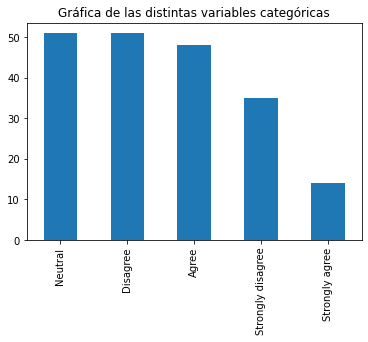

UndertreatHypo


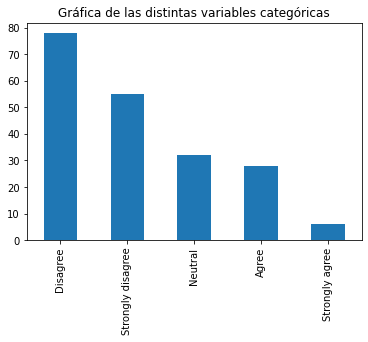

HighBGDamage


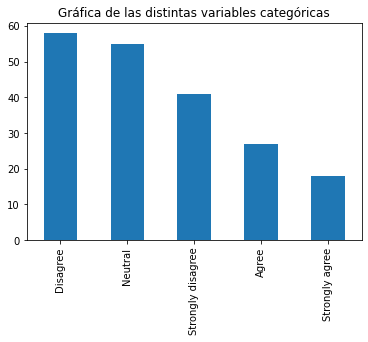

FreqHypoDamage


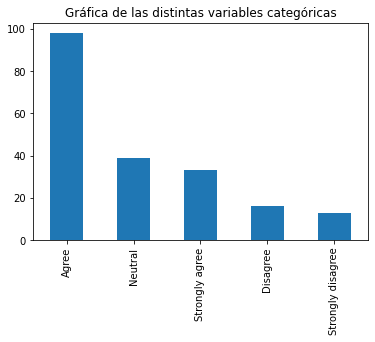

DangersHighBG


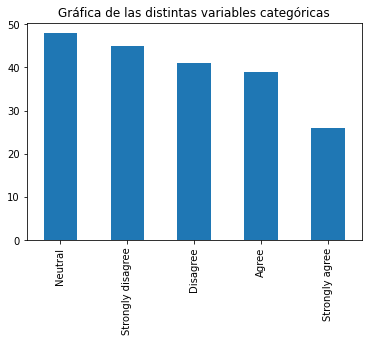

In [26]:
for i in data:
  if data[i].dtypes=='object':
    data[i].value_counts().plot.bar(title='Gráfica de las distintas variables categóricas')
    print(i)
    plt.show()

A la vista de los resultados se agrupan las siguientes categorías:

In [27]:
data['DangersHighBG']=data['DangersHighBG'].replace(['Strongly agree'], ['Agree']).replace(['Strongly disagree'], ['Disagree'])
data['FreqHypoDamage']=data['FreqHypoDamage'].replace(['Strongly agree'], ['Agree']).replace(['Strongly disagree'], ['Disagree'])
data['HighBGDamage']=data['HighBGDamage'].replace(['Strongly agree'], ['Agree']).replace(['Strongly disagree'], ['Disagree'])
data['UndertreatHypo']=data['UndertreatHypo'].replace(['Strongly agree'], ['Agree']).replace(['Strongly disagree'], ['Disagree'])
data['DealHypoEp']=data['DealHypoEp'].replace(['Strongly agree'], ['Agree']).replace(['Strongly disagree'], ['Disagree'])


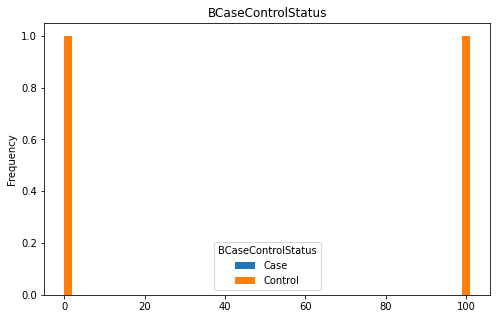

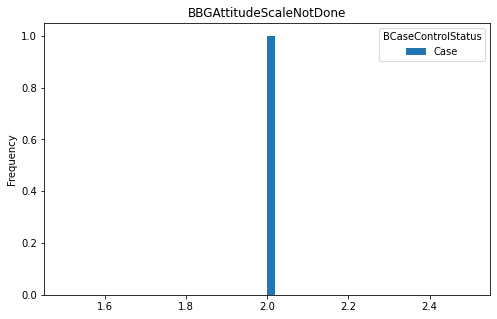

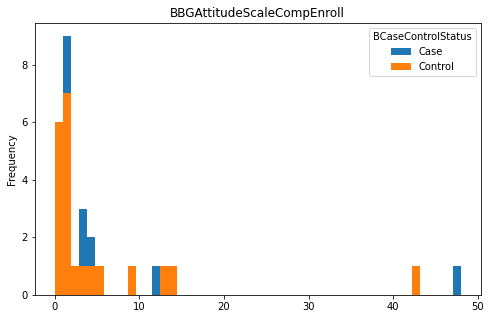

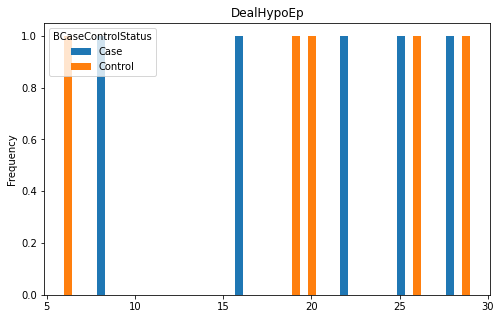

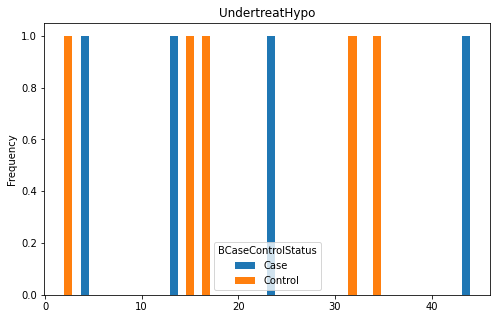

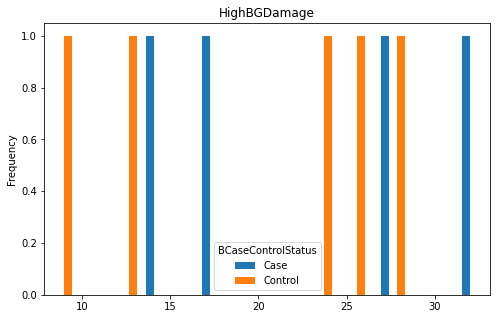

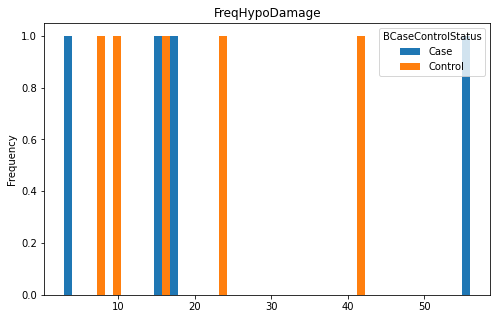

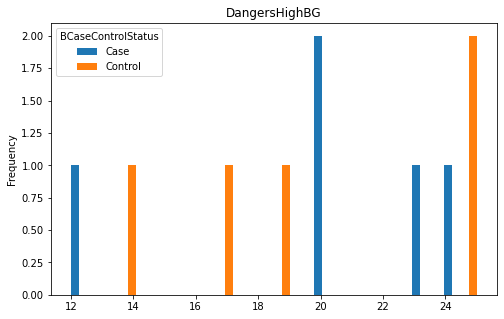

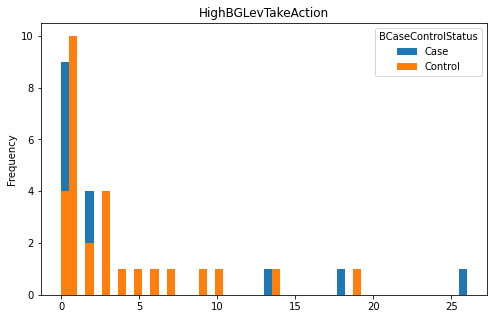

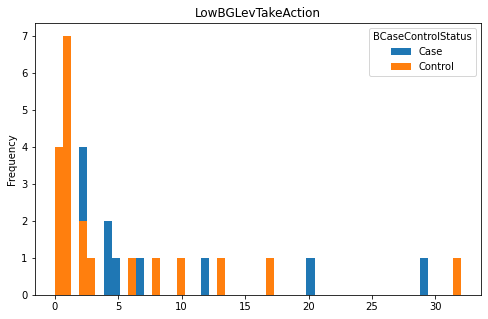

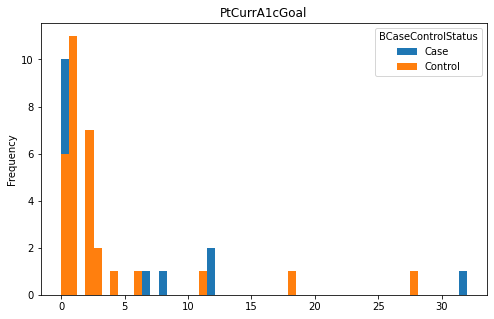

In [ ]:

for i in data:
#   # if data[i].dtypes!='object':
  plot=pd.crosstab(index=data[i], columns=data['BCaseControlStatus']).apply(lambda r : r, axis=1).plot(kind='hist',bins=50,title=i,layout=(4,4))
  plt.rcParams["figure.figsize"] = (8, 5)


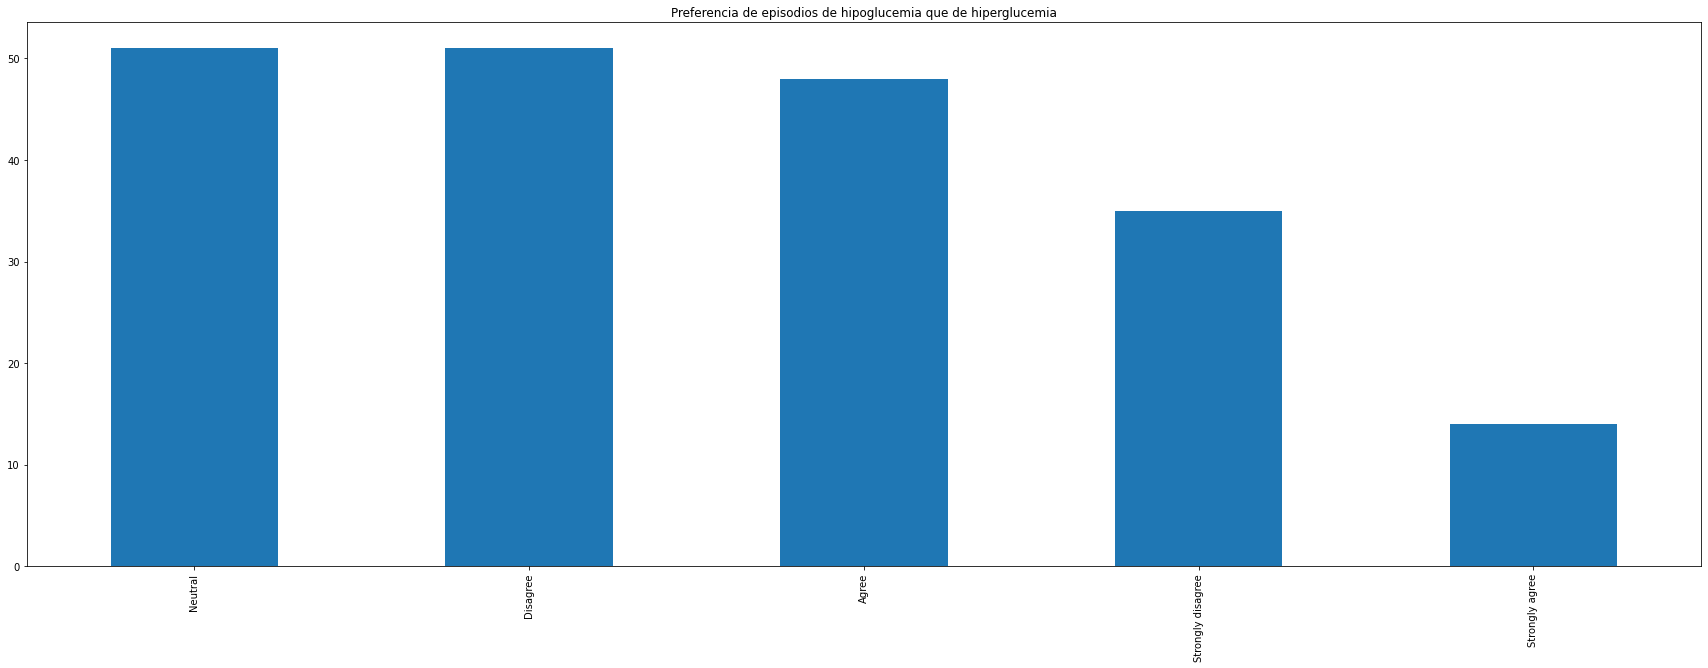

In [ ]:
data['DealHypoEp'].value_counts().plot.bar(title="Preferencia de episodios de hipoglucemia que de hiperglucemia")

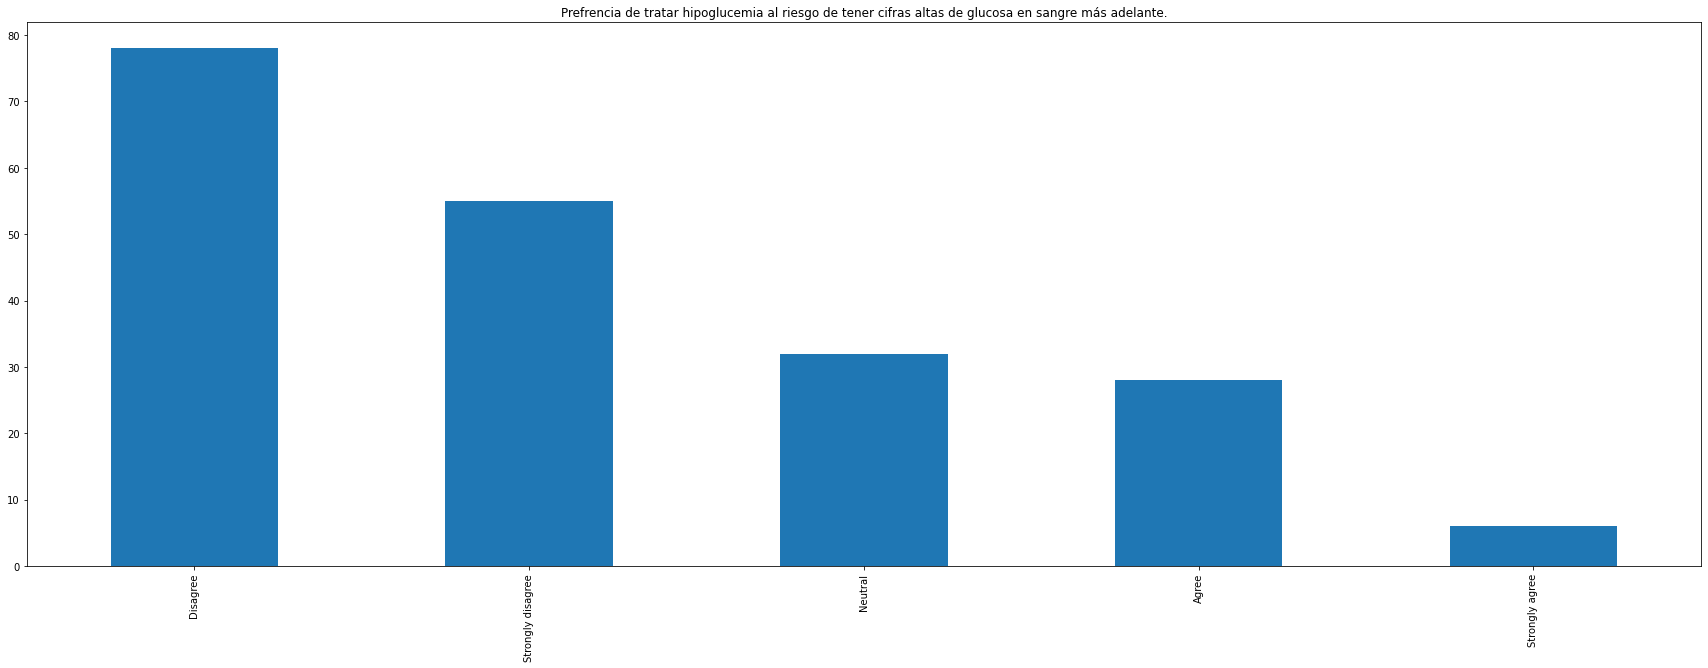

In [ ]:
data['UndertreatHypo'].value_counts().plot.bar(title="Prefrencia de tratar hipoglucemia al riesgo de tener cifras altas de glucosa en sangre más adelante.")

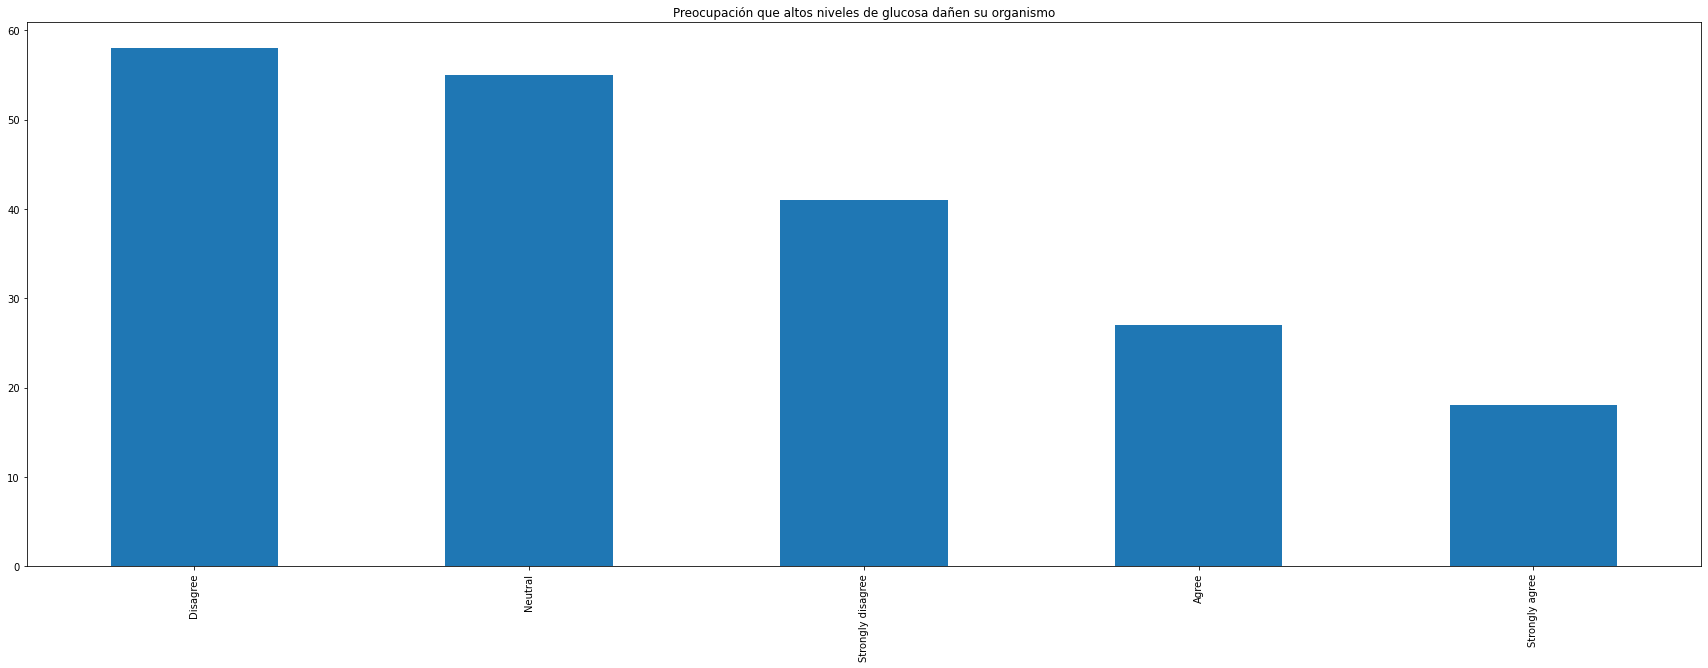

In [ ]:
data['HighBGDamage'].value_counts().plot.bar(title="Preocupación que altos niveles de glucosa dañen su organismo")

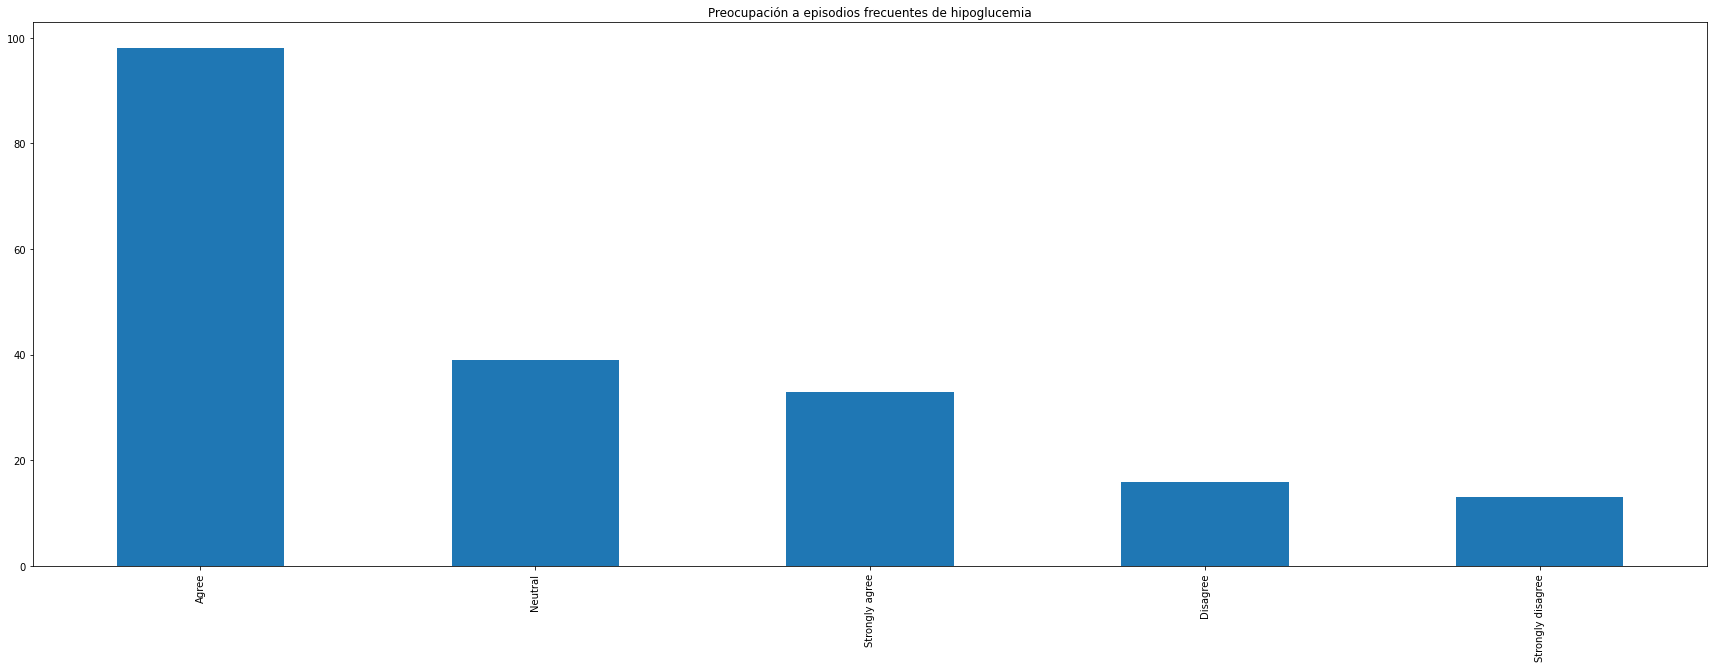

In [ ]:
data['FreqHypoDamage'].value_counts().plot.bar(title="Preocupación a episodios frecuentes de hipoglucemia")

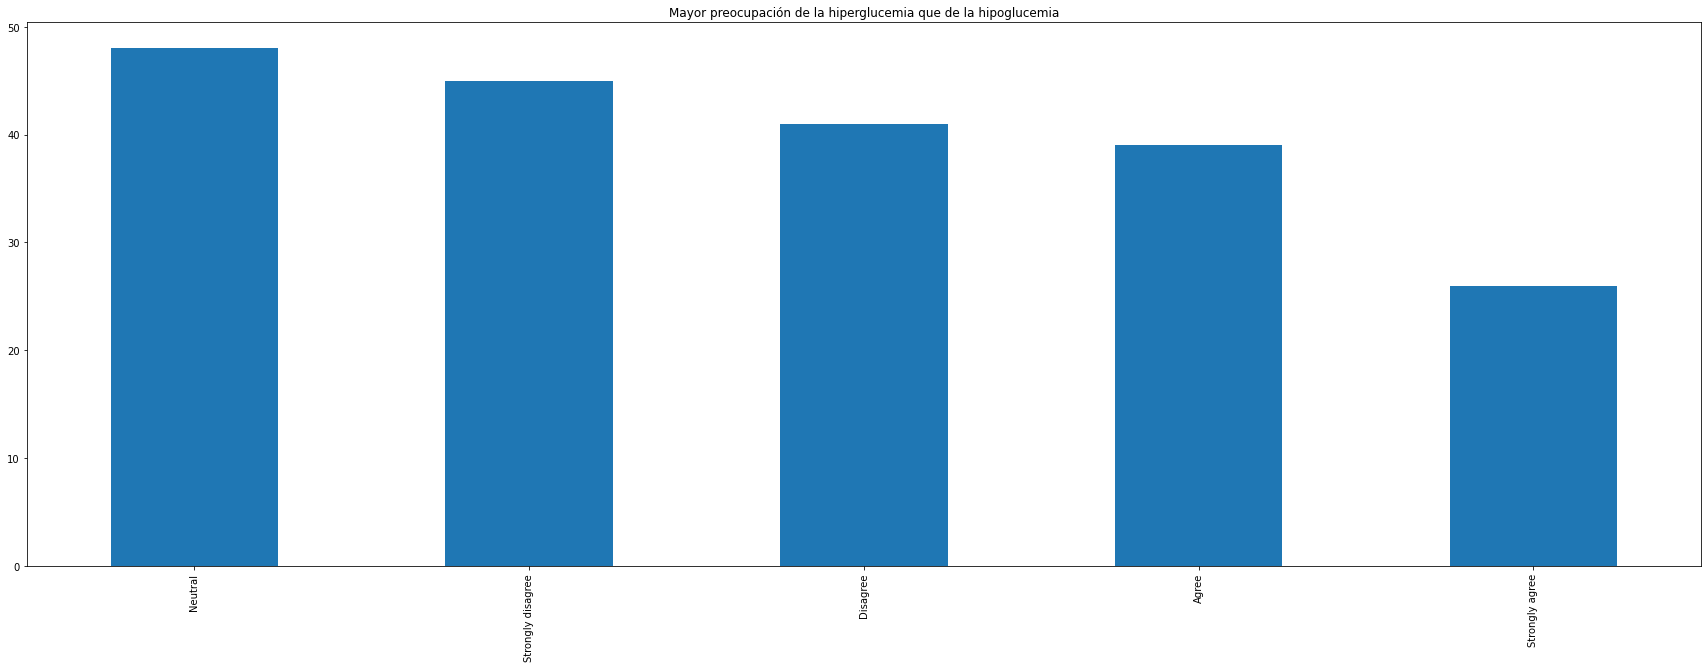

In [ ]:
data['DangersHighBG'].value_counts().plot.bar(title="Mayor preocupación de la hiperglucemia que de la hipoglucemia")

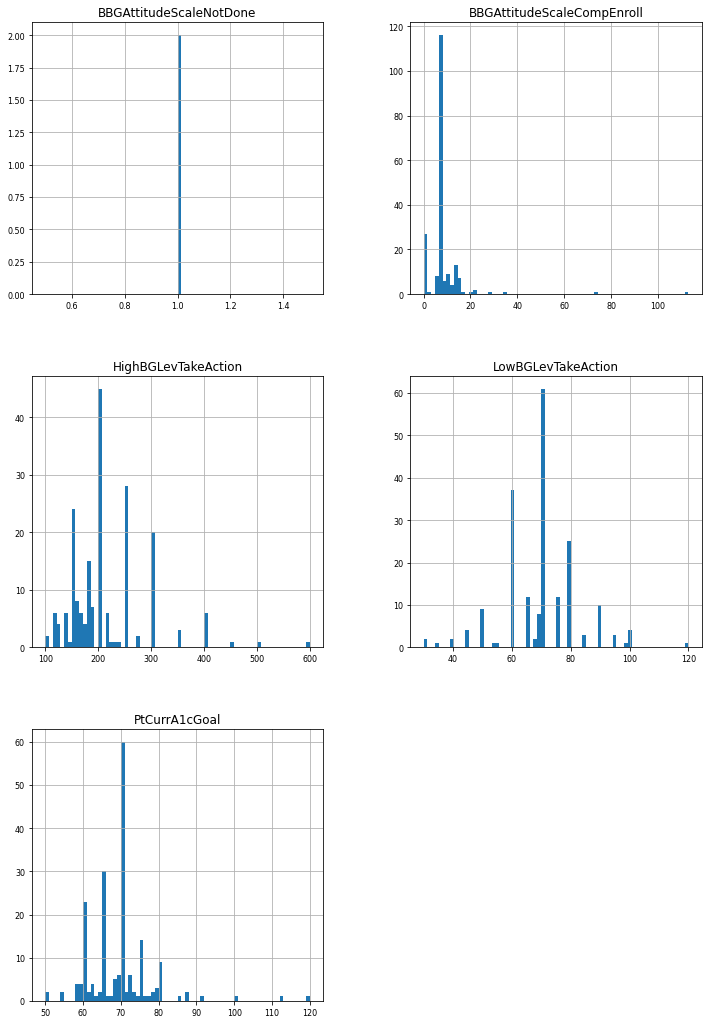

In [ ]:

# Histogram
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

# ***GRÁFICAS TFG CÓDIGO***

In [ ]:
list_num_features=['HighBGLevTakeAction','LowBGLevTakeAction','PtCurrA1cGoal'] #VARIABLES NUMÉRICAS
list_cat_features=['DealHypoEp','UndertreatHypo','HighBGDamage','FreqHypoDamage','DangersHighBG'] #VARIABLES CATEGÓRICAS

In [ ]:
#SE SUSTITUYEN POR ESAS ABREVIATURAS PARA QUE SE VEA MEJOR EN LAS GRÁFICAS
data['DangersHighBG']=data['DangersHighBG'].replace(['Strongly agree'], ['SA']).replace(['Strongly disagree'], ['SD']).replace(['Disagree'], ['D']).replace(['Agree'], ['A']).replace(['Neutral'], ['N'])
data['FreqHypoDamage']=data['FreqHypoDamage'].replace(['Strongly agree'], ['SA']).replace(['Strongly disagree'], ['SD']).replace(['Disagree'], ['D']).replace(['Agree'], ['A']).replace(['Neutral'], ['N'])
data['HighBGDamage']=data['HighBGDamage'].replace(['Strongly agree'], ['SA']).replace(['Strongly disagree'], ['SD']).replace(['Disagree'], ['D']).replace(['Agree'], ['A']).replace(['Neutral'], ['N'])
data['UndertreatHypo']=data['UndertreatHypo'].replace(['Strongly agree'], ['SA']).replace(['Strongly disagree'], ['SD']).replace(['Disagree'], ['D']).replace(['Agree'], ['A']).replace(['Neutral'], ['N'])
data['DealHypoEp']=data['DealHypoEp'].replace(['Strongly agree'], ['SA']).replace(['Strongly disagree'], ['SD']).replace(['Disagree'], ['D']).replace(['Agree'], ['A']).replace(['Neutral'], ['N'])

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
#CÓDIGO GRÁFICAS VARIABLES NUMÉRICAS
for column_name in list_num_features:
  high=data[data.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
  high2=data[data.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  plt.hist([high, high2], bins=30, label=['Caso', 'Control'])
  plt.legend(loc='upper left')
  plt.rcParams["figure.figsize"] = (4, 3)
  # plt.show()
  plt.savefig("{}.pdf".format(column_name))
  plt.close()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [ ]:
#CÓDIGO GRÁFICAS VARIABLES CATEGÓRICAS
from collections import Counter
def get_unique_categories_and_probs(x, n_samples, flag_normalize):
    counter_samples = Counter(x)
    dict_counter_samples = dict(counter_samples)

    x_unique = np.array(list(dict_counter_samples.keys()))
    counts_categories = np.array(list(dict_counter_samples.values()))

    y_pos = np.arange(len(x_unique))

    if flag_normalize:
        probs = np.array(counts_categories) / n_samples
    else:
        probs = np.array(counts_categories)

    return x_unique, probs, y_pos

In [ ]:
#CÓDIGO GRÁFICAS VARIABLES CATEGÓRICAS
n_samples=data.shape[0]
flag_normalize=True
width=0.35
for column_name in list_cat_features:
  high=data[data.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
  high2=data[data.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  # plt.hist([high, high2], bins=80, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  # plt.show()
  x_unique1, probs1, y_pos1 = get_unique_categories_and_probs(high, n_samples, flag_normalize)
  x_unique2, probs2, y_pos2 = get_unique_categories_and_probs(high2, n_samples, flag_normalize)
  plt.bar(y_pos1 - width/2, probs1, width, label='class1', color='#0070FF')
  plt.bar(y_pos2 + width/2, probs2, width, label='class2', color='#FF8E07')
  # plt.legend(loc='upper left')
  plt.xticks(y_pos1, x_unique1, rotation='horizontal')
  plt.rcParams["figure.figsize"] = (4, 3)
  # plt.set_xticklabels([fmt_cat(i) for i in x_unique1], rotation='vertical')
  plt.tight_layout()
  plt.savefig("{}.pdf".format(column_name))
  plt.close()



# ***Preprocesado de datos***

# ***Valores perdidos***

In [ ]:
(data == 0).sum(axis=0)

BCaseControlStatus             0
BBGAttitudeScaleNotDone        0
BBGAttitudeScaleCompEnroll    27
DealHypoEp                     0
UndertreatHypo                 0
HighBGDamage                   0
FreqHypoDamage                 0
DangersHighBG                  0
HighBGLevTakeAction            0
LowBGLevTakeAction             0
PtCurrA1cGoal                  0
dtype: int64

Los ceros pueden tener sentido, ya que en CompEnroll, es el número de días que han tardado en realizar la encuesta, y hay gente que si no la ha realizado han sido 0 días.

In [ ]:
data.isna().sum()

BCaseControlStatus              0
BBGAttitudeScaleNotDone       199
BBGAttitudeScaleCompEnroll      2
DealHypoEp                      2
UndertreatHypo                  2
HighBGDamage                    2
FreqHypoDamage                  2
DangersHighBG                   2
HighBGLevTakeAction             2
LowBGLevTakeAction              2
PtCurrA1cGoal                   6
dtype: int64

In [ ]:
!pip install missingno




In [ ]:
import missingno as msno

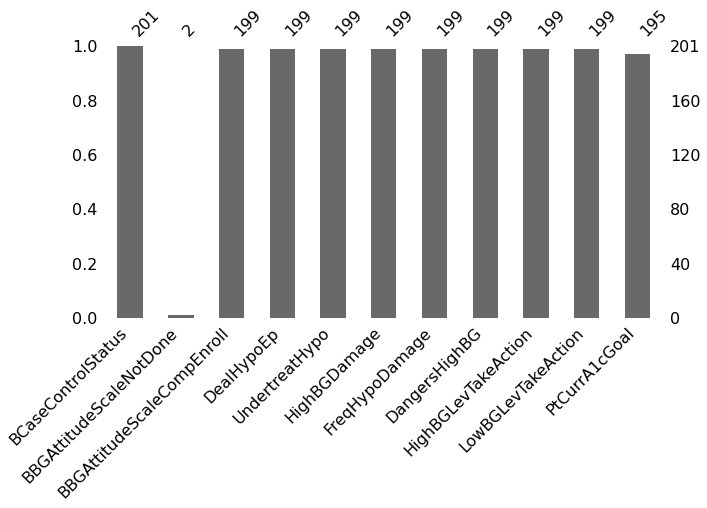

In [ ]:
msno.bar(data, figsize=(10,5))

Vemos que para la variable BBGAAttitudeScaleNotDone prácticamente todos los pacientes presentan valores nulos, por lo que lo más adecuado sería eliminar esa variable de nuestro dataframe. 

In [28]:
data.drop(['BBGAttitudeScaleNotDone'], axis=1, inplace=True)
data.drop(['BBGAttitudeScaleCompEnroll'], axis=1, inplace=True)

Graficamos a continuación a partir de un mapa de color como se están comportando esos valores NaN en las distintas variables y pacientes:

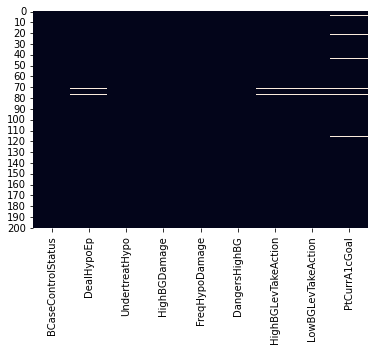

In [ ]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(data.isnull(), cbar=False)

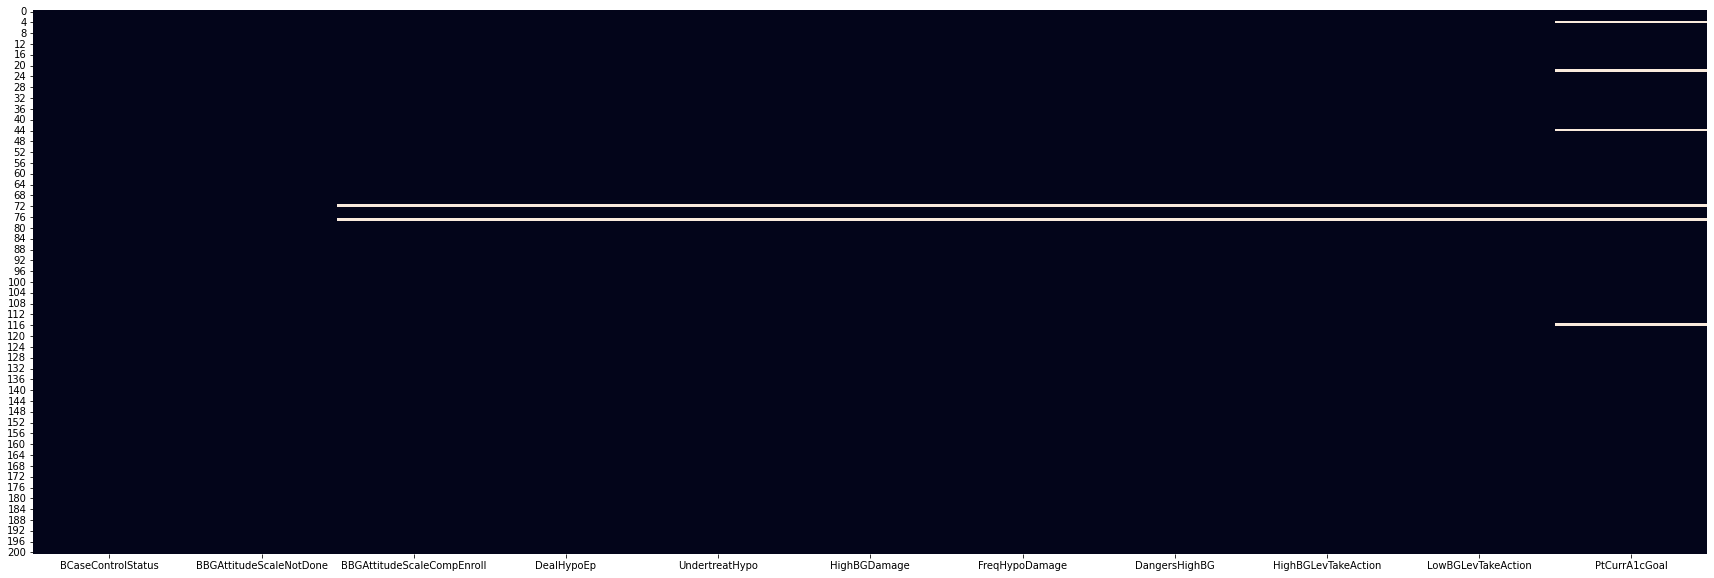

In [ ]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(data.isnull(), cbar=False)

Ahora ya solo nos quedaría reemplazar los valores NaN por la KNN en la última variable. Esto lo haremos una vez separemos la base de datos en los subconjuntos de entrenamiento y de test.

# ***Outliers***

Para ver si la base de datos presenta o no outliers, me ayudaré a partir de la visualización de los diagramas de cajas:

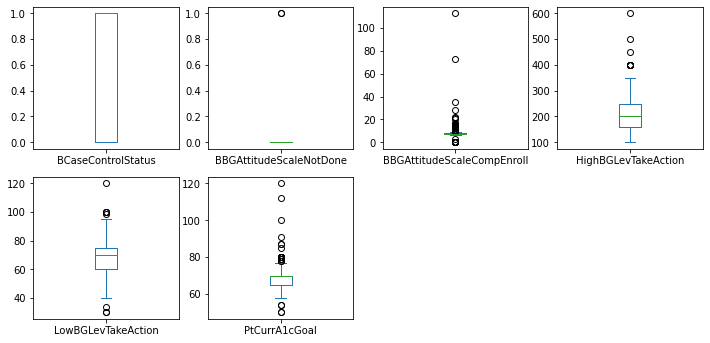

In [ ]:
data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

# ***Matriz de correlación***

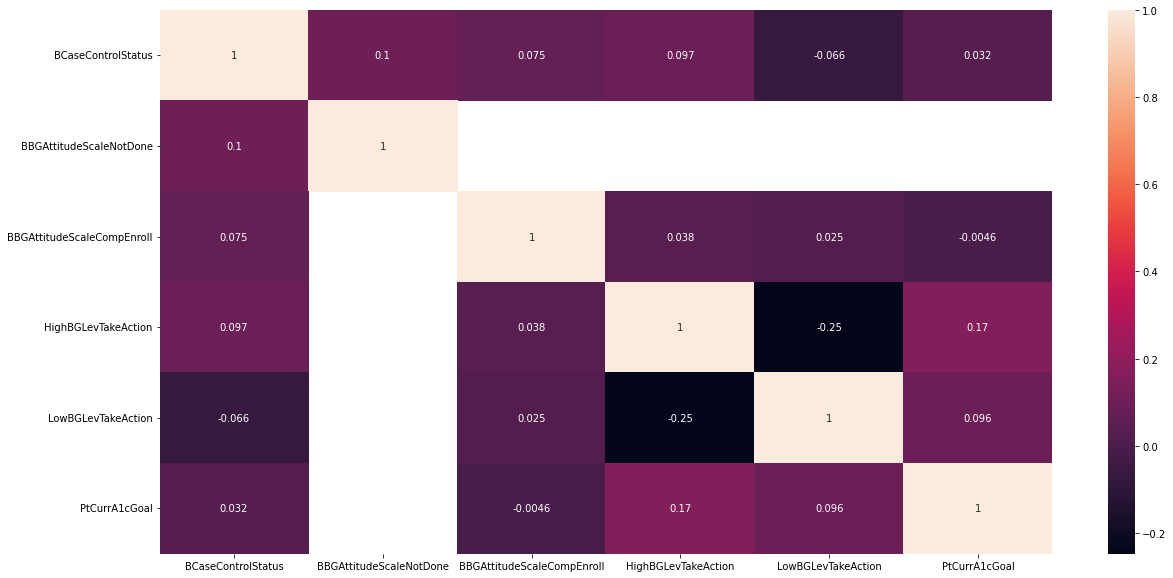

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# ***VALIDACIÓN CRUZADA***

# ***MÓDELOS***

In [29]:
from statistics import mode

data["DealHypoEp"].replace(np.nan, mode(data["DealHypoEp"]), inplace=True)
data["UndertreatHypo"].replace(np.nan, mode(data["UndertreatHypo"]), inplace=True)
data["HighBGDamage"].replace(np.nan, mode(data["HighBGDamage"]), inplace=True)
data["FreqHypoDamage"].replace(np.nan, mode(data["FreqHypoDamage"]), inplace=True)
data["DangersHighBG"].replace(np.nan, mode(data["DangersHighBG"]), inplace=True)

In [ ]:
import collections
# list_1 = [1, 1, 5, 6, 3, 3]
# print("list_1: ", list_1)
dict_1 =dict(collections.Counter(data["DealHypoEp"]))
print("dict_1: ", dict_1)
highest_freq = max(dict_1.values())
print("highest_freq: ", highest_freq)
for key in sorted(dict_1):
    if dict_1[key] == highest_freq:
        print("The mode is: ", key)
        break

dict_1:  {'Agree': 62, 'Neutral': 51, 'Disagree': 88}
highest_freq:  88
The mode is:  Disagree


In [ ]:
data.isna().sum()


BCaseControlStatus     0
DealHypoEp             0
UndertreatHypo         0
HighBGDamage           0
FreqHypoDamage         0
DangersHighBG          0
HighBGLevTakeAction    2
LowBGLevTakeAction     2
PtCurrA1cGoal          6
dtype: int64

Hacemos OHE en las variables categóricas

In [30]:
from sklearn.preprocessing import OneHotEncoder

def var_categ(variable):
  global data
  enc = OneHotEncoder(handle_unknown='ignore')
  enc_data = pd.DataFrame(enc.fit_transform(data[[variable]]).toarray())
  data[variable].value_counts() # Identifity categories
  enc_data.describe()
  #Solo incluye categorías que tengan datos
  #aunque no tengan datos
  data = pd.concat([data,pd.get_dummies(data[variable], prefix=variable)],axis=1)

In [31]:
var_categ("DealHypoEp")
var_categ("UndertreatHypo")
var_categ("HighBGDamage")
var_categ("FreqHypoDamage")
var_categ("DangersHighBG")


In [32]:
data.head()

BCaseControlStatus DealHypoEp UndertreatHypo HighBGDamage FreqHypoDamage  \
0                   1      Agree          Agree        Agree          Agree   
1                   0    Neutral          Agree        Agree          Agree   
2                   1   Disagree       Disagree     Disagree          Agree   
3                   0      Agree          Agree        Agree          Agree   
4                   1      Agree          Agree        Agree          Agree   

  DangersHighBG  HighBGLevTakeAction  LowBGLevTakeAction  PtCurrA1cGoal  \
0         Agree                200.0                70.0           65.0   
1      Disagree                230.0                70.0          120.0   
2      Disagree                250.0                50.0           60.0   
3         Agree                150.0                60.0           58.0   
4       Neutral                150.0                60.0            NaN   

   DealHypoEp_Agree  ...  UndertreatHypo_Neutral  HighBGDamage_Agree  \
0                 1  ...                       0                   1   
1                 0  ...                       0                   1   
2                 0  ...                       0                   0   
3                 1  ...                       0                   1   
4                 1  ...                       0                   1   

   HighBGDamage_Disagree  HighBGDamage_Neutral  FreqHypoDamage_Agree  \
0                      0                     0                     1   
1                      0                     0                     1   
2                      1                     0                     1   
3                      0                     0                     1   
4                      0                     0                     1   

   FreqHypoDamage_Disagree  FreqHypoDamage_Neutral  DangersHighBG_Agree  \
0                        0                       0                    1   
1                        0                       0                    0   
2                        0                       0                    0   
3                        0                       0                    1   
4                        0                       0                    0   

   DangersHighBG_Disagree  DangersHighBG_Neutral  
0                       0                      0  
1                       1                      0  
2                       1                      0  
3                       0                      0  
4                       0                      1  

[5 rows x 24 columns]

In [33]:
data.drop(['DealHypoEp'], axis=1, inplace=True)
data.drop(['UndertreatHypo'], axis=1, inplace=True) 
data.drop(['HighBGDamage'], axis=1, inplace=True) 
data.drop(['FreqHypoDamage'], axis=1, inplace=True) 
data.drop(['DangersHighBG'], axis=1, inplace=True) 


In [34]:
data.head()

BCaseControlStatus  HighBGLevTakeAction  LowBGLevTakeAction  PtCurrA1cGoal  \
0                   1                200.0                70.0           65.0   
1                   0                230.0                70.0          120.0   
2                   1                250.0                50.0           60.0   
3                   0                150.0                60.0           58.0   
4                   1                150.0                60.0            NaN   

   DealHypoEp_Agree  DealHypoEp_Disagree  DealHypoEp_Neutral  \
0                 1                    0                   0   
1                 0                    0                   1   
2                 0                    1                   0   
3                 1                    0                   0   
4                 1                    0                   0   

   UndertreatHypo_Agree  UndertreatHypo_Disagree  UndertreatHypo_Neutral  \
0                     1                        0                       0   
1                     1                        0                       0   
2                     0                        1                       0   
3                     1                        0                       0   
4                     1                        0                       0   

   HighBGDamage_Agree  HighBGDamage_Disagree  HighBGDamage_Neutral  \
0                   1                      0                     0   
1                   1                      0                     0   
2                   0                      1                     0   
3                   1                      0                     0   
4                   1                      0                     0   

   FreqHypoDamage_Agree  FreqHypoDamage_Disagree  FreqHypoDamage_Neutral  \
0                     1                        0                       0   
1                     1                        0                       0   
2                     1                        0                       0   
3                     1                        0                       0   
4                     1                        0                       0   

   DangersHighBG_Agree  DangersHighBG_Disagree  DangersHighBG_Neutral  
0                    1                       0                      0  
1                    0                       1                      0  
2                    0                       1                      0  
3                    1                       0                      0  
4                    0                       0                      1

In [35]:
data.shape

(201, 19)

In [36]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 18), (201,))

In [37]:
from sklearn.svm import SVC

In [38]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

def regresion_logistica(X_train, X_test, Y_train, Y_test,semilla):
  logreg= LogisticRegression(solver='liblinear',random_state=semilla)
  parameters = {"C":[1e-8,1e-7,1e-6,1e-5,1e-4,1,10,20, 30,40,50,100],"penalty":["l1"]}# l1 lasso l2 ridge
  valor_C=np.array([1e-8,1e-4,1,10,20,30,40,50,100])
  log_regression=GridSearchCV(logreg, parameters, scoring='accuracy', cv=5, return_train_score=True)

  log_regression.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
  roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

    # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))

# 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  log_regression.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  regre_clasif = log_regression.best_estimator_
  modelo_regresion = regre_clasif.fit(X_train, Y_train)

  y_output_regresion = modelo_regresion.predict(X_test)
  print(accuracy_score(Y_test, y_output_regresion))
  print(confusion_matrix(Y_test, y_output_regresion))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_regresion).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_regresion)
  Accuracy = accuracy_score(Y_test, y_output_regresion)
  Precision=precision_score(Y_test, y_output_regresion)
  f1=f1_score(Y_test, y_output_regresion)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_regresion)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)




In [39]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_train, X_test, Y_train, Y_test,semilla):

  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,19), 'min_samples_leaf': range(5,50)}
  profundidad_grid = np.array(range(1,19))

  # X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)
  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=semilla), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  # perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  # perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  # plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  # plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  # plt.xlabel('Profundidad',fontsize=14)
  # plt.ylabel('ROC-AUC',fontsize=14)
  # plt.legend()
  # plt.show()

  print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_arbol_clasif.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  Arbol_clasif_all = grid_arbol_clasif.best_estimator_
  modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)

  y_output_arbol = modelo_arbol_clasif.predict(X_test)
  print(accuracy_score(Y_test, y_output_arbol))
  print(confusion_matrix(Y_test, y_output_arbol))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_arbol)
  Accuracy = accuracy_score(Y_test, y_output_arbol)
  Precision=precision_score(Y_test, y_output_arbol)
  f1=f1_score(Y_test, y_output_arbol)
  print("Sensibilidad, Accuracy, Especifididad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [40]:
def knn (X_train,X_test,Y_train,Y_test):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_knn.fit(X_train, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel('roc_auc',fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_knn.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  kNN_clasif_all = grid_knn.best_estimator_
  modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)

  y_output_knn2 = modelo_knn_clasif2.predict(X_test)
  print(accuracy_score(Y_test, y_output_knn2))
  print(confusion_matrix(Y_test, y_output_knn2))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
  Especificidad = tn / (tn + fp)

  Recall= recall_score(Y_test, y_output_knn2)
  Accuracy = accuracy_score(Y_test, y_output_knn2)
  Precision=precision_score(Y_test, y_output_knn2)
  f1=f1_score(Y_test, y_output_knn2)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],
           'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [41]:
def svc (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [42]:
def svc_lineal (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['linear'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [43]:
from sklearn.neural_network import MLPClassifier

# 1. Extracción de las dos características de interés para realizar el diseño
def MLP(X_train,X_test,Y_train,Y_test,semilla):

  # 4. Configuración del MLP
  param_grid = {'hidden_layer_sizes': range(2,152,10)}
  neuronas_ocultas_grid = np.array(range(2,152,10))

  grid_MLP = GridSearchCV(MLPClassifier(max_iter = 10000, random_state=semilla, activation='tanh'), param_grid = param_grid, scoring = 'accuracy', cv=5, return_train_score=True)
  grid_MLP.fit(X_train, Y_train)


  acc_MLP_train = np.array(grid_MLP.cv_results_['mean_train_score'])
  acc_MLP_val = np.array(grid_MLP.cv_results_['mean_test_score'])
    # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_MLP.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_MLP.best_score_))
        
  # 2. Consulta de los valores de los hiper-parámetros 
  grid_MLP.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  MLP_classif = grid_MLP.best_estimator_
  modelo_MLP = MLP_classif.fit(X_train, Y_train)

  y_output_mlp = modelo_MLP.predict(X_test)
  print(accuracy_score(Y_test, y_output_mlp))
  print(confusion_matrix(Y_test, y_output_mlp))

  Recall= recall_score(Y_test, y_output_mlp)
  Accuracy = accuracy_score(Y_test, y_output_mlp)
  Precision=precision_score(Y_test, y_output_mlp)
  f1=f1_score(Y_test, y_output_mlp)
  print("Sensibilidad, Accuracy, precision, f1-score",Recall, Accuracy,Precision,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_mlp)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Precision, f1, roc_auc)      


In [44]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []

#LISTAS PARA STANDARD SCALER
# recall_reg_std = []
# accuracy_reg_std = []
# precision_reg_std=[]
# f1_reg_std=[]
# roc_reg_std= []

# recall_arbol_std = []
# accuracy_arbol_std = []
# precision_arbol_std=[]
# f1_arbol_std=[]
# roc_arbol_std= []

# recall_knn_std = []
# accuracy_knn_std = []
# precision_knn_std=[]
# f1_knn_std=[]
# roc_knn_std= []

# recall_svc_std = []
# accuracy_svc_std = []
# precision_svc_std=[]
# f1_svc_std=[]
# roc_svc_std= []

# recall_svc_lin_std = []
# accuracy_svc_lin_std = []
# precision_svc_lin_std=[]
# f1_svc_lin_std=[]
# roc_svc_lin_std= []

#LISTAS PARA MIN-MAX

recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

recall_mlp_lin_scaler = []
accuracy_mlp_lin_scaler = []
precision_mlp_lin_scaler=[]
f1_mlp_lin_scaler=[]
roc_mlp_lin_scaler= []

for i in range(0, 5):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y, test_size=0.2, random_state=i)
  print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

  list_x_train.append(X_train)
  list_y_train.append(Y_train)
  list_y_test.append(Y_test)
  list_x_test.append(X_test)

  


(160, 18) (160,) (41, 18) (41,)
(160, 18) (160,) (41, 18) (41,)
(160, 18) (160,) (41, 18) (41,)
(160, 18) (160,) (41, 18) (41,)
(160, 18) (160,) (41, 18) (41,)


# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
X_train_0

HighBGLevTakeAction  LowBGLevTakeAction  PtCurrA1cGoal  DealHypoEp_Agree  \
26                 200.0                85.0           70.0                 0   
1                  230.0                70.0          120.0                 0   
162                221.0                69.0           65.0                 1   
25                 200.0                70.0           65.0                 0   
94                 125.0                69.0           74.0                 0   
..                   ...                 ...            ...               ...   
53                 250.0                90.0           70.0                 0   
115                220.0                70.0           65.0                 0   
178                200.0                60.0           65.0                 1   
99                 250.0               100.0           60.0                 0   
119                150.0                70.0           70.0                 1   

     DealHypoEp_Disagree  DealHypoEp_Neutral  UndertreatHypo_Agree  \
26                     1                   0                     0   
1                      0                   1                     1   
162                    0                   0                     1   
25                     1                   0                     0   
94                     0                   1                     0   
..                   ...                 ...                   ...   
53                     1                   0                     0   
115                    1                   0                     0   
178                    0                   0                     0   
99                     1                   0                     1   
119                    0                   0                     1   

     UndertreatHypo_Disagree  UndertreatHypo_Neutral  HighBGDamage_Agree  \
26                         0                       1                   0   
1                          0                       0                   1   
162                        0                       0                   0   
25                         1                       0                   0   
94                         1                       0                   1   
..                       ...                     ...                 ...   
53                         1                       0                   0   
115                        0                       1                   1   
178                        0                       1                   1   
99                         0                       0                   0   
119                        0                       0                   0   

     HighBGDamage_Disagree  HighBGDamage_Neutral  FreqHypoDamage_Agree  \
26                       1                     0                     0   
1                        0                     0                     1   
162                      0                     1                     0   
25                       0                     1                     1   
94                       0                     0                     1   
..                     ...                   ...                   ...   
53                       1                     0                     0   
115                      0                     0                     0   
178                      0                     0                     1   
99                       0                     1                     0   
119                      1                     0                     1   

     FreqHypoDamage_Disagree  FreqHypoDamage_Neutral  DangersHighBG_Agree  \
26                         1                       0                    0   
1                          0                       0                    0   
162                        0                       1                    1   
25                         0                       0                    0   
94  

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(pipeline, X_train_0, Y_train_0, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [ ]:
X

HighBGLevTakeAction  LowBGLevTakeAction  PtCurrA1cGoal  DealHypoEp_Agree  \
0                  200.0                70.0           65.0                 1   
1                  230.0                70.0          120.0                 0   
2                  250.0                50.0           60.0                 0   
3                  150.0                60.0           58.0                 1   
4                  150.0                60.0            NaN                 1   
..                   ...                 ...            ...               ...   
196                250.0                70.0           70.0                 0   
197                400.0                65.0           78.0                 0   
198                200.0                65.0           70.0                 0   
199                150.0                75.0           78.0                 0   
200                250.0                60.0           65.0                 0   

     DealHypoEp_Disagree  DealHypoEp_Neutral  UndertreatHypo_Agree  \
0                      0                   0                     1   
1                      0                   1                     1   
2                      1                   0                     0   
3                      0                   0                     1   
4                      0                   0                     1   
..                   ...                 ...                   ...   
196                    1                   0                     0   
197                    0                   1                     1   
198                    1                   0                     0   
199                    1                   0                     0   
200                    1                   0                     0   

     UndertreatHypo_Disagree  UndertreatHypo_Neutral  HighBGDamage_Agree  \
0                          0                       0                   1   
1                          0                       0                   1   
2                          1                       0                   0   
3                          0                       0                   1   
4                          0                       0                   1   
..                       ...                     ...                 ...   
196                        1                       0                   1   
197                        0                       0                   0   
198                        0                       1                   0   
199                        1                       0                   0   
200                        1                       0                   0   

     HighBGDamage_Disagree  HighBGDamage_Neutral  FreqHypoDamage_Agree  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        1                     0                     1   
3                        0                     0                     1   
4                        0                     0                     1   
..                     ...                   ...                   ...   
196                      0                     0                     1   
197                      0                     1                     0   
198                      1                     0                     1   
199                      0                     1                     1   
200                      1                     0                     0   

     FreqHypoDamage_Disagree  FreqHypoDamage_Neutral  DangersHighBG_Agree  \
0                          0                       0                    1   
1                          0                       0                    0   
2                          0                       0                    0   
3                          0                       0                    1   
4   

In [ ]:
X_train_numerical0=X_train_0[:,:3]
X_train_categorical0=X_train_0[:,3:]
X_test_numerical0=X_test_0[:,:3]
X_test_categorical0=X_test_0[:,3:]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical0)
X_std_train_numerical = std_all.transform(X_train_numerical0) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical0)

In [ ]:
#Concatenamos para standard scaler

X_train_std_all0=np.c_[X_std_train_numerical,X_train_categorical0]
X_test_std_all0=np.c_[X_std_test_numerical,X_test_categorical0]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_std_all0.shape

(160, 18)

In [ ]:
X_train_scaler_all0.shape

(160, 18)

A continuación, aplicacmos los modelos:

In [5]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.0 0.4878048780487805 1.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


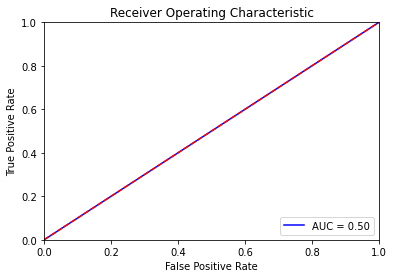

{'max_depth': 1, 'min_samples_leaf': 33}
Mejor ROC-AUC en validación cruzada: 0.582
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 33}
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.47619047619047616 0.5121951219512195 0.55 0.5


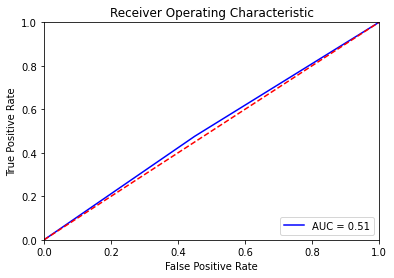

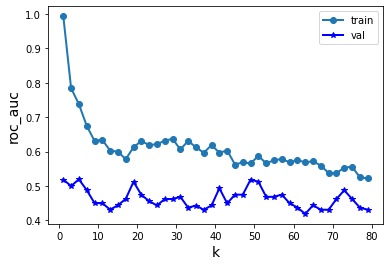

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.4878048780487805
[[13  7]
 [14  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3333333333333333 0.4878048780487805 0.65 0.4


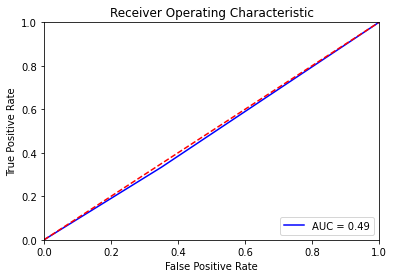

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5609756097560976 0.7 0.5


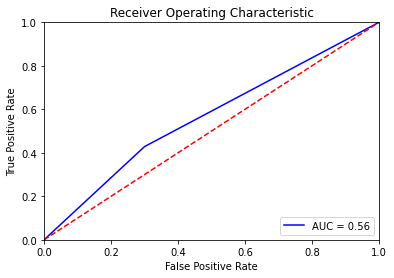

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.481
0.43902439024390244
[[ 7 13]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.43902439024390244 0.35 0.4888888888888889


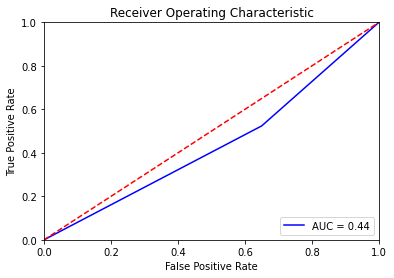

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [ ]:
X_train_1.isna().sum()

HighBGLevTakeAction        2
LowBGLevTakeAction         2
PtCurrA1cGoal              5
DealHypoEp_Agree           0
DealHypoEp_Disagree        0
DealHypoEp_Neutral         0
UndertreatHypo_Agree       0
UndertreatHypo_Disagree    0
UndertreatHypo_Neutral     0
HighBGDamage_Agree         0
HighBGDamage_Disagree      0
HighBGDamage_Neutral       0
FreqHypoDamage_Agree       0
FreqHypoDamage_Disagree    0
FreqHypoDamage_Neutral     0
DangersHighBG_Agree        0
DangersHighBG_Disagree     0
DangersHighBG_Neutral      0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_1, Y_train_1, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical1=X_train_1[:,:3]
X_train_categorical1=X_train_1[:,3:]
X_test_numerical1=X_test_1[:,:3]
X_test_categorical1=X_test_1[:,3:]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical1)
X_std_train_numerical = std_all.transform(X_train_numerical1) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical1)

In [ ]:
X_train_std_all1=np.c_[X_std_train_numerical,X_train_categorical1]
X_test_std_all1=np.c_[X_std_test_numerical,X_test_categorical1]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


In [ ]:
X_train_std_all1.shape

(160, 18)

A continuación, aplicacmos los modelos:

In [1]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4634146341463415
[[ 6 14]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.4634146341463415 0.3 0.5416666666666666


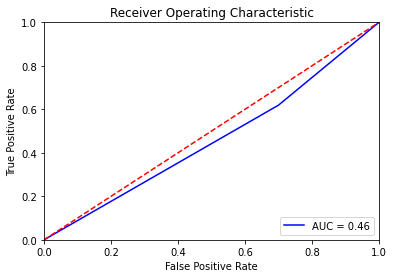

{'max_depth': 3, 'min_samples_leaf': 11}
Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 3, 'min_samples_leaf': 11}
0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.42857142857142855 0.5365853658536586 0.65 0.4864864864864864


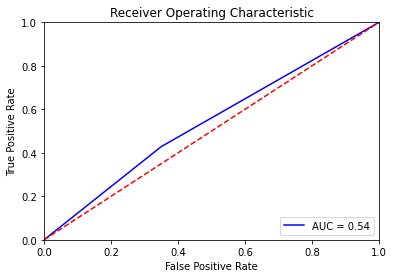

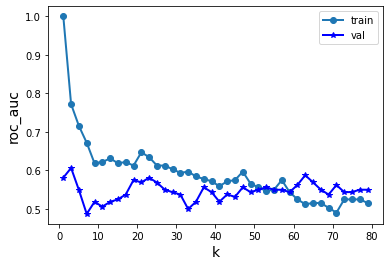

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.5121951219512195
[[12  8]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5121951219512195 0.6 0.4736842105263158


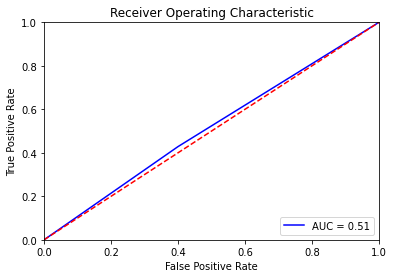

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6666666666666666 0.5121951219512195 0.35 0.5833333333333334


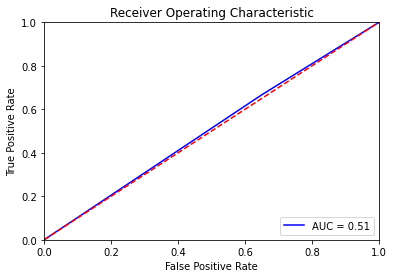

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.4878048780487805
[[ 7 13]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.4878048780487805 0.35 0.5531914893617021


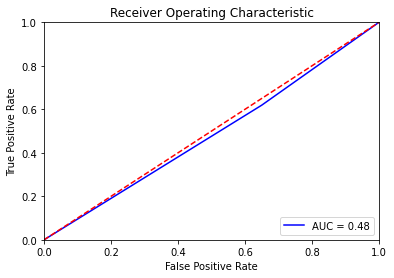

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
X_train_2.isna().sum()

HighBGLevTakeAction        1
LowBGLevTakeAction         1
PtCurrA1cGoal              5
DealHypoEp_Agree           0
DealHypoEp_Disagree        0
DealHypoEp_Neutral         0
UndertreatHypo_Agree       0
UndertreatHypo_Disagree    0
UndertreatHypo_Neutral     0
HighBGDamage_Agree         0
HighBGDamage_Disagree      0
HighBGDamage_Neutral       0
FreqHypoDamage_Agree       0
FreqHypoDamage_Disagree    0
FreqHypoDamage_Neutral     0
DangersHighBG_Agree        0
DangersHighBG_Disagree     0
DangersHighBG_Neutral      0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical2=X_train_2[:,:3]
X_train_categorical2=X_train_2[:,3:]
X_test_numerical2=X_test_2[:,:3]
X_test_categorical2=X_test_2[:,3:]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical2)
X_std_train_numerical = std_all.transform(X_train_numerical2) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical2)

In [ ]:
X_train_std_all2=np.c_[X_std_train_numerical,X_train_categorical2]
X_test_std_all2=np.c_[X_std_test_numerical,X_test_categorical2]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


A continuación, aplicacmos los modelos:

In [2]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.0 0.4878048780487805 1.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


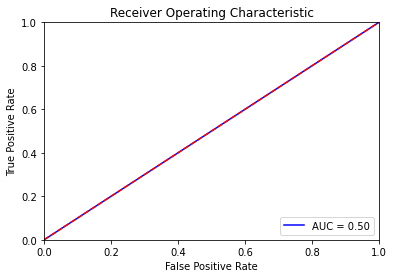

{'max_depth': 2, 'min_samples_leaf': 23}
Mejor ROC-AUC en validación cruzada: 0.619
Mejor valor del hiperparámetro: {'max_depth': 2, 'min_samples_leaf': 23}
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.47619047619047616 0.5121951219512195 0.55 0.5


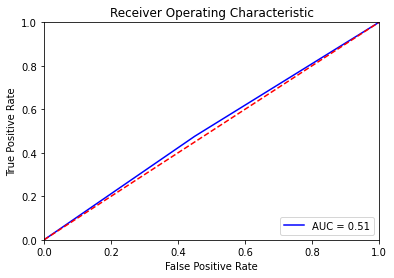

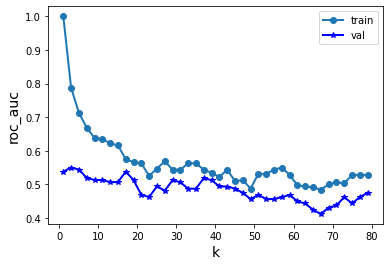

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.6097560975609756
[[14  6]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.6097560975609756 0.7 0.5789473684210527


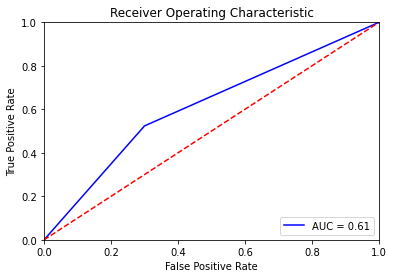

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.5365853658536586
[[15  5]
 [14  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3333333333333333 0.5365853658536586 0.75 0.4242424242424242


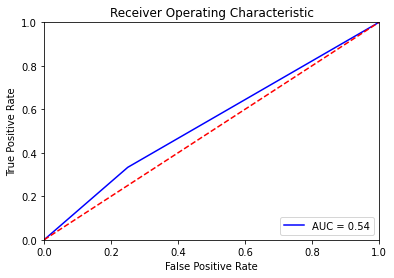

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.475
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.8095238095238095 0.6341463414634146 0.45 0.6938775510204083


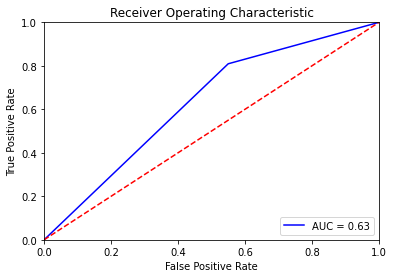

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
X_train_3.isna().sum()

HighBGLevTakeAction        1
LowBGLevTakeAction         1
PtCurrA1cGoal              3
DealHypoEp_Agree           0
DealHypoEp_Disagree        0
DealHypoEp_Neutral         0
UndertreatHypo_Agree       0
UndertreatHypo_Disagree    0
UndertreatHypo_Neutral     0
HighBGDamage_Agree         0
HighBGDamage_Disagree      0
HighBGDamage_Neutral       0
FreqHypoDamage_Agree       0
FreqHypoDamage_Disagree    0
FreqHypoDamage_Neutral     0
DangersHighBG_Agree        0
DangersHighBG_Disagree     0
DangersHighBG_Neutral      0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_3, Y_train_3, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical3=X_train_3[:,:3]
X_train_categorical3=X_train_3[:,3:]
X_test_numerical3=X_test_3[:,:3]
X_test_categorical3=X_test_3[:,3:]

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical3)
X_std_train_numerical = std_all.transform(X_train_numerical3) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical3)

In [ ]:
X_train_std_all3=np.c_[X_std_train_numerical,X_train_categorical3]
X_test_std_all3=np.c_[X_std_test_numerical,X_test_categorical3]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


A continuación, aplicacmos los modelos:

In [3]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.5853658536585366
[[ 8 12]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.5853658536585366 0.4 0.6530612244897959


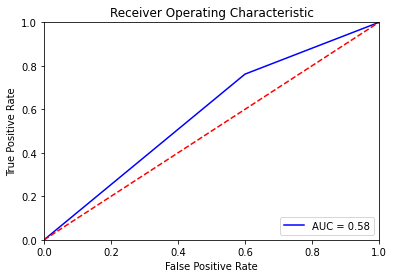

{'max_depth': 1, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 5}
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.7619047619047619 0.5121951219512195 0.25 0.6153846153846153


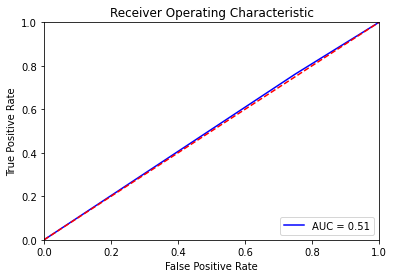

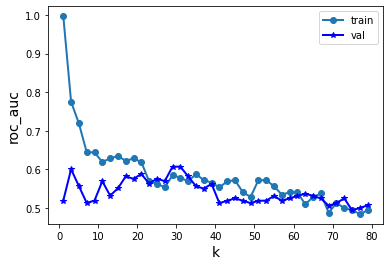

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.607
Valor correspondiente para el hiperparámetro: {'n_neighbors': 29}
0.4634146341463415
[[ 7 13]
 [ 9 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5714285714285714 0.4634146341463415 0.35 0.5217391304347826


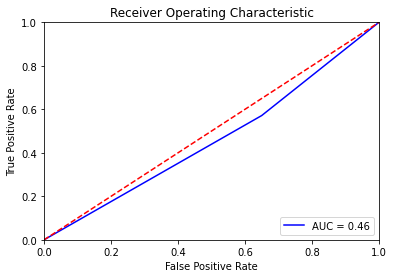

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.5121951219512195 0.25 0.6153846153846153


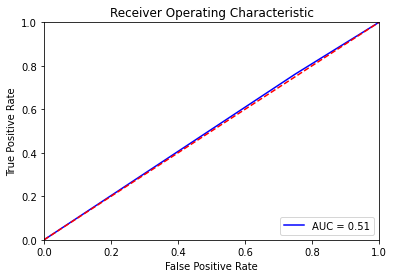

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.5121951219512195 0.25 0.6153846153846153


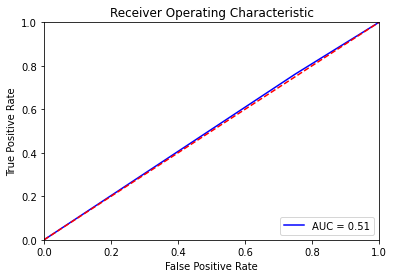

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
X_train_4.isna().sum()

HighBGLevTakeAction        2
LowBGLevTakeAction         2
PtCurrA1cGoal              5
DealHypoEp_Agree           0
DealHypoEp_Disagree        0
DealHypoEp_Neutral         0
UndertreatHypo_Agree       0
UndertreatHypo_Disagree    0
UndertreatHypo_Neutral     0
HighBGDamage_Agree         0
HighBGDamage_Disagree      0
HighBGDamage_Neutral       0
FreqHypoDamage_Agree       0
FreqHypoDamage_Disagree    0
FreqHypoDamage_Neutral     0
DangersHighBG_Agree        0
DangersHighBG_Disagree     0
DangersHighBG_Neutral      0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_4, Y_train_4, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical4=X_train_4[:,:3]
X_train_categorical4=X_train_4[:,3:]
X_test_numerical4=X_test_4[:,:3]
X_test_categorical4=X_test_4[:,3:]

In [ ]:
#CON STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical4)
X_std_train_numerical = std_all.transform(X_train_numerical4) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical4)

In [ ]:
X_train_std_all4=np.c_[X_std_train_numerical,X_train_categorical4]
X_test_std_all4=np.c_[X_std_test_numerical,X_test_categorical4]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


A continuación, aplicacmos los modelos:

In [4]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.0 0.4878048780487805 1.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


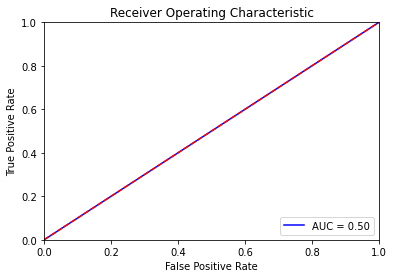

{'max_depth': 1, 'min_samples_leaf': 37}
Mejor ROC-AUC en validación cruzada: 0.563
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 37}
0.5609756097560976
[[13  7]
 [11 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.47619047619047616 0.5609756097560976 0.65 0.5263157894736842


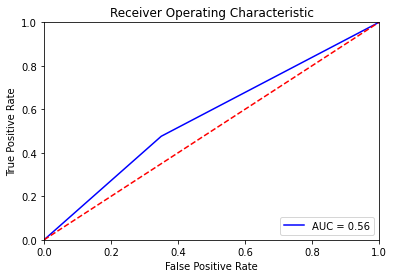

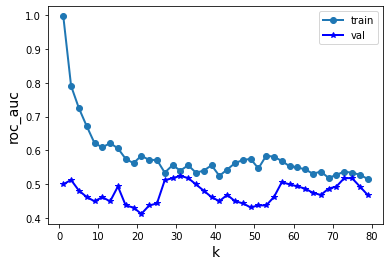

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
Valor correspondiente para el hiperparámetro: {'n_neighbors': 31}
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.5121951219512195 0.55 0.5


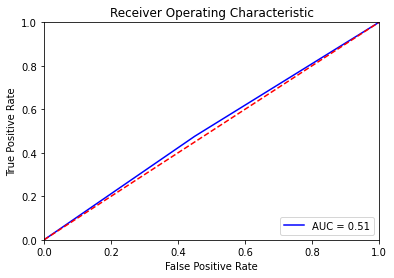

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.494
0.6097560975609756
[[13  7]
 [ 9 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5714285714285714 0.6097560975609756 0.65 0.6


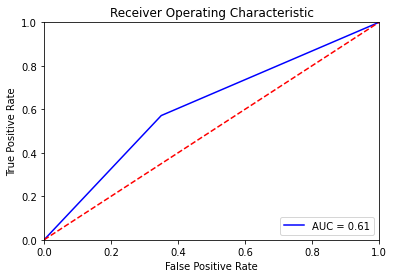

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.469
0.5853658536585366
[[13  7]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.5853658536585366 0.65 0.5641025641025642


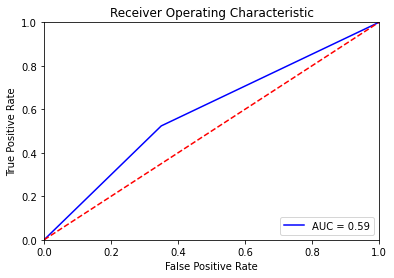

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [45]:

# model_std=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
# mean_std=[np.mean(accuracy_reg_std), np.mean(accuracy_arbol_std),np.mean(accuracy_knn_std),np.mean(accuracy_svc_std),np.mean(accuracy_svc_lin_std)]
# std_std=[np.std(accuracy_reg_std), np.std(accuracy_arbol_std),np.std(accuracy_knn_std),np.std(accuracy_svc_std),np.std(accuracy_svc_lin_std)]

# df_acc_std= pd.DataFrame()
# df_acc_std['model'] = None
# df_acc_std['mean'] = None
# df_acc_std['std'] = None


# df_acc_std['model'] = model_std
# df_acc_std['mean'] = mean_std
# df_acc_std['std'] = std_std


In [ ]:
# model2_std=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
# mean2_std=[np.mean(roc_reg_std), np.mean(roc_arbol_std),np.mean(roc_knn_std),np.mean(roc_svc_std),np.mean(roc_svc_lin_std)]
# std2_std=[np.std(roc_reg_std), np.std(roc_arbol_std),np.std(roc_knn_std),np.std(roc_svc_std),np.std(roc_svc_lin_std)]

# df_roc_std= pd.DataFrame()
# df_roc_std['model'] = None
# df_roc_std['mean'] = None
# df_roc_std['std'] = None


# df_roc_std['model'] = model2_std
# df_roc_std['mean'] = mean2_std
# df_roc_std['std'] = std2_std


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [46]:
# #PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

# plot_mean_std_metric(df_acc_std, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

# plot_mean_std_metric(df_roc_std, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)


In [ ]:
#PARA MIN MAX

In [ ]:

model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.502439  0.042526
1          DT  0.526829  0.019512
2         KNN  0.517073  0.049747
3  Radial SVM  0.546341  0.036504
4  Linear SVM  0.531707  0.069672

In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

model      mean       std
0       LASSO  0.508095  0.039658
1          DT  0.526905  0.021370
2         KNN  0.518333  0.050657
3  Radial SVM  0.546190  0.038893
4  Linear SVM  0.528810  0.069995

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("Att_acc"))
plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

model      mean       std
0       LASSO  0.276190  0.341266
1          DT  0.523810  0.120468
2         KNN  0.466667  0.081927
3  Radial SVM  0.552381  0.155329
4  Linear SVM  0.647619  0.118952

In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


model  mean       std
0       LASSO  0.74  0.320000
1          DT  0.53  0.146969
2         KNN  0.57  0.120830
3  Radial SVM  0.54  0.200998
4  Linear SVM  0.41  0.135647

# ***VALIDACIÓN CRUZADA Y FEATURE SELECTION***

# ***PRIMERA PARTICIÓN***

In [77]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [78]:
X_train_0

HighBGLevTakeAction  LowBGLevTakeAction  PtCurrA1cGoal  DealHypoEp_Agree  \
26                 200.0                85.0           70.0                 0   
1                  230.0                70.0          120.0                 0   
162                221.0                69.0           65.0                 1   
25                 200.0                70.0           65.0                 0   
94                 125.0                69.0           74.0                 0   
..                   ...                 ...            ...               ...   
53                 250.0                90.0           70.0                 0   
115                220.0                70.0           65.0                 0   
178                200.0                60.0           65.0                 1   
99                 250.0               100.0           60.0                 0   
119                150.0                70.0           70.0                 1   

     DealHypoEp_Disagree  DealHypoEp_Neutral  UndertreatHypo_Agree  \
26                     1                   0                     0   
1                      0                   1                     1   
162                    0                   0                     1   
25                     1                   0                     0   
94                     0                   1                     0   
..                   ...                 ...                   ...   
53                     1                   0                     0   
115                    1                   0                     0   
178                    0                   0                     0   
99                     1                   0                     1   
119                    0                   0                     1   

     UndertreatHypo_Disagree  UndertreatHypo_Neutral  HighBGDamage_Agree  \
26                         0                       1                   0   
1                          0                       0                   1   
162                        0                       0                   0   
25                         1                       0                   0   
94                         1                       0                   1   
..                       ...                     ...                 ...   
53                         1                       0                   0   
115                        0                       1                   1   
178                        0                       1                   1   
99                         0                       0                   0   
119                        0                       0                   0   

     HighBGDamage_Disagree  HighBGDamage_Neutral  FreqHypoDamage_Agree  \
26                       1                     0                     0   
1                        0                     0                     1   
162                      0                     1                     0   
25                       0                     1                     1   
94                       0                     0                     1   
..                     ...                   ...                   ...   
53                       1                     0                     0   
115                      0                     0                     0   
178                      0                     0                     1   
99                       0                     1                     0   
119                      1                     0                     1   

     FreqHypoDamage_Disagree  FreqHypoDamage_Neutral  DangersHighBG_Agree  \
26                         1                       0                    0   
1                          0                       0                    0   
162                        0                       1                    1   
25                         0                       0                    0   
94  

Debemos imputar los valores nulos con knn_imputer:

In [79]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [80]:
X_train_numerical0=X_train_0[:,:4]
X_train_categorical0=X_train_0[:,4:]
X_test_numerical0=X_test_0[:,:4]
X_test_categorical0=X_test_0[:,4:]

In [81]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [82]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [83]:
X_train_scaler_all0.shape

(160, 18)

A continuación, hacemos selección de características:

In [84]:
X.columns

Index(['HighBGLevTakeAction', 'LowBGLevTakeAction', 'PtCurrA1cGoal',
       'DealHypoEp_Agree', 'DealHypoEp_Disagree', 'DealHypoEp_Neutral',
       'UndertreatHypo_Agree', 'UndertreatHypo_Disagree',
       'UndertreatHypo_Neutral', 'HighBGDamage_Agree', 'HighBGDamage_Disagree',
       'HighBGDamage_Neutral', 'FreqHypoDamage_Agree',
       'FreqHypoDamage_Disagree', 'FreqHypoDamage_Neutral',
       'DangersHighBG_Agree', 'DangersHighBG_Disagree',
       'DangersHighBG_Neutral'],
      dtype='object')

# ***Métodos *embedded****

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all0, Y_train_0)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# print(indices)
# print(importances[indices])
# print(importances[X.columns])
# # Muestra el ranking en el ordenamiento
# print("Ranking de Características:")

# for f in range(X_train_scaler_all0.shape[1]):
#   print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
# plt.title("Importancia de las características")
plt.bar(X.columns, importances,
        color="r", yerr=std[indices], align="center")
plt.xticks(rotation='vertical')
plt.xlim([-1, X_train_scaler_all0.shape[1]])
plt.rcParams["figure.figsize"] = (5, 5)
plt.tight_layout()
plt.savefig("{}.pdf".format("ExtraTreesAttitudeScale"))
plt.close()
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from functools import partial

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=0), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all0, Y_train_0)



In [ ]:
lista_chi=[ [] for i in range(X.shape[1])]


In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

In [ ]:
lista_chi

[[0.08797230169652948],
 [0.017641974854254228],
 [0.015038187199915232],
 [0.0447656764504305],
 [0.0],
 [0.04255877680230613],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.03133167121955038],
 [0.057401151543577944],
 [0.021685622179151487],
 [0.0],
 [0.02862208849061787],
 [0.0]]

# ***Boostrap***

In [ ]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv('df_var_importance_boostrap_{}.csv'.format(generic_name))


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [ ]:
from pathlib import Path

BOOSTRAP SOLO LO HACEMOS UNA VEZ PORQUE SE LE METE TODO EL DATASET

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all0, Y_train_0)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all0.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
# plt.title("Importancia de las características")
plt.bar(X.columns, importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(rotation='vertical')
plt.xlim([-1, X_train_scaler_all0.shape[1]])
plt.rcParams["figure.figsize"] = (5, 5)
plt.tight_layout()
plt.savefig("{}.pdf".format("RandomForestAttitudeScale"))
plt.close()
plt.show()


('HighBGLevTakeAction', 0.2183442761238733)
('LowBGLevTakeAction', 0.14414350912924007)
('PtCurrA1cGoal', 0.198935014002583)
('DealHypoEp_Agree', 0.03574815005555277)
('DealHypoEp_Disagree', 0.025844602013511273)
('DealHypoEp_Neutral', 0.028710824329158474)
('UndertreatHypo_Agree', 0.02557179926188636)
('UndertreatHypo_Disagree', 0.03256416385381979)
('UndertreatHypo_Neutral', 0.030787126289364853)
('HighBGDamage_Agree', 0.026952277122581147)
('HighBGDamage_Disagree', 0.02939380900797619)
('HighBGDamage_Neutral', 0.03097002111978572)
('FreqHypoDamage_Agree', 0.03106862797315003)
('FreqHypoDamage_Disagree', 0.020341743701222777)
('FreqHypoDamage_Neutral', 0.02167384632657228)
('DangersHighBG_Agree', 0.03354924376464434)
('DangersHighBG_Disagree', 0.03202714041232083)
('DangersHighBG_Neutral', 0.03337382551275684)
Ranking de Características:
1. Característica 0 (0.218344)
2. Característica 2 (0.198935)
3. Característica 1 (0.144144)
4. Característica 3 (0.035748)
5. Característica 15 (0.

In [ ]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

HighBGLevTakeAction
PtCurrA1cGoal


# ***Segunda partición***

In [85]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]


In [86]:
X_train_1.isna().sum()

HighBGLevTakeAction        2
LowBGLevTakeAction         2
PtCurrA1cGoal              5
DealHypoEp_Agree           0
DealHypoEp_Disagree        0
DealHypoEp_Neutral         0
UndertreatHypo_Agree       0
UndertreatHypo_Disagree    0
UndertreatHypo_Neutral     0
HighBGDamage_Agree         0
HighBGDamage_Disagree      0
HighBGDamage_Neutral       0
FreqHypoDamage_Agree       0
FreqHypoDamage_Disagree    0
FreqHypoDamage_Neutral     0
DangersHighBG_Agree        0
DangersHighBG_Disagree     0
DangersHighBG_Neutral      0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [87]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [88]:
X_train_numerical1=X_train_1[:,:4]
X_train_categorical1=X_train_1[:,4:]
X_test_numerical1=X_test_1[:,:4]
X_test_categorical1=X_test_1[:,4:]

In [89]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [90]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 0 (0.190832)
2. Característica 2 (0.178935)
3. Característica 1 (0.150981)
4. Característica 11 (0.045658)
5. Característica 12 (0.038563)
6. Característica 8 (0.038189)
7. Característica 9 (0.037625)
8. Característica 10 (0.037311)
9. Característica 5 (0.036478)
10. Característica 3 (0.033221)
11. Característica 16 (0.032913)
12. Característica 4 (0.030696)
13. Característica 17 (0.030327)
14. Característica 7 (0.028200)
15. Característica 15 (0.027545)
16. Característica 14 (0.024618)
17. Característica 6 (0.021189)
18. Característica 13 (0.016722)


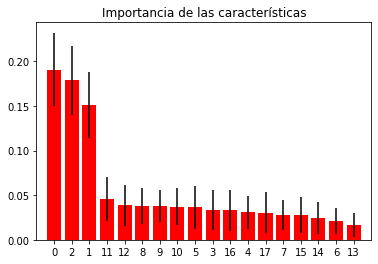

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all1, Y_train_1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all1.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all1.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all1.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=1), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all1, Y_train_1)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)
# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

In [ ]:
lista_chi

[[0.08797230169652948, 0.04741305191852985],
 [0.017641974854254228, 0.034085557313461745],
 [0.015038187199915232, 0.0],
 [0.0447656764504305, 0.0],
 [0.0, 0.0],
 [0.04255877680230613, 0.004620100894880519],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0037645848831140416],
 [0.0, 0.02560193156421109],
 [0.0, 0.0],
 [0.03133167121955038, 0.013253845622374971],
 [0.057401151543577944, 0.07863247740725687],
 [0.021685622179151487, 0.03720020920568734],
 [0.0, 0.0],
 [0.02862208849061787, 0.035294790788320096],
 [0.0, 0.0]]

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('BBGAttitudeScaleCompEnroll', 0.1147946140288978)
('HighBGLevTakeAction', 0.16717105479078917)
('LowBGLevTakeAction', 0.14787334245105527)
('PtCurrA1cGoal', 0.15206285890130256)
('DealHypoEp_Agree', 0.028969995296863928)
('DealHypoEp_Disagree', 0.024459326003440255)
('DealHypoEp_Neutral', 0.033464214814291605)
('UndertreatHypo_Agree', 0.01962000119858618)
('UndertreatHypo_Disagree', 0.02565919346884076)
('UndertreatHypo_Neutral', 0.025487925690021136)
('HighBGDamage_Agree', 0.028141221803884994)
('HighBGDamage_Disagree', 0.030806456822979774)
('HighBGDamage_Neutral', 0.02878744137121529)
('FreqHypoDamage_Agree', 0.04049055036270649)
('FreqHypoDamage_Disagree', 0.019839909606638655)
('FreqHypoDamage_Neutral', 0.026651641435239362)
('DangersHighBG_Agree', 0.02535179273129811)
('DangersHighBG_Disagree', 0.03176119836016685)
('DangersHighBG_Neutral', 0.028607260861781975)
Ranking de Características:
1. Característica 1 (0.167171)
2. Característica 3 (0.152063)
3. Característica 2 (0.14787

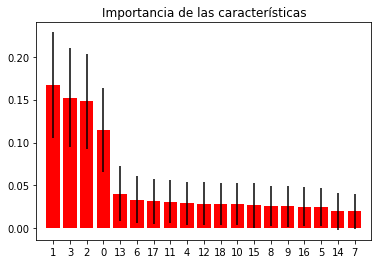

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all1, Y_train_1)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all1.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all1.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all1.shape[1]])
plt.show()


In [ ]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

HighBGLevTakeAction
PtCurrA1cGoal


# ***Tercera partición***

In [91]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [92]:
X_train_2.isna().sum()

HighBGLevTakeAction        1
LowBGLevTakeAction         1
PtCurrA1cGoal              5
DealHypoEp_Agree           0
DealHypoEp_Disagree        0
DealHypoEp_Neutral         0
UndertreatHypo_Agree       0
UndertreatHypo_Disagree    0
UndertreatHypo_Neutral     0
HighBGDamage_Agree         0
HighBGDamage_Disagree      0
HighBGDamage_Neutral       0
FreqHypoDamage_Agree       0
FreqHypoDamage_Disagree    0
FreqHypoDamage_Neutral     0
DangersHighBG_Agree        0
DangersHighBG_Disagree     0
DangersHighBG_Neutral      0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [93]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [94]:
X_train_numerical2=X_train_2[:,:4]
X_train_categorical2=X_train_2[:,4:]
X_test_numerical2=X_test_2[:,:4]
X_test_categorical2=X_test_2[:,4:]

In [95]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [96]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 3 (0.145478)
2. Característica 1 (0.139252)
3. Característica 2 (0.134855)
4. Característica 0 (0.112235)
5. Característica 12 (0.044280)
6. Característica 4 (0.042110)
7. Característica 6 (0.036989)
8. Característica 10 (0.036563)
9. Característica 5 (0.034934)
10. Característica 11 (0.034249)
11. Característica 8 (0.033932)
12. Característica 9 (0.032616)
13. Característica 18 (0.030088)
14. Característica 17 (0.028281)
15. Característica 16 (0.027170)
16. Característica 13 (0.024460)
17. Característica 7 (0.023950)
18. Característica 15 (0.021478)
19. Característica 14 (0.017077)


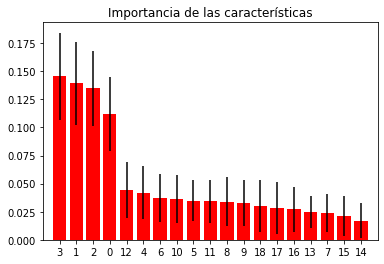

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all2, Y_train_2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all2.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all2.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all2.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=2), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all2, Y_train_2)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('BBGAttitudeScaleCompEnroll', 0.11566555300215223)
('HighBGLevTakeAction', 0.16936458357920545)
('LowBGLevTakeAction', 0.1373446063535284)
('PtCurrA1cGoal', 0.16264309632658977)
('DealHypoEp_Agree', 0.02904627514169737)
('DealHypoEp_Disagree', 0.026661606369767922)
('DealHypoEp_Neutral', 0.02684525215618186)
('UndertreatHypo_Agree', 0.023023633011459047)
('UndertreatHypo_Disagree', 0.029597333777909608)
('UndertreatHypo_Neutral', 0.026983181219883207)
('HighBGDamage_Agree', 0.028300527144257907)
('HighBGDamage_Disagree', 0.030262532123287094)
('HighBGDamage_Neutral', 0.03243191082093043)
('FreqHypoDamage_Agree', 0.031441984025021893)
('FreqHypoDamage_Disagree', 0.0183513259857306)
('FreqHypoDamage_Neutral', 0.027080389061422218)
('DangersHighBG_Agree', 0.02826927859904269)
('DangersHighBG_Disagree', 0.027879712775269374)
('DangersHighBG_Neutral', 0.028807218526663007)
Ranking de Características:
1. Característica 1 (0.169365)
2. Característica 3 (0.162643)
3. Característica 2 (0.13734

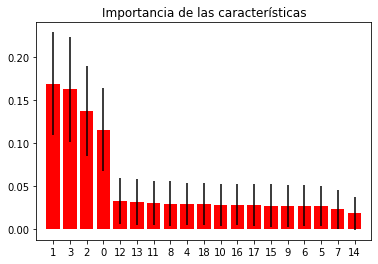

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all2, Y_train_2)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all2.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all2.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all2.shape[1]])
plt.show()


# ***Cuarta partición***

In [97]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [98]:
X_train_3.isna().sum()

HighBGLevTakeAction        1
LowBGLevTakeAction         1
PtCurrA1cGoal              3
DealHypoEp_Agree           0
DealHypoEp_Disagree        0
DealHypoEp_Neutral         0
UndertreatHypo_Agree       0
UndertreatHypo_Disagree    0
UndertreatHypo_Neutral     0
HighBGDamage_Agree         0
HighBGDamage_Disagree      0
HighBGDamage_Neutral       0
FreqHypoDamage_Agree       0
FreqHypoDamage_Disagree    0
FreqHypoDamage_Neutral     0
DangersHighBG_Agree        0
DangersHighBG_Disagree     0
DangersHighBG_Neutral      0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [99]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [100]:
X_train_numerical3=X_train_3[:,:4]
X_train_categorical3=X_train_3[:,4:]
X_test_numerical3=X_test_3[:,:4]
X_test_categorical3=X_test_3[:,4:]

In [101]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [102]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 3 (0.136430)
2. Característica 0 (0.134550)
3. Característica 1 (0.126764)
4. Característica 2 (0.126195)
5. Característica 12 (0.043277)
6. Característica 8 (0.041628)
7. Característica 11 (0.039907)
8. Característica 18 (0.039711)
9. Característica 17 (0.033144)
10. Característica 13 (0.032240)
11. Característica 9 (0.031943)
12. Característica 10 (0.031730)
13. Característica 4 (0.031365)
14. Característica 16 (0.029599)
15. Característica 6 (0.029583)
16. Característica 5 (0.027418)
17. Característica 7 (0.023695)
18. Característica 15 (0.022479)
19. Característica 14 (0.018343)


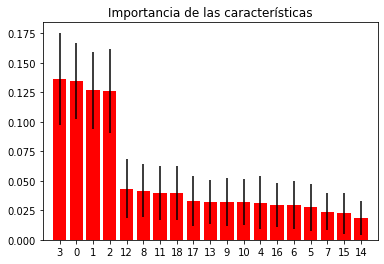

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all3, Y_train_3)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all3.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all3.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all3.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all3.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=3), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all3, Y_train_3)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('BBGAttitudeScaleCompEnroll', 0.12442845112457626)
('HighBGLevTakeAction', 0.1544024755631876)
('LowBGLevTakeAction', 0.13723994532173098)
('PtCurrA1cGoal', 0.16549803309967476)
('DealHypoEp_Agree', 0.030916685087355063)
('DealHypoEp_Disagree', 0.024872743293472967)
('DealHypoEp_Neutral', 0.027040581678729463)
('UndertreatHypo_Agree', 0.02187057427008126)
('UndertreatHypo_Disagree', 0.03269843671841643)
('UndertreatHypo_Neutral', 0.02655973228787104)
('HighBGDamage_Agree', 0.028116345142834648)
('HighBGDamage_Disagree', 0.02979257722713853)
('HighBGDamage_Neutral', 0.03141955784913964)
('FreqHypoDamage_Agree', 0.03770717370864345)
('FreqHypoDamage_Disagree', 0.02105501565946021)
('FreqHypoDamage_Neutral', 0.025796634941282263)
('DangersHighBG_Agree', 0.025306072568397443)
('DangersHighBG_Disagree', 0.027741355080325485)
('DangersHighBG_Neutral', 0.02753760937768247)
Ranking de Características:
1. Característica 3 (0.165498)
2. Característica 1 (0.154402)
3. Característica 2 (0.137240)

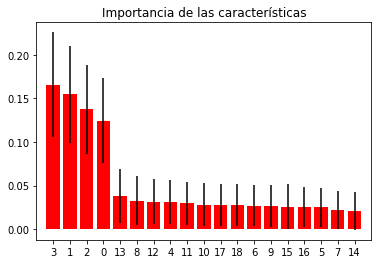

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all3, Y_train_3)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all3.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all3.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all3.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all3.shape[1]])
plt.show()


# ***Quinta partición***

In [103]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

Debemos imputar los valores nulos con knn_imputer:

In [104]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [105]:
X_train_numerical4=X_train_4[:,:4]
X_train_categorical4=X_train_4[:,4:]
X_test_numerical4=X_test_4[:,:4]
X_test_categorical4=X_test_4[:,4:]

In [106]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [107]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 0 (0.216947)
2. Característica 2 (0.168709)
3. Característica 1 (0.164337)
4. Característica 17 (0.044549)
5. Característica 11 (0.041461)
6. Característica 10 (0.038915)
7. Característica 7 (0.035136)
8. Característica 15 (0.033227)
9. Característica 16 (0.033044)
10. Característica 9 (0.032191)
11. Característica 8 (0.031673)
12. Característica 6 (0.030646)
13. Característica 3 (0.024290)
14. Característica 4 (0.023019)
15. Característica 5 (0.022924)
16. Característica 12 (0.022825)
17. Característica 13 (0.020609)
18. Característica 14 (0.015496)


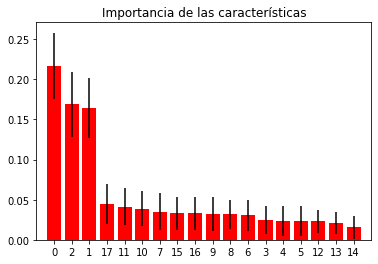

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all4, Y_train_4)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all4.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all4.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all4.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all4.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=4), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all4, Y_train_4)


In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

In [ ]:
for i in range(len(lista_chi)):
  lista_chi[i]=np.mean(lista_chi[i])

In [ ]:
lista_chi

[0.03350156907985573,
 0.014868084304826912,
 0.024021320937284152,
 0.01160669676110353,
 0.016805315211366655,
 0.038370807031255616,
 0.014768730778642514,
 0.001359386895592829,
 0.005326634925340778,
 0.018103378524496082,
 0.010794389148050953,
 0.0005180684917744039,
 0.012100398994136573,
 0.04344497587692438,
 0.01867521242996979,
 0.008825760554422279,
 0.02038536390023151,
 0.016294285085446836]

Dibujo la media de las 5 particiones para información utua:

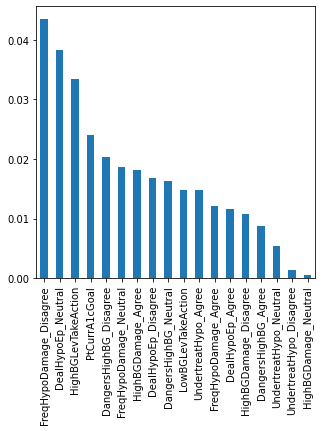

In [ ]:
fit_Chi2 = pd.Series(lista_chi, index=X.columns)
# fit_Chi2.sort_values(ascending=False)

fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))
# gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")
# indices = np.argsort(fit_Chi2)[::-1]

# plt.figure()
# # plt.title("Importancia de las características")
# plt.bar(X.columns, fit_Chi2.scores_),
#         color="r", align="center")
# plt.xticks(rotation='vertical')
# plt.xlim([-1, X_train_scaler_all0.shape[1]])
# plt.rcParams["figure.figsize"] = (5, 5)
# plt.tight_layout()
# plt.savefig("{}.pdf".format("IMutuaAttitudeScale"))
# plt.close()
# plt.show()

# ***RANDOM FOREST***

In [62]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [63]:
feat_labels=X.columns

('HighBGLevTakeAction', 0.21362144941157563)
('LowBGLevTakeAction', 0.16784139365007128)
('PtCurrA1cGoal', 0.17636129467744371)
('DealHypoEp_Agree', 0.03365025200082611)
('DealHypoEp_Disagree', 0.02801088568673424)
('DealHypoEp_Neutral', 0.026596317252749437)
('UndertreatHypo_Agree', 0.02507431626543077)
('UndertreatHypo_Disagree', 0.03213408266236864)
('UndertreatHypo_Neutral', 0.028862614424846292)
('HighBGDamage_Agree', 0.03137139023587677)
('HighBGDamage_Disagree', 0.033101172375180295)
('HighBGDamage_Neutral', 0.030493595325094575)
('FreqHypoDamage_Agree', 0.031894517368723084)
('FreqHypoDamage_Disagree', 0.022831833825856497)
('FreqHypoDamage_Neutral', 0.020731472920095664)
('DangersHighBG_Agree', 0.03148801744513909)
('DangersHighBG_Disagree', 0.03210402596545214)
('DangersHighBG_Neutral', 0.03383136850653592)
Ranking de Características:
1. Característica 0 (0.213621)
2. Característica 2 (0.176361)
3. Característica 1 (0.167841)
4. Característica 17 (0.033831)
5. Característica 

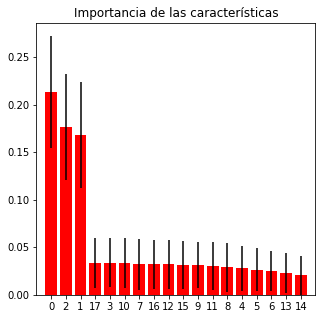

In [65]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all4, Y_train_4)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all4.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all4.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all4.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all4.shape[1]])
plt.show()


# ***RESULTADOS CON FEATURE SELECTION***

In [108]:
recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

recall_mlp_lin_scaler = []
accuracy_mlp_lin_scaler = []
precision_mlp_lin_scaler=[]
f1_mlp_lin_scaler=[]
roc_mlp_lin_scaler= []

In [109]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[0,1,2,5]]
X_test_ec = X_test_scaler_all0[:,[0,1,2,5]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.4634146341463415
[[11  9]
 [13  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.38095238095238093 0.4634146341463415 0.55 0.42105263157894735


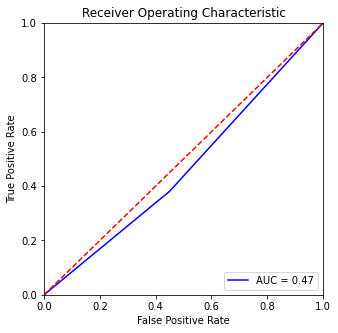

{'max_depth': 5, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.612
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 5}
0.5609756097560976
[[12  8]
 [10 11]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.5238095238095238 0.5609756097560976 0.6 0.5500000000000002


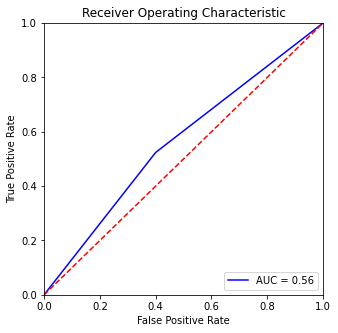

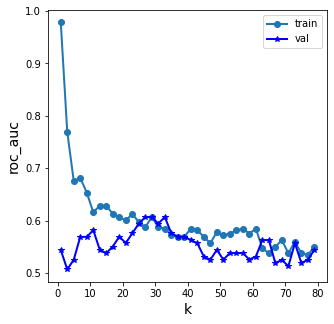

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.607
Valor correspondiente para el hiperparámetro: {'n_neighbors': 29}
0.4878048780487805
[[15  5]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.4878048780487805 0.75 0.3225806451612903


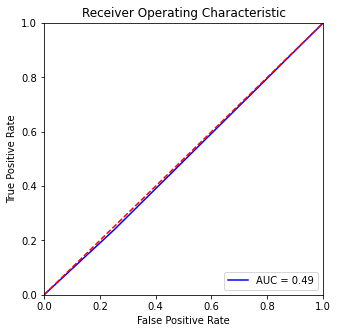

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.5121951219512195 0.25 0.6153846153846153


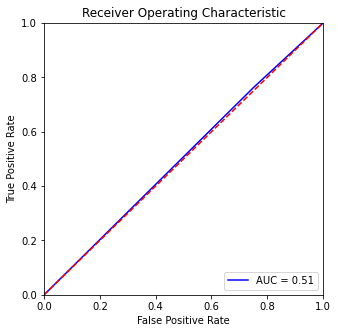

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.5121951219512195 0.25 0.6153846153846153


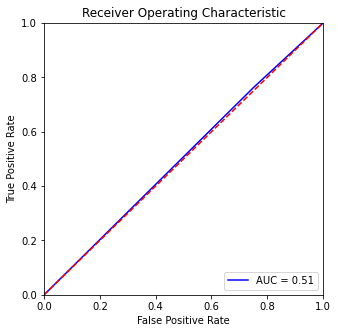

In [110]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [111]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[0,1,2,5]]
X_test_ec = X_test_scaler_all1[:,[0,1,2,5]]


Valor correspondiente para el hiperparámetro: {'C': 100, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6666666666666666 0.5121951219512195 0.35 0.5833333333333334


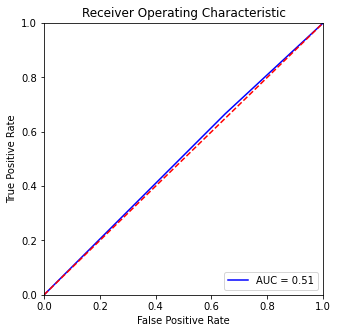

{'max_depth': 5, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.619
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 7}
0.43902439024390244
[[ 8 12]
 [11 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.47619047619047616 0.43902439024390244 0.4 0.46511627906976744


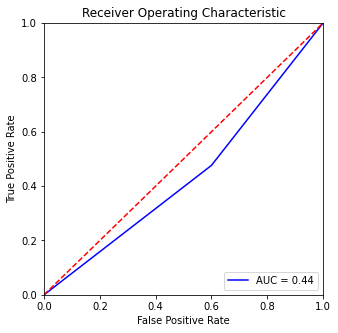

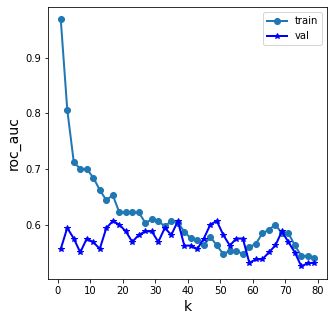

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
Valor correspondiente para el hiperparámetro: {'n_neighbors': 49}
0.43902439024390244
[[12  8]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.43902439024390244 0.6 0.34285714285714286


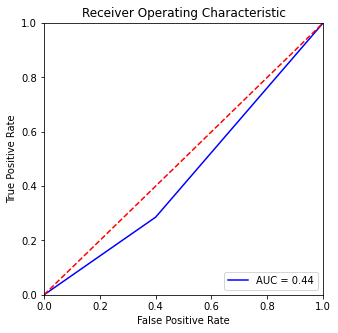

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4634146341463415
[[ 3 17]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.4634146341463415 0.15 0.5925925925925926


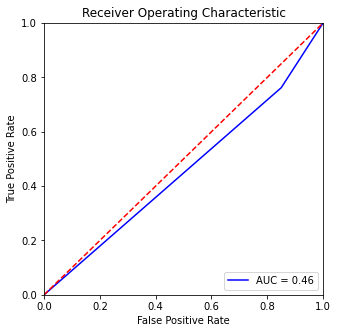

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4634146341463415
[[ 3 17]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.4634146341463415 0.15 0.5925925925925926


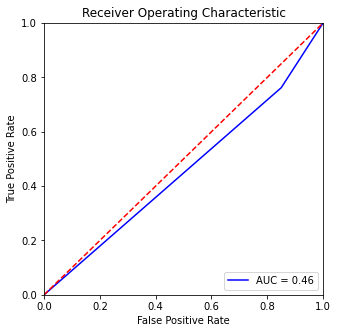

In [112]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


# mlp=MLP(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [113]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[0,1,2,5]]
X_test_ec = X_test_scaler_all2[:,[0,1,2,5]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.506
0.6097560975609756
[[ 6 14]
 [ 2 19]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.9047619047619048 0.6097560975609756 0.3 0.7037037037037038


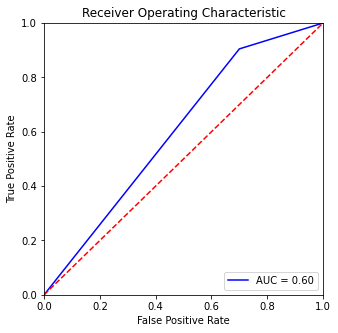

{'max_depth': 1, 'min_samples_leaf': 40}
Mejor ROC-AUC en validación cruzada: 0.606
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 40}
0.5609756097560976
[[10 10]
 [ 8 13]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6190476190476191 0.5609756097560976 0.5 0.5909090909090909


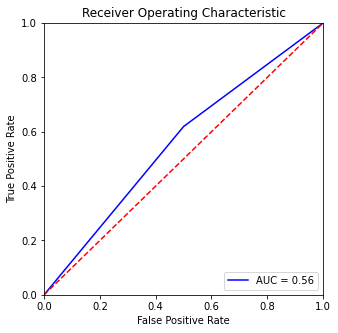

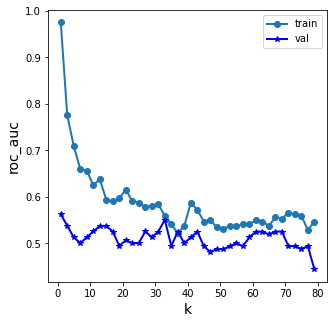

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5365853658536586 0.65 0.4864864864864864


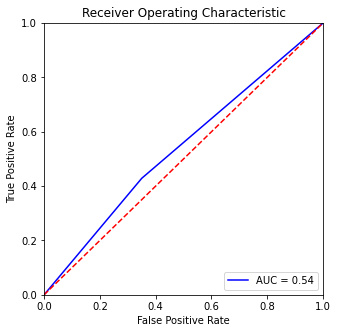

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.5121951219512195
[[15  5]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.5121951219512195 0.75 0.37499999999999994


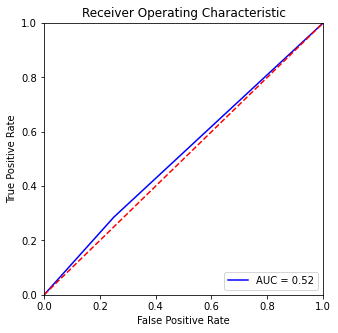

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.4878048780487805
[[15  5]
 [16  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.23809523809523808 0.4878048780487805 0.75 0.3225806451612903


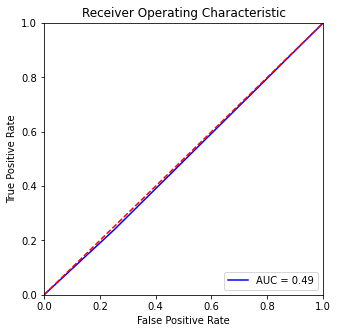

In [114]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])


In [115]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[0,1,2,5]]
X_test_ec = X_test_scaler_all3[:,[0,1,2,5]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.5365853658536586
[[12  8]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.5365853658536586 0.6 0.5128205128205129


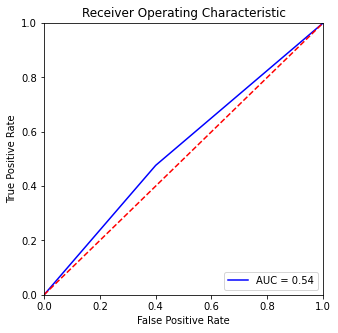

{'max_depth': 5, 'min_samples_leaf': 10}
Mejor ROC-AUC en validación cruzada: 0.582
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 10}
0.5853658536585366
[[10 10]
 [ 7 14]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6666666666666666 0.5853658536585366 0.5 0.6222222222222222


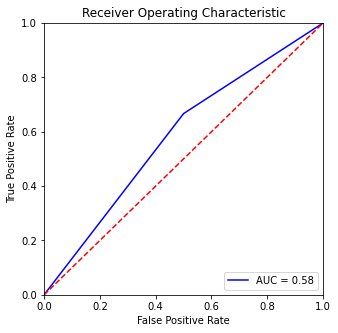

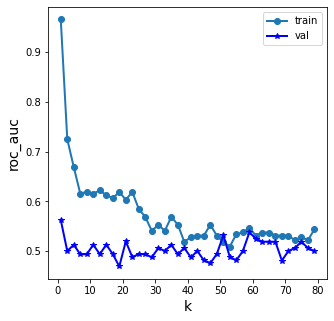

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.563
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.6097560975609756
[[12  8]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.6097560975609756 0.6 0.6190476190476191


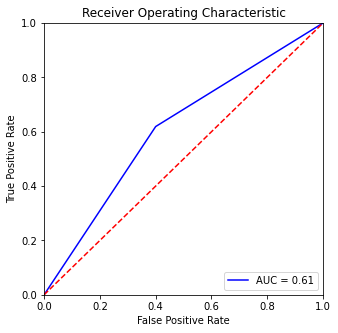

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5365853658536586
[[ 8 12]
 [ 7 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6666666666666666 0.5365853658536586 0.4 0.5957446808510638


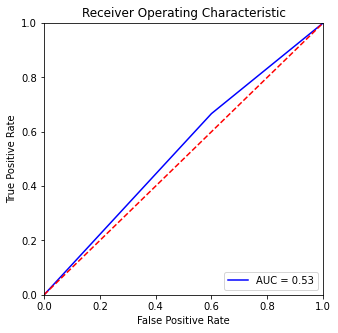

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5365853658536586
[[ 8 12]
 [ 7 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6666666666666666 0.5365853658536586 0.4 0.5957446808510638


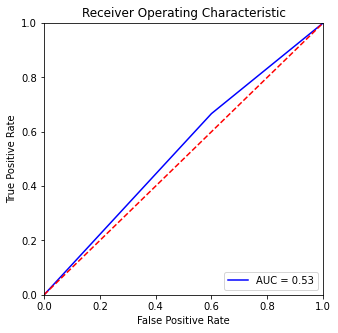

In [116]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])



In [117]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[0,1,2,5]]
X_test_ec = X_test_scaler_all4[:,[0,1,2,5]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5609756097560976 0.7 0.5


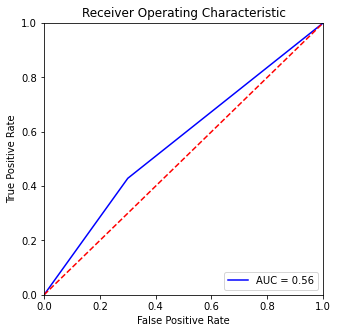

{'max_depth': 1, 'min_samples_leaf': 37}
Mejor ROC-AUC en validación cruzada: 0.563
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 37}
0.5609756097560976
[[13  7]
 [11 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.47619047619047616 0.5609756097560976 0.65 0.5263157894736842


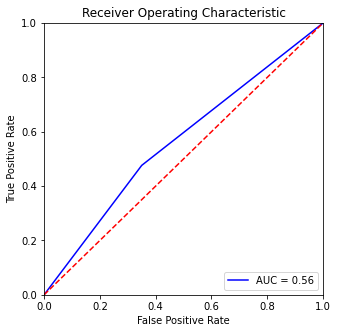

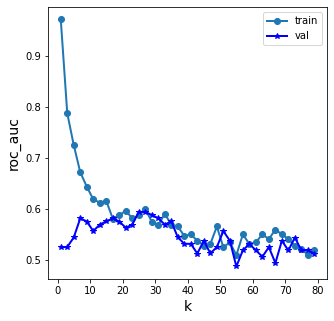

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}
0.5609756097560976
[[17  3]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.5609756097560976 0.85 0.4


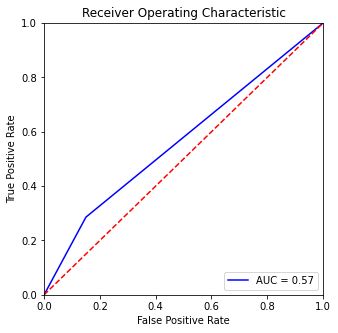

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5121951219512195
[[12  8]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5121951219512195 0.6 0.4736842105263158


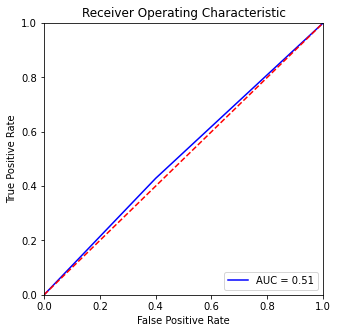

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.5609756097560976
[[ 9 11]
 [ 7 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6666666666666666 0.5609756097560976 0.45 0.6086956521739131


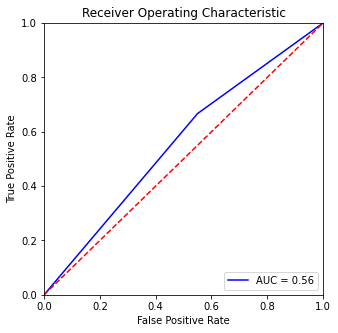

In [118]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT','KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler), np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.536585  0.048780
1          DT  0.541463  0.052083
2         KNN  0.526829  0.058942
3  Radial SVM  0.507317  0.023897
4  Linear SVM  0.512195  0.034493

In [ ]:
model2_scaler=['LASSO', 'DT','KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

model      mean       std
0       LASSO  0.535714  0.046796
1          DT  0.541190  0.052249
2         KNN  0.530714  0.057840
3  Radial SVM  0.505476  0.026305
4  Linear SVM  0.509524  0.034847

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
plt.savefig("{}.pdf".format("acc_FS_att"))
plt.close()
# plot_mean_std_metric(df_acc_scaler4, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.savefig("{}.pdf".format("auc_FS_att"))
# # plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

model      mean       std
0       LASSO  0.571429  0.192842
1          DT  0.552381  0.077372
2         KNN  0.371429  0.139321
3  Radial SVM  0.580952  0.191426
4  Linear SVM  0.619048  0.195180

In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


model  mean       std
0       LASSO  0.50  0.151658
1          DT  0.53  0.087178
2         KNN  0.69  0.096954
3  Radial SVM  0.43  0.220454
4  Linear SVM  0.40  0.204939

# ***A PARTIR DE AQUÍ: PRUEBAS VARIADAS***

# ***PARA BOOTSTRAP ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[0,5,6,7]]
X_test_ec = X_test_scaler_all0[:,[0,5,6,7]]


Valor correspondiente para el hiperparámetro: {'C': 40, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.4146341463414634
[[10 10]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.4146341463414634 0.4117647058823529 0.36842105263157887


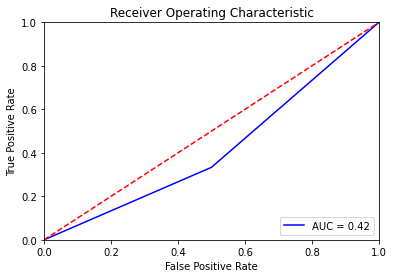

{'max_depth': 6, 'min_samples_leaf': 2}
Mejor ROC-AUC en validación cruzada: 0.619
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 2}
0.5121951219512195
[[10 10]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5121951219512195 0.5238095238095238 0.5238095238095238


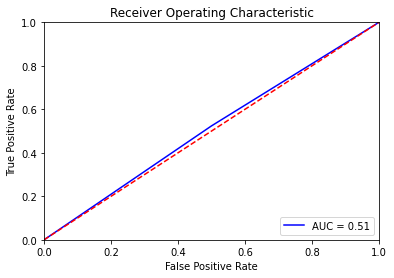

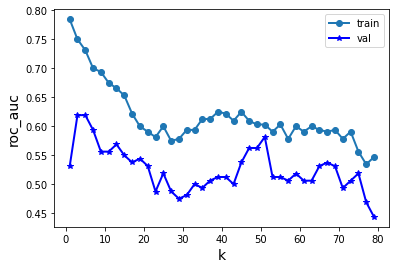

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.5609756097560976
[[ 6 14]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.5609756097560976 0.5483870967741935 0.6538461538461537


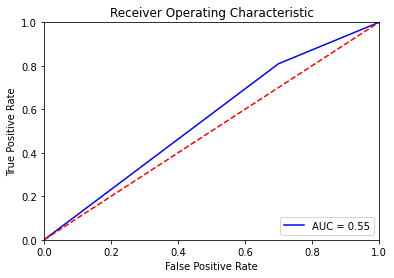

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.43902439024390244
[[ 9 11]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.43902439024390244 0.45 0.4390243902439024


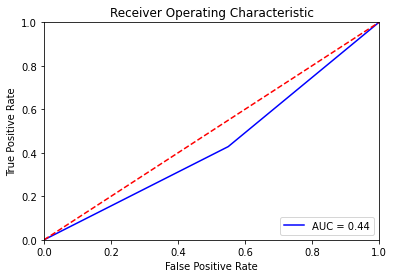

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.475
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


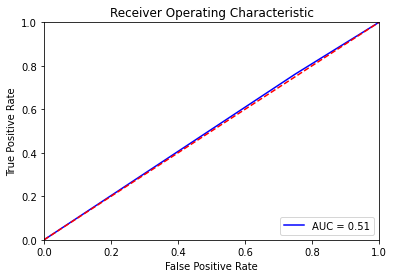

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[0,5,6,7]]
X_test_ec = X_test_scaler_all1[:,[0,5,6,7]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.4634146341463415
[[ 3 17]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.4634146341463415 0.48484848484848486 0.5925925925925926


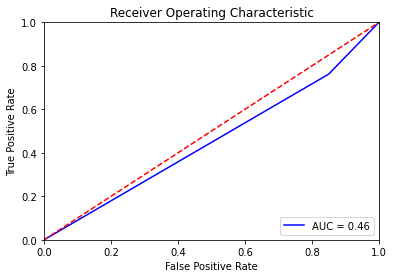

{'max_depth': 7, 'min_samples_leaf': 3}
Mejor ROC-AUC en validación cruzada: 0.601
Mejor valor del hiperparámetro: {'max_depth': 7, 'min_samples_leaf': 3}
0.5609756097560976
[[ 8 12]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.5609756097560976 0.5555555555555556 0.6250000000000001


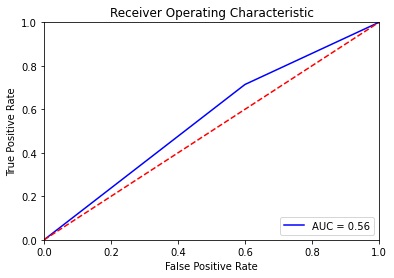

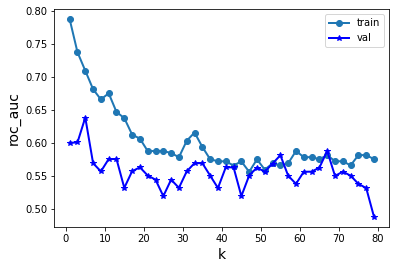

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.638
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.5365853658536586
[[ 8 12]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5365853658536586 0.5384615384615384 0.5957446808510638


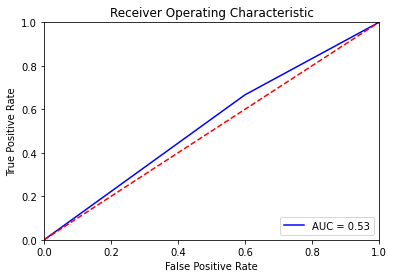

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4634146341463415
[[ 2 18]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.4634146341463415 0.4857142857142857 0.6071428571428571


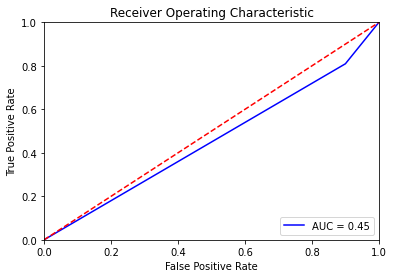

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.4634146341463415
[[ 3 17]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.4634146341463415 0.48484848484848486 0.5925925925925926


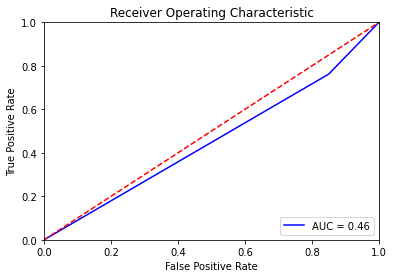

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[0,5,6,7]]
X_test_ec = X_test_scaler_all2[:,[0,5,6,7]]


Valor correspondiente para el hiperparámetro: {'C': 20, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.43902439024390244
[[ 9 11]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.43902439024390244 0.45 0.4390243902439024


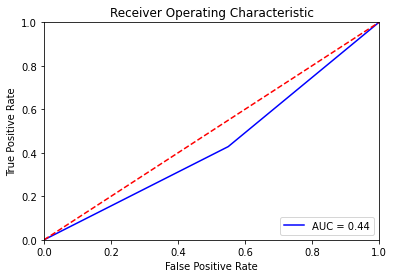

{'max_depth': 4, 'min_samples_leaf': 2}
Mejor ROC-AUC en validación cruzada: 0.675
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 2}
0.4878048780487805
[[ 8 12]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.4878048780487805 0.5 0.5333333333333333


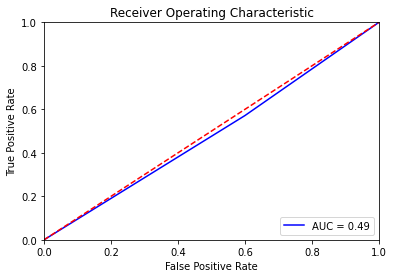

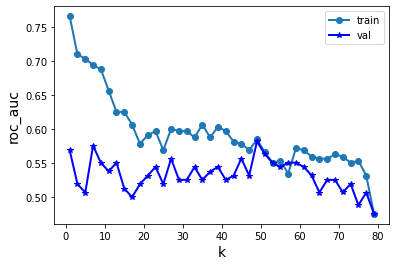

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.582
Valor correspondiente para el hiperparámetro: {'n_neighbors': 49}
0.4878048780487805
[[13  7]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.4878048780487805 0.5 0.4


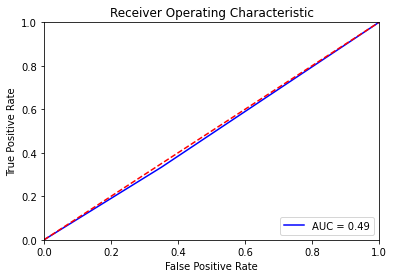

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.5365853658536586
[[ 9 11]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.5365853658536586 0.5416666666666666 0.5777777777777778


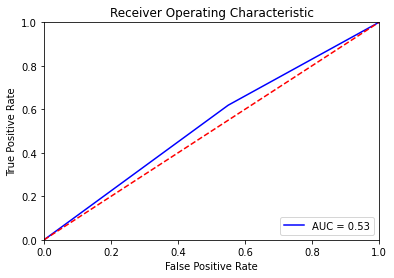

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.43902439024390244
[[ 9 11]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.43902439024390244 0.45 0.4390243902439024


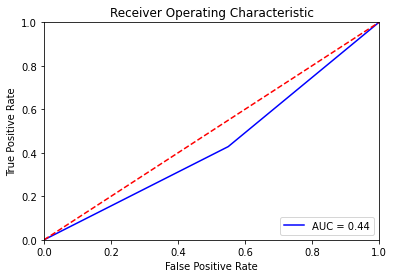

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[0,5,6,7]]
X_test_ec = X_test_scaler_all3[:,[0,5,6,7]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, precision, f1-score 0.0 0.4878048780487805 0.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


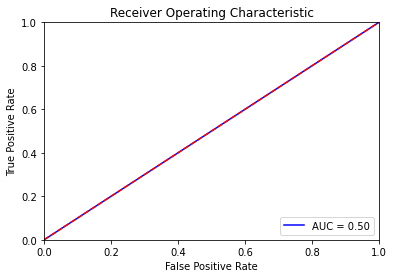

{'max_depth': 11, 'min_samples_leaf': 2}
Mejor ROC-AUC en validación cruzada: 0.550
Mejor valor del hiperparámetro: {'max_depth': 11, 'min_samples_leaf': 2}
0.5365853658536586
[[11  9]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5365853658536586 0.55 0.5365853658536585


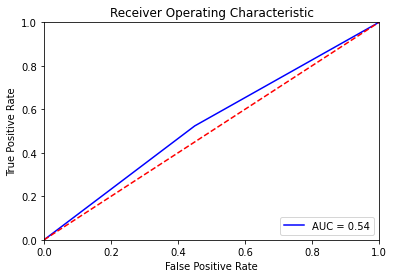

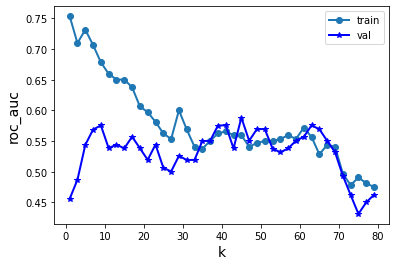

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
Valor correspondiente para el hiperparámetro: {'n_neighbors': 45}
0.4878048780487805
[[16  4]
 [17  4]]
Sensibilidad, Accuracy, precision, f1-score 0.19047619047619047 0.4878048780487805 0.5 0.27586206896551724


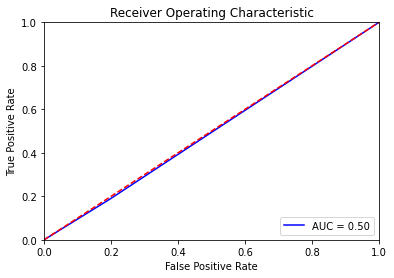

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.4634146341463415
[[ 4 16]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.4634146341463415 0.4838709677419355 0.5769230769230769


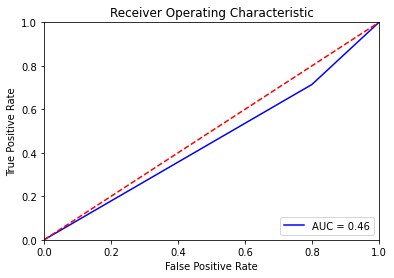

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.4146341463414634
[[ 8 12]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.4146341463414634 0.42857142857142855 0.42857142857142855


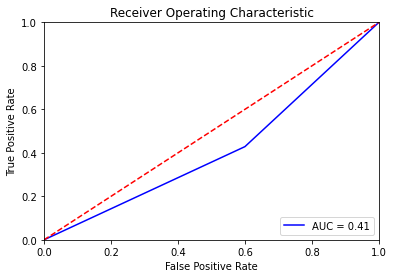

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])



In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[0,5,6,7]]
X_test_ec = X_test_scaler_all4[:,[0,5,6,7]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, precision, f1-score 0.0 0.4878048780487805 0.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


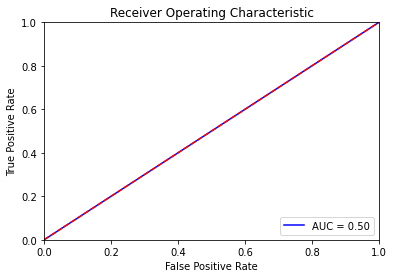

{'max_depth': 5, 'min_samples_leaf': 3}
Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 3}
0.5365853658536586
[[14  6]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.5365853658536586 0.5714285714285714 0.4571428571428571


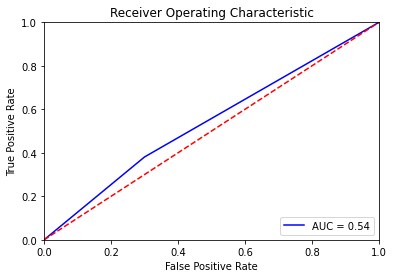

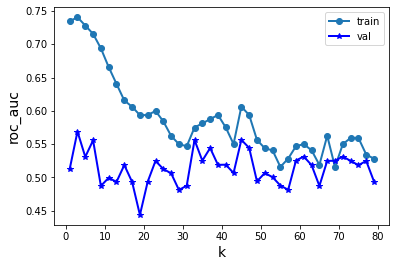

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.6097560975609756
[[13  7]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.6097560975609756 0.631578947368421 0.6


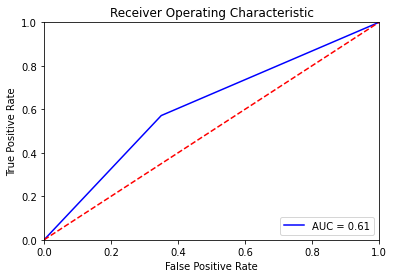

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.5853658536585366
[[15  5]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5853658536585366 0.6428571428571429 0.5142857142857143


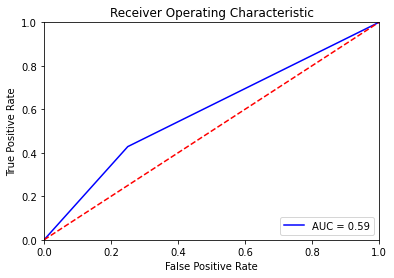

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.463
0.5609756097560976
[[ 9 11]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5609756097560976 0.56 0.6086956521739131


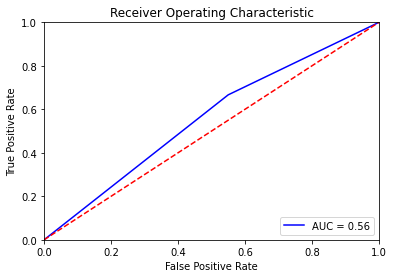

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.458537  0.028444
1          DT  0.526829  0.024873
2  Radial SVM  0.497561  0.054756
3  Linear SVM  0.478049  0.052538

In [ ]:
model2_scaler=['LASSO', 'DT','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


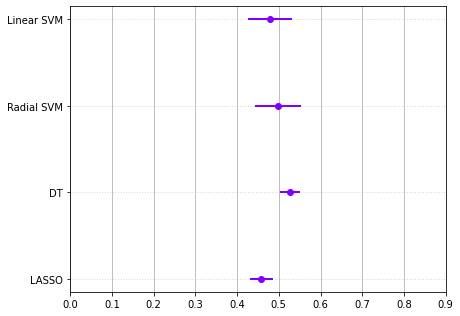

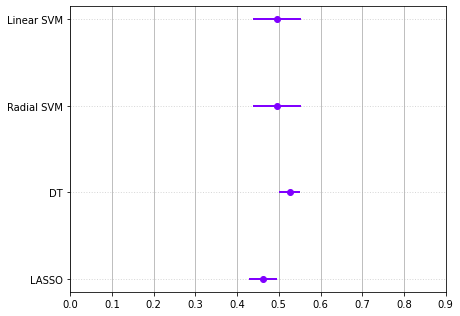

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)


In [ ]:
model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler

In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.482927  0.400000  0.391695  0.485000   0.394737
árbol                0.517073  0.466667  0.477031  0.518333   0.553704
Knn                  0.585366  0.600000  0.572132  0.585000   0.573632
SVC                  0.492683  0.676190  0.570943  0.488095   0.501928
SVC-lineal           0.487805  0.580952  0.527382  0.488095   0.503255

# ***PARA CHI SQUARE ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[13,14,15]]
X_test_ec = X_test_scaler_all0[:,[13,14,15]]


In [ ]:
recall_reg_scaler=[]
accuracy_reg_scaler=[]
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler=[]

Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


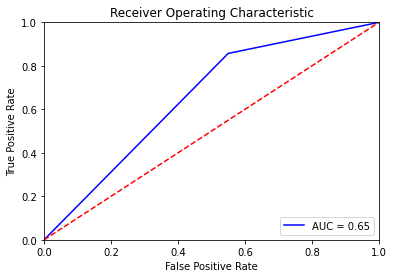

{'max_depth': 2}


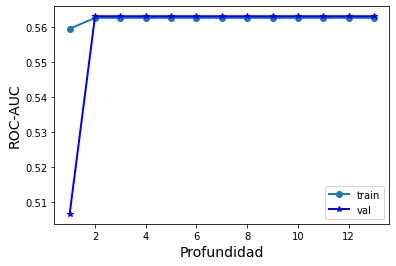

Mejor ROC-AUC en validación cruzada: 0.563
Mejor valor del hiperparámetro: {'max_depth': 2}
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


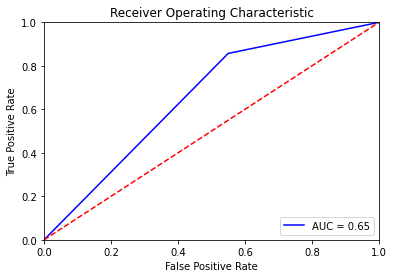

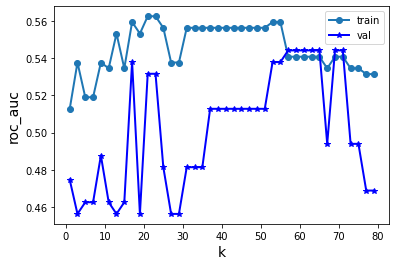

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
Valor correspondiente para el hiperparámetro: {'n_neighbors': 57}
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


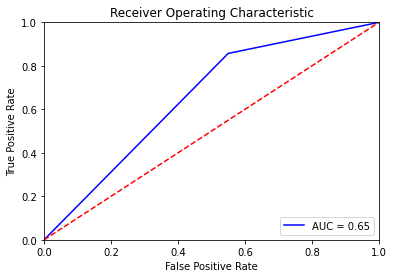

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


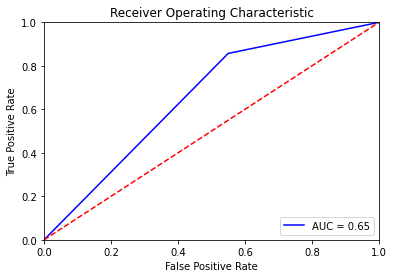

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


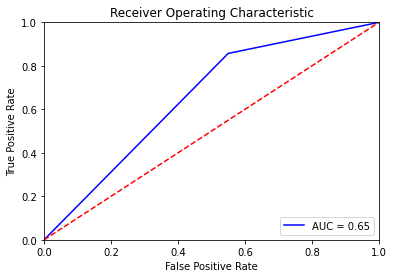

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[13,14,15]]
X_test_ec = X_test_scaler_all1[:,[13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


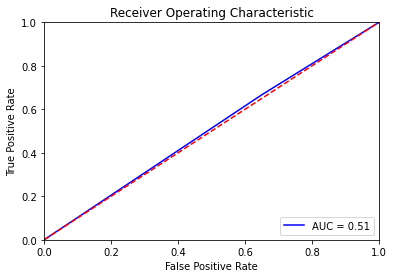

{'max_depth': 1}


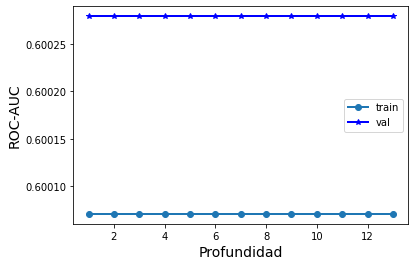

Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1}
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


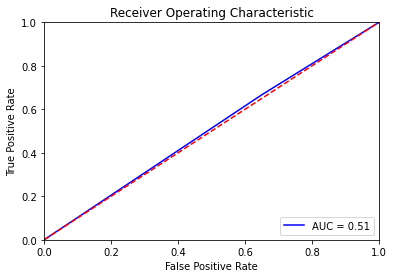

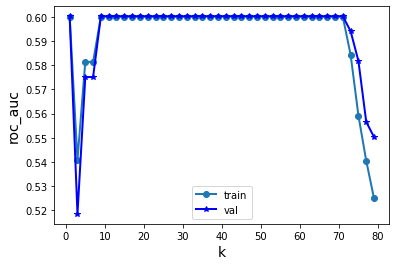

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.5365853658536586
[[ 4 16]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.5365853658536586 0.5294117647058824 0.6545454545454545


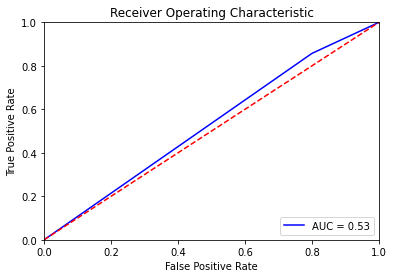

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


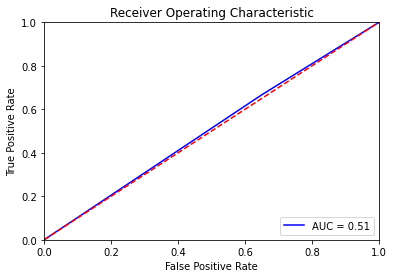

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


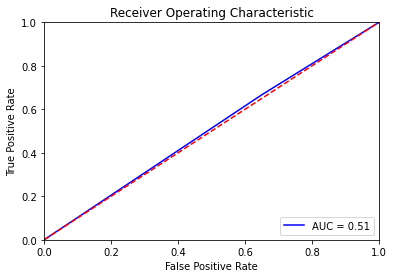

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[13,14,15]]
X_test_ec = X_test_scaler_all2[:,[13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1e-07, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


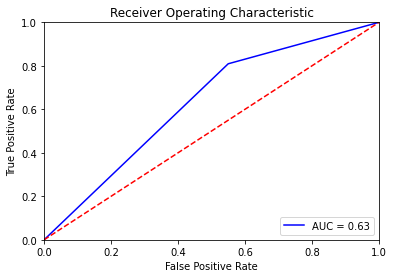

{'max_depth': 2}


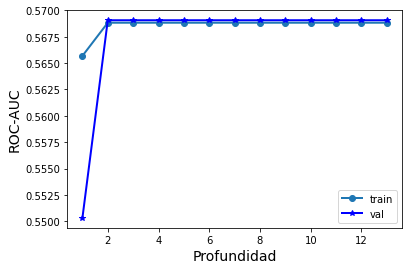

Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 2}
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


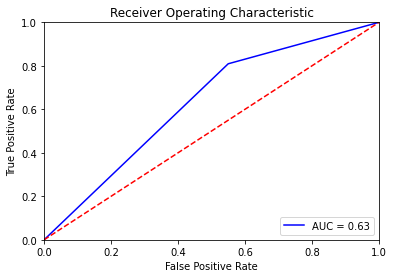

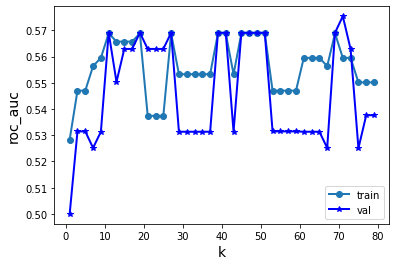

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
Valor correspondiente para el hiperparámetro: {'n_neighbors': 71}
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


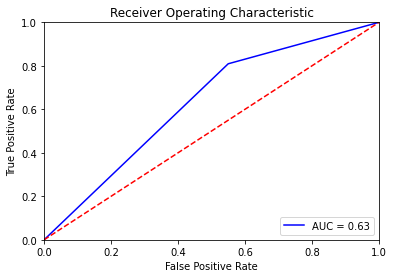

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


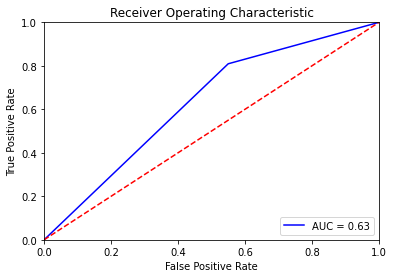

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


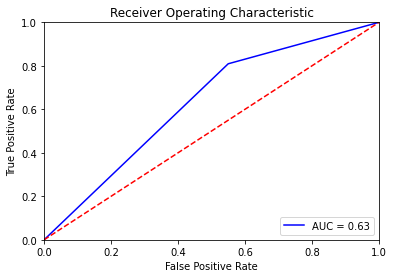

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[13,14,15]]
X_test_ec = X_test_scaler_all3[:,[13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


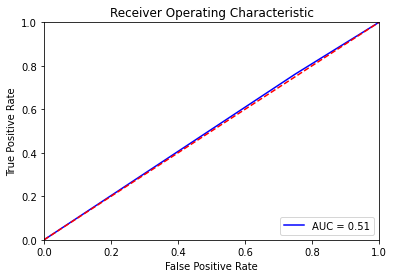

{'max_depth': 1}


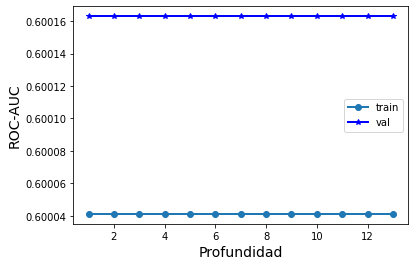

Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1}
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


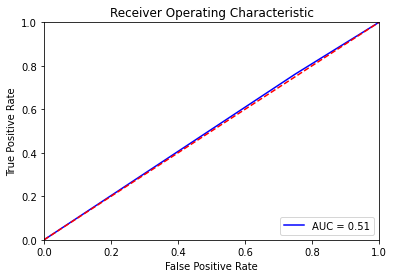

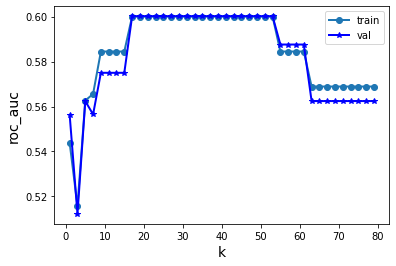

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


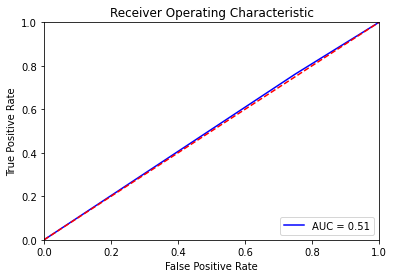

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


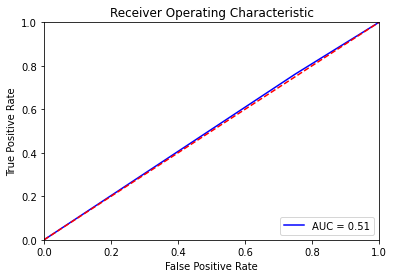

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


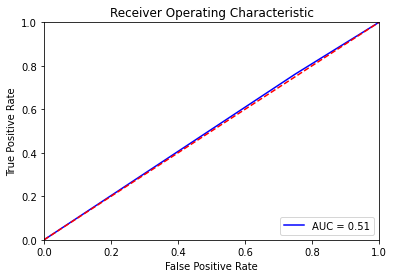

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])



In [ ]:

# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[13,14,15]]
X_test_ec = X_test_scaler_all4[:,[13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


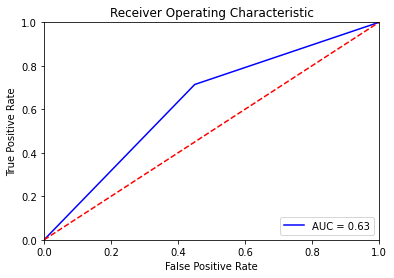

{'max_depth': 1}


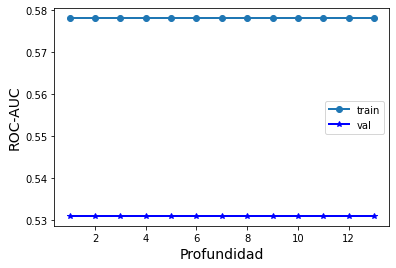

Mejor ROC-AUC en validación cruzada: 0.531
Mejor valor del hiperparámetro: {'max_depth': 1}
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


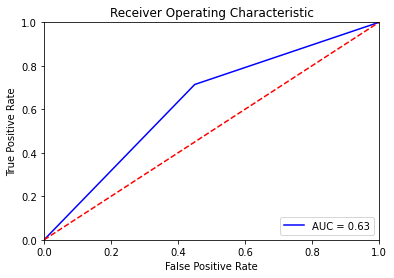

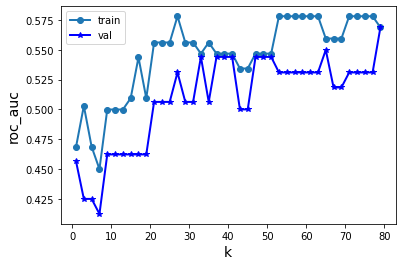

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
Valor correspondiente para el hiperparámetro: {'n_neighbors': 79}
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


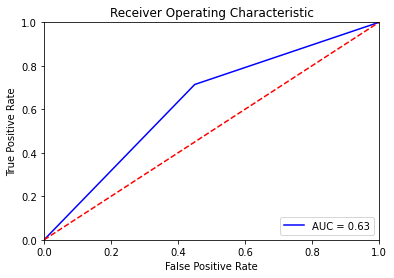

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


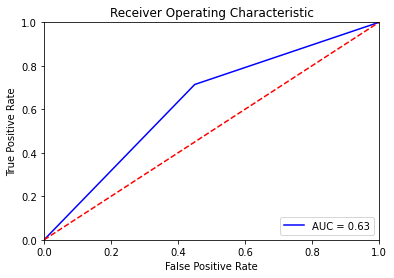

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


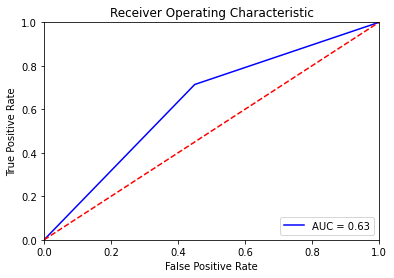

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0  regresión_logistica  0.590244  0.064346
1                árbol  0.558537  0.062135
2                  knn  0.560976  0.070690
3                  svc  0.543902  0.074019
4           svc_lineal  0.541463  0.076198

In [ ]:
model2_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


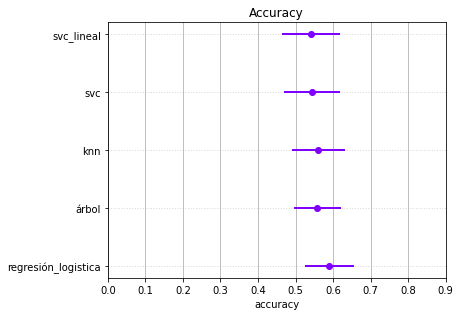

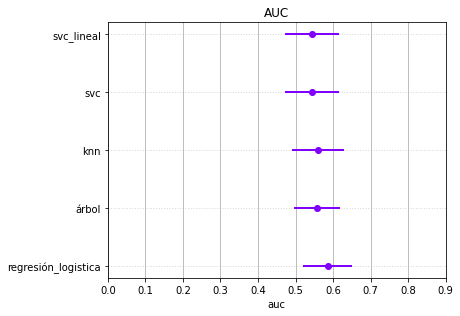

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)


In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.590244  0.761905  0.655852  0.585952   0.577496
árbol                0.558537  0.619048  0.581474  0.557024   0.564489
Knn                  0.560976  0.638095  0.586033  0.559048   0.561322
SVC                  0.543902  0.523810  0.507840  0.544405   0.555457
SVC-lineal           0.541463  0.528571  0.510370  0.544405   0.544981

# ***COMBINAMOS AMBOS MÉTODOS Y ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[0,1,2,3,13,14,15]]
X_test_ec = X_test_scaler_all0[:,[0,1,2,3,13,14,15]]


In [ ]:
recall_reg_scaler=[]
accuracy_reg_scaler=[]
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler=[]

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.6341463414634146
[[10 10]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.6341463414634146 0.6153846153846154 0.6808510638297872


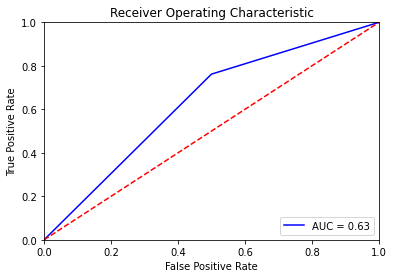

{'max_depth': 1}


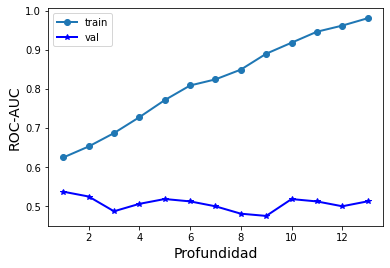

Mejor ROC-AUC en validación cruzada: 0.538
Mejor valor del hiperparámetro: {'max_depth': 1}
0.5121951219512195
[[11  9]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5121951219512195 0.5263157894736842 0.5


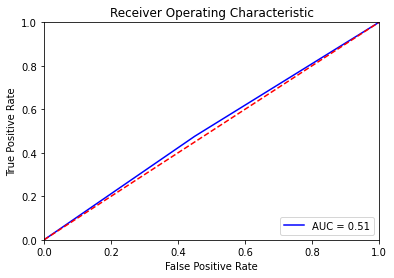

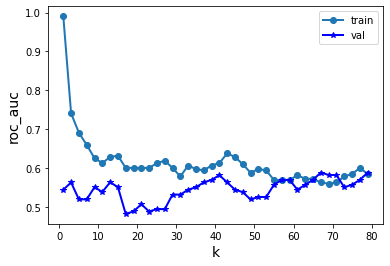

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
Valor correspondiente para el hiperparámetro: {'n_neighbors': 67}
0.5121951219512195
[[10 10]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5121951219512195 0.5238095238095238 0.5238095238095238


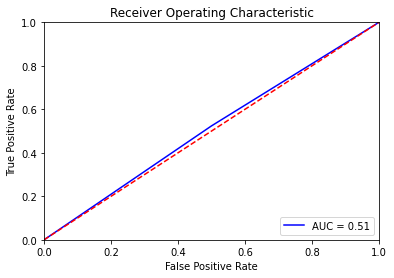

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


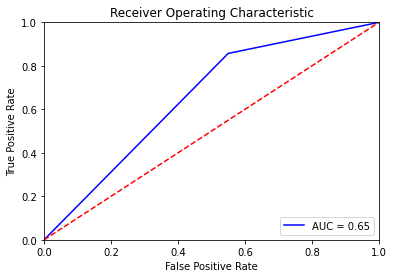

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


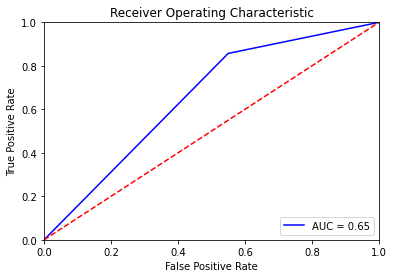

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[0,1,2,3,13,14,15]]
X_test_ec = X_test_scaler_all1[:,[0,1,2,3,13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


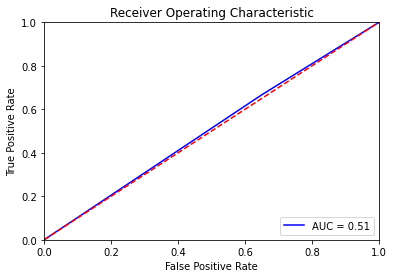

{'max_depth': 13}


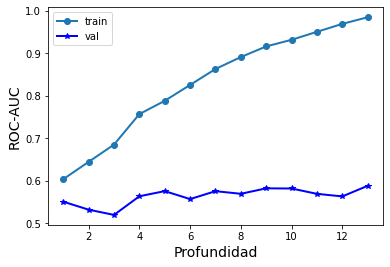

Mejor ROC-AUC en validación cruzada: 0.587
Mejor valor del hiperparámetro: {'max_depth': 13}
0.4878048780487805
[[10 10]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.4878048780487805 0.5 0.4878048780487805


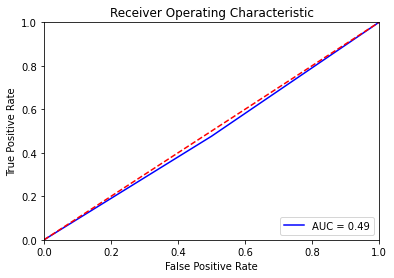

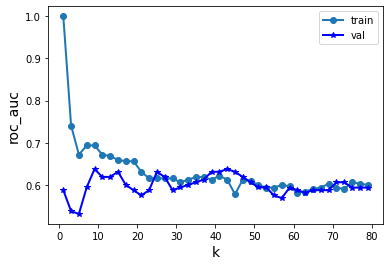

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.638
Valor correspondiente para el hiperparámetro: {'n_neighbors': 9}
0.43902439024390244
[[12  8]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.43902439024390244 0.42857142857142855 0.34285714285714286


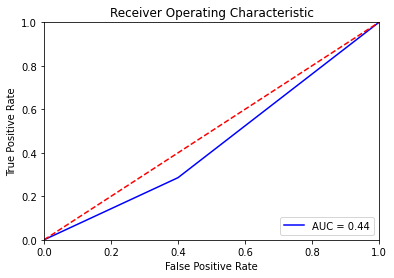

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


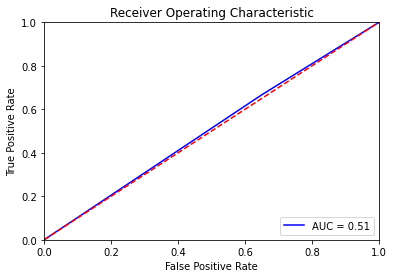

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


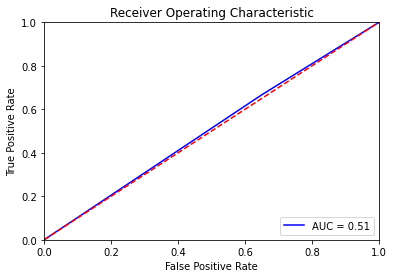

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[0,1,2,3,13,14,15]]
X_test_ec = X_test_scaler_all2[:,[0,1,2,3,13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


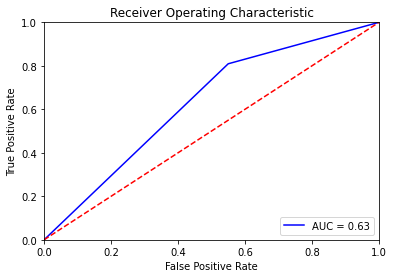

{'max_depth': 2}


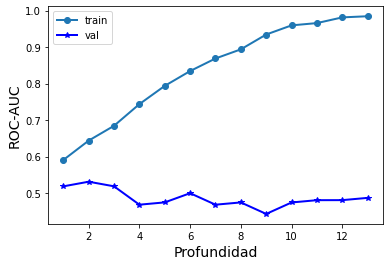

Mejor ROC-AUC en validación cruzada: 0.531
Mejor valor del hiperparámetro: {'max_depth': 2}
0.5853658536585366
[[15  5]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5853658536585366 0.6428571428571429 0.5142857142857143


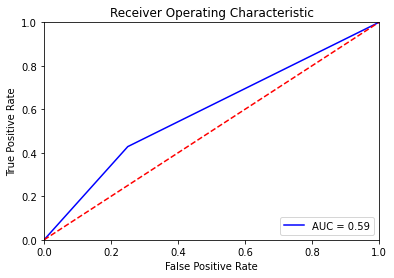

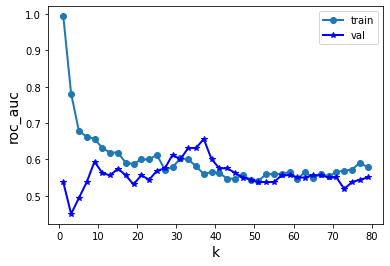

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.656
Valor correspondiente para el hiperparámetro: {'n_neighbors': 37}
0.6341463414634146
[[12  8]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.6341463414634146 0.6363636363636364 0.6511627906976744


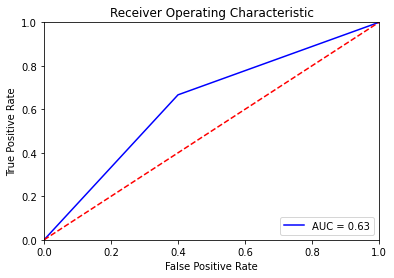

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


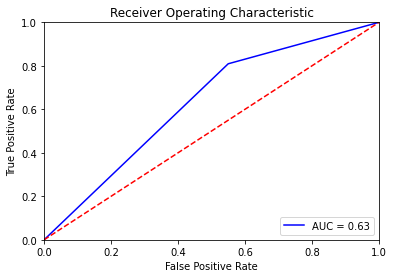

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


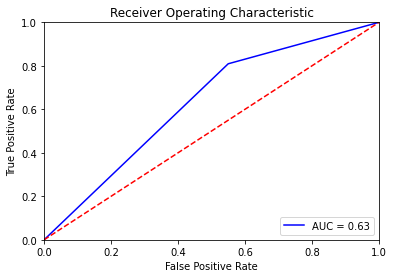

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[0,1,2,3,13,14,15]]
X_test_ec = X_test_scaler_all3[:,[0,1,2,3,13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


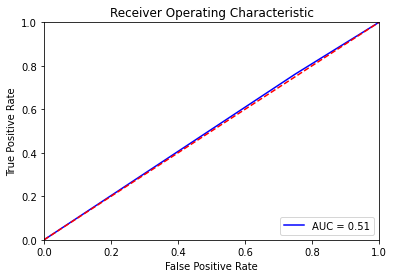

{'max_depth': 4}


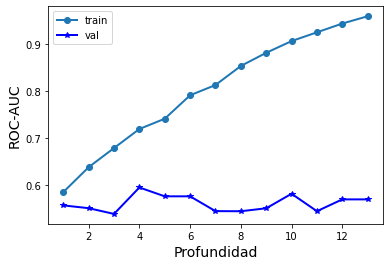

Mejor ROC-AUC en validación cruzada: 0.594
Mejor valor del hiperparámetro: {'max_depth': 4}
0.4878048780487805
[[12  8]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.4878048780487805 0.5 0.4324324324324324


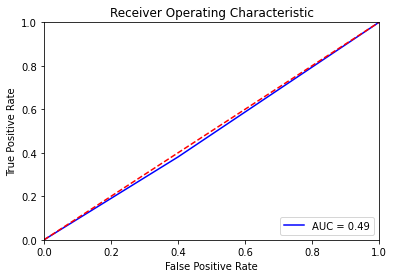

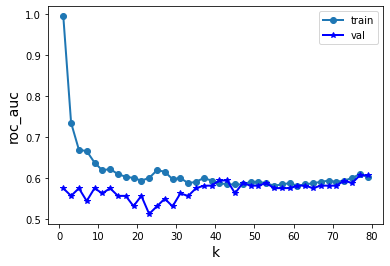

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.607
Valor correspondiente para el hiperparámetro: {'n_neighbors': 77}
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


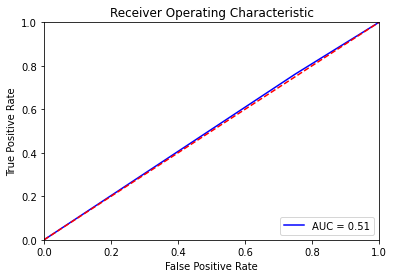

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


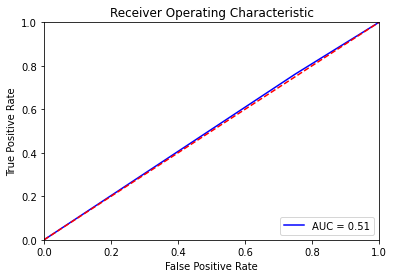

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


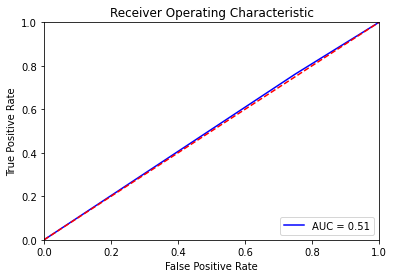

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])



In [ ]:

# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[0,1,2,3,13,14,15]]
X_test_ec = X_test_scaler_all4[:,[0,1,2,3,13,14,15]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


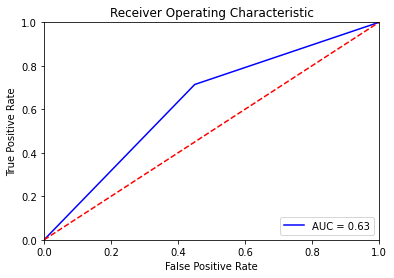

{'max_depth': 2}


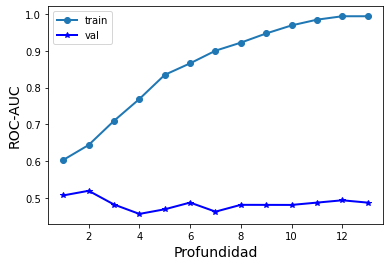

Mejor ROC-AUC en validación cruzada: 0.519
Mejor valor del hiperparámetro: {'max_depth': 2}
0.5121951219512195
[[ 9 11]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.5121951219512195 0.5217391304347826 0.5454545454545454


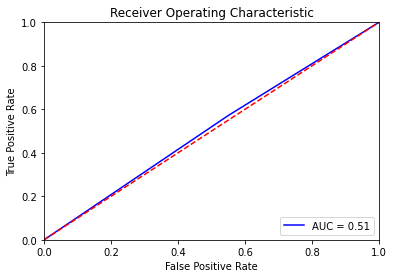

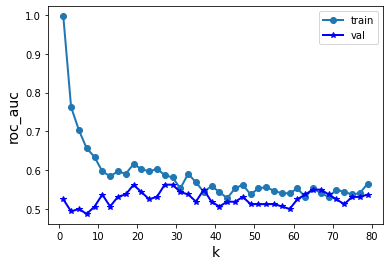

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.563
Valor correspondiente para el hiperparámetro: {'n_neighbors': 27}
0.5609756097560976
[[16  4]
 [14  7]]
Sensibilidad, Accuracy, precision, f1-score 0.3333333333333333 0.5609756097560976 0.6363636363636364 0.43749999999999994


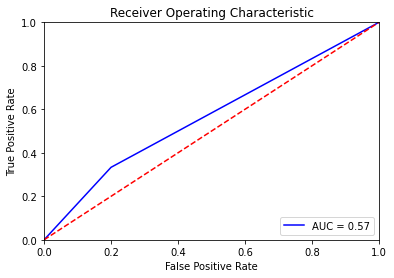

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


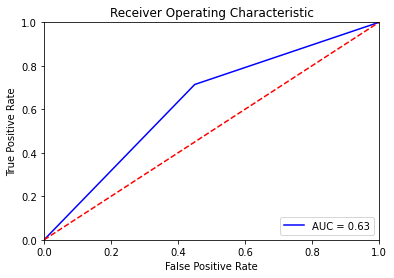

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


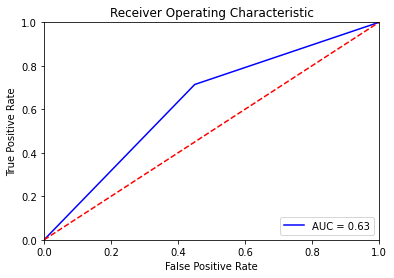

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0  regresión_logistica  0.585366  0.059744
1                árbol  0.544715  0.058174
2                  knn  0.551220  0.070013
3                  svc  0.559350  0.074229
4           svc_lineal  0.557724  0.076024

In [ ]:
model2_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


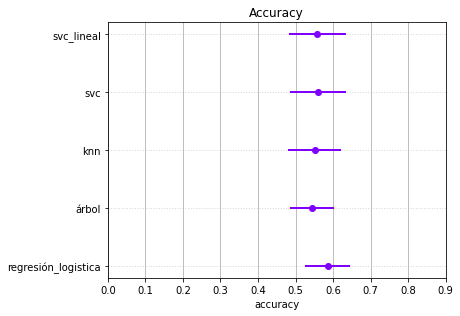

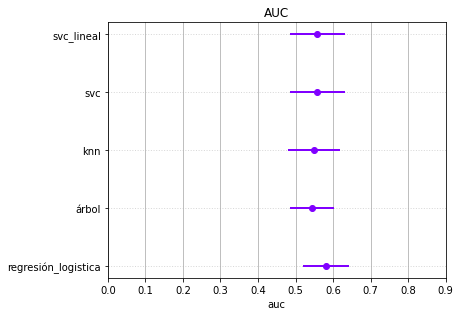

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)


In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.585366  0.742857  0.648023  0.581429   0.576435
árbol                0.544715  0.568254  0.552981  0.544127   0.555720
Knn                  0.551220  0.596825  0.562070  0.550079   0.556964
SVC                  0.559350  0.603175  0.557177  0.558254   0.562804
SVC-lineal           0.557724  0.606349  0.558864  0.558254   0.555819

# ***CON BOOTSTRAP ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[1,4,13]]
X_test_ec = X_test_scaler_all0[:,[1,4,13]]


In [ ]:
recall_reg_scaler=[]
accuracy_reg_scaler=[]
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler=[]

Valor correspondiente para el hiperparámetro: {'C': 50, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
0.5609756097560976
[[13  7]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5609756097560976 0.5882352941176471 0.5263157894736842


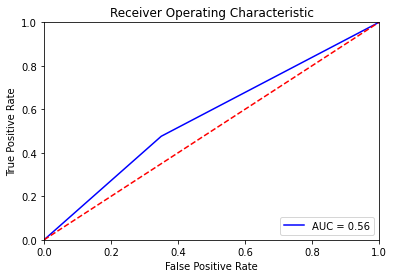

{'max_depth': 10}


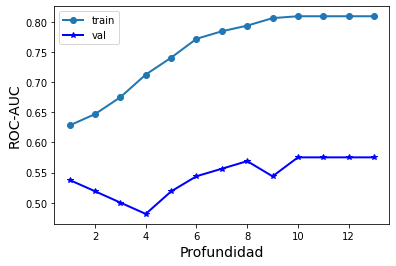

Mejor ROC-AUC en validación cruzada: 0.575
Mejor valor del hiperparámetro: {'max_depth': 10}
0.43902439024390244
[[10 10]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.43902439024390244 0.4444444444444444 0.41025641025641024


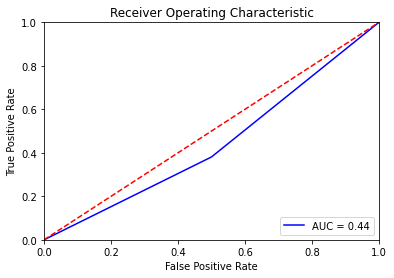

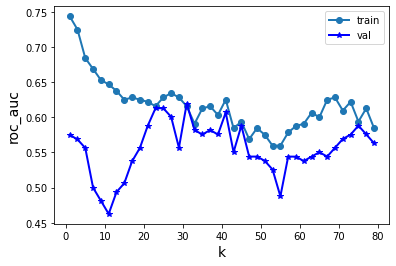

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.620
Valor correspondiente para el hiperparámetro: {'n_neighbors': 31}
0.5853658536585366
[[13  7]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5853658536585366 0.6111111111111112 0.5641025641025642


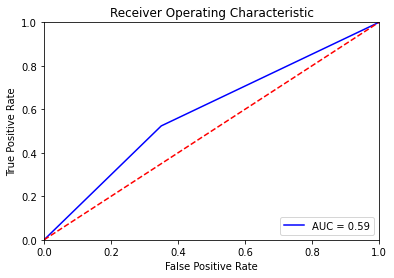

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.5365853658536586
[[17  3]
 [16  5]]
Sensibilidad, Accuracy, precision, f1-score 0.23809523809523808 0.5365853658536586 0.625 0.3448275862068965


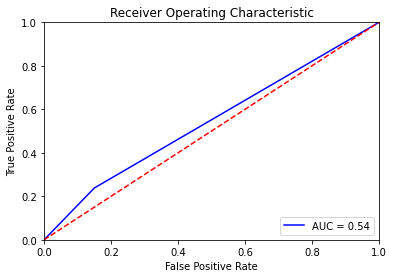

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4878048780487805
[[10 10]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.4878048780487805 0.5 0.4878048780487805


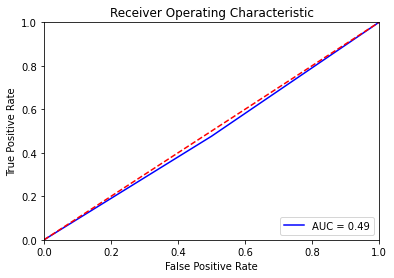

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[1,4,13]]
X_test_ec = X_test_scaler_all1[:,[1,4,13]]


Valor correspondiente para el hiperparámetro: {'C': 100, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.625
0.4878048780487805
[[ 6 14]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.4878048780487805 0.5 0.5714285714285715


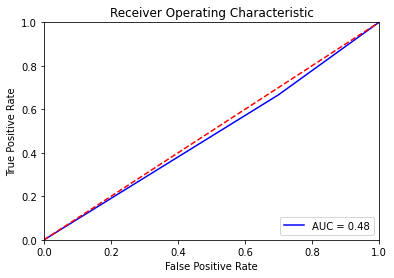

{'max_depth': 5}


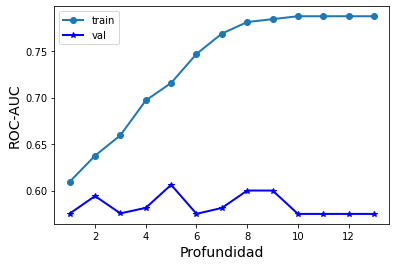

Mejor ROC-AUC en validación cruzada: 0.606
Mejor valor del hiperparámetro: {'max_depth': 5}
0.4878048780487805
[[10 10]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.4878048780487805 0.5 0.4878048780487805


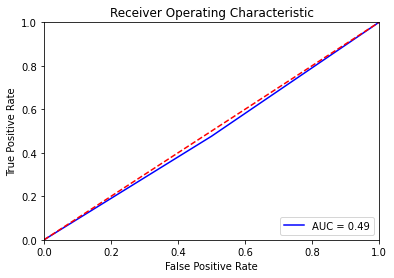

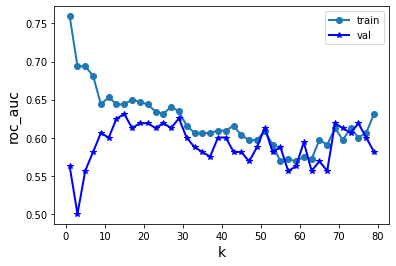

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.631
Valor correspondiente para el hiperparámetro: {'n_neighbors': 15}
0.4878048780487805
[[11  9]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.4878048780487805 0.5 0.4615384615384615


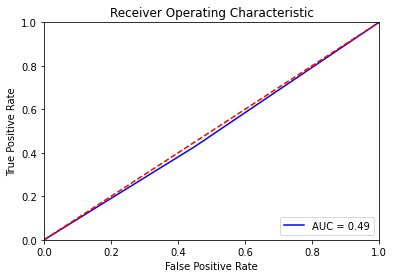

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


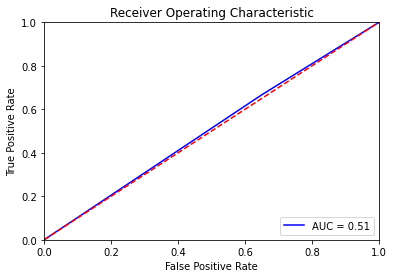

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 7 13]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.5121951219512195 0.5185185185185185 0.5833333333333334


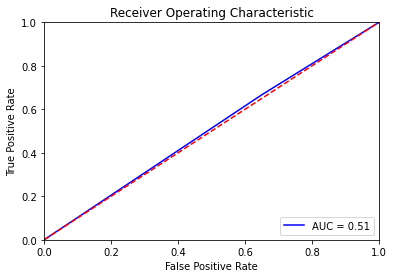

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[1,4,13]]
X_test_ec = X_test_scaler_all2[:,[1,4,13]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


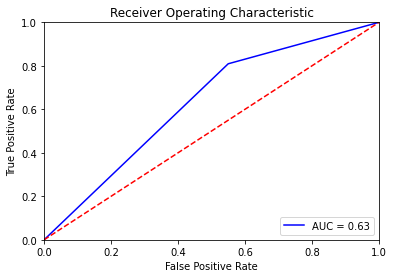

{'max_depth': 5}


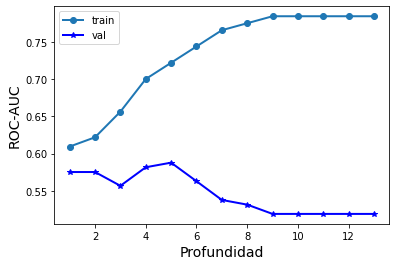

Mejor ROC-AUC en validación cruzada: 0.588
Mejor valor del hiperparámetro: {'max_depth': 5}
0.5365853658536586
[[ 7 13]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.5365853658536586 0.5357142857142857 0.6122448979591837


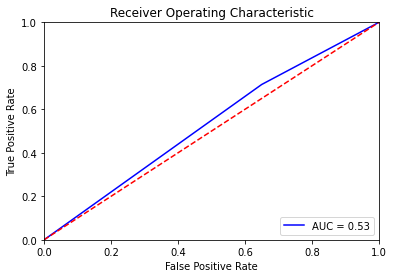

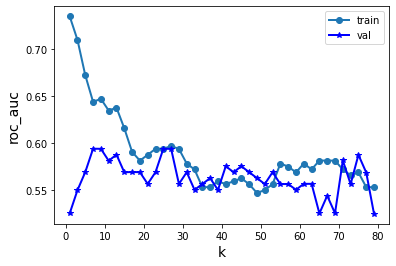

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}
0.5853658536585366
[[ 9 11]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.5853658536585366 0.5769230769230769 0.6382978723404256


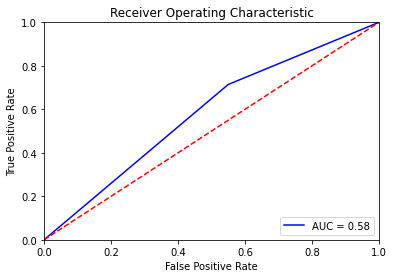

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


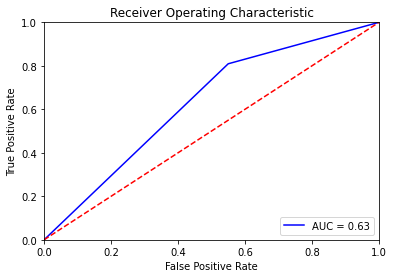

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.6341463414634146 0.6071428571428571 0.6938775510204083


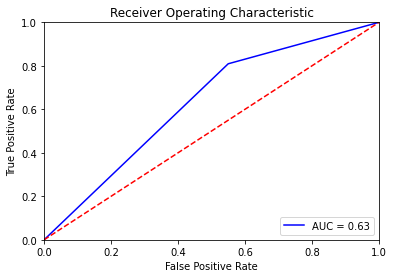

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[1,4,13]]
X_test_ec = X_test_scaler_all3[:,[1,4,13]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


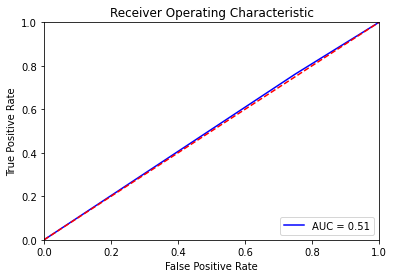

{'max_depth': 1}


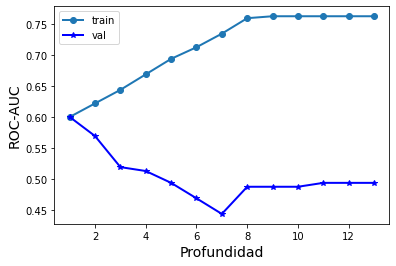

Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1}
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


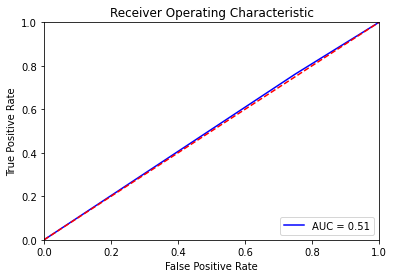

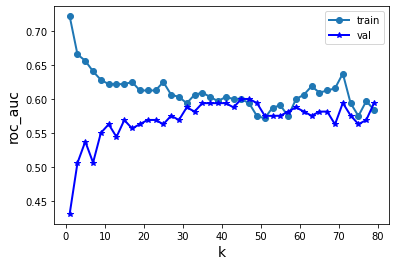

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
Valor correspondiente para el hiperparámetro: {'n_neighbors': 45}
0.6341463414634146
[[10 10]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.6341463414634146 0.6153846153846154 0.6808510638297872


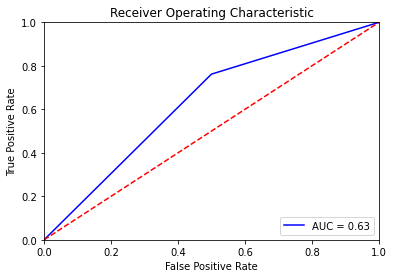

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


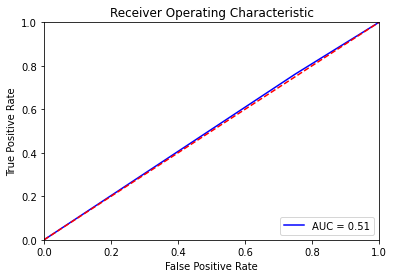

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


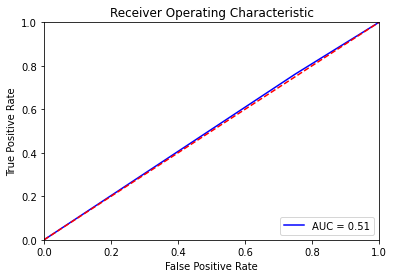

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])



In [ ]:

# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[1,4,13]]
X_test_ec = X_test_scaler_all4[:,[1,4,13]]


Valor correspondiente para el hiperparámetro: {'C': 20, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5609756097560976 0.6 0.5


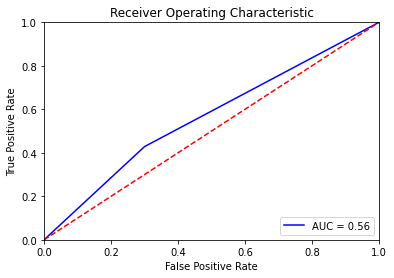

{'max_depth': 10}


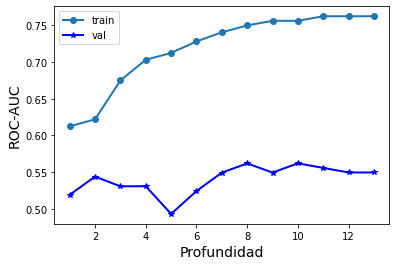

Mejor ROC-AUC en validación cruzada: 0.562
Mejor valor del hiperparámetro: {'max_depth': 10}
0.5121951219512195
[[13  7]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.5121951219512195 0.5333333333333333 0.4444444444444444


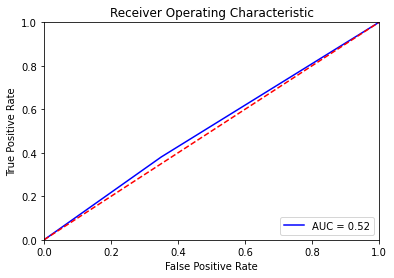

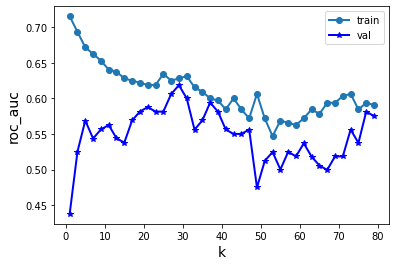

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
Valor correspondiente para el hiperparámetro: {'n_neighbors': 29}
0.5853658536585366
[[14  6]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5853658536585366 0.625 0.5405405405405405


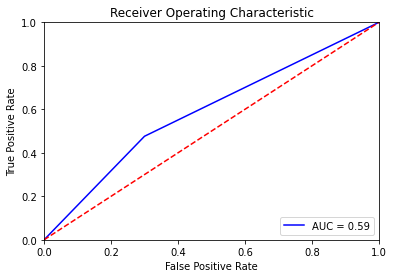

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.6097560975609756
[[ 9 11]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.6097560975609756 0.5925925925925926 0.6666666666666666


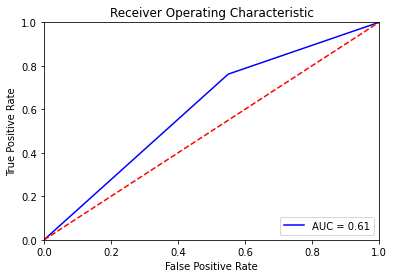

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.506
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.6341463414634146 0.625 0.6666666666666666


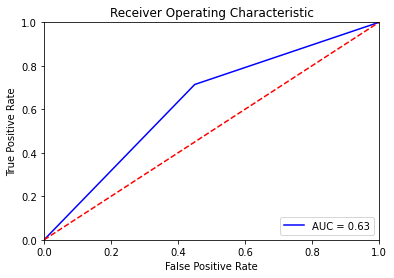

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0  regresión_logistica  0.551220  0.050223
1                árbol  0.525283  0.049984
2                  knn  0.562165  0.057251
3                  svc  0.555027  0.059447
4           svc_lineal  0.555027  0.066366

In [ ]:
model2_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


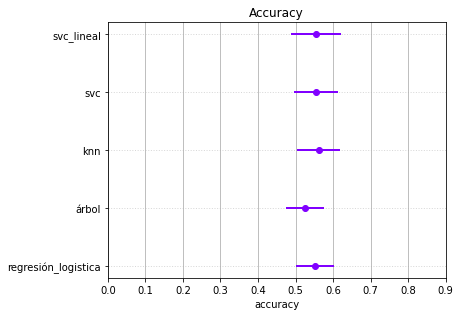

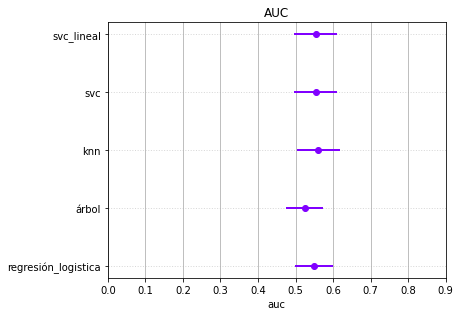

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)


In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.551220  0.628571  0.581401  0.549286   0.562301
árbol                0.525283  0.549361  0.533260  0.524681   0.537274
Knn                  0.562165  0.609756  0.578033  0.560976   0.567881
SVC                  0.555027  0.626016  0.569671  0.553252   0.563474
SVC-lineal           0.555027  0.667828  0.593159  0.553252   0.551844

# ***PARA UN SOLO SUBCONJUNTO Y PROBANDO CON DISTINTOS HIPERPARÁMETROS***

In [ ]:
# Creamos x (input) e y (output)
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y = data["BCaseControlStatus"]

X.shape, Y.shape

((201, 4), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y,test_size=0.2, random_state=3)

A continuación, imputaremos los valores NaN de las variables categóricas calculando la moda  del conjunto de 
train y aplicacándolos tanto al conjunto de train como al conjunto de test:

In [ ]:
X_train.isna().sum()

BBGAttitudeScaleCompEnroll    1
HighBGLevTakeAction           1
LowBGLevTakeAction            1
PtCurrA1cGoal                 4
DealHypoEp_Agree              0
DealHypoEp_Disagree           0
DealHypoEp_Neutral            0
UndertreatHypo_Agree          0
UndertreatHypo_Disagree       0
UndertreatHypo_Neutral        0
HighBGDamage_Agree            0
HighBGDamage_Disagree         0
HighBGDamage_Neutral          0
FreqHypoDamage_Agree          0
FreqHypoDamage_Disagree       0
FreqHypoDamage_Neutral        0
DangersHighBG_Agree           0
DangersHighBG_Disagree        0
DangersHighBG_Neutral         0
dtype: int64

# ***Sustitución de las variables numéricas a partir de Knn imputer***

>1 0.531 (0.098)
>3 0.510 (0.093)
>5 0.517 (0.098)
>7 0.502 (0.105)
>9 0.485 (0.109)
>15 0.504 (0.095)
>18 0.483 (0.111)
>21 0.508 (0.111)


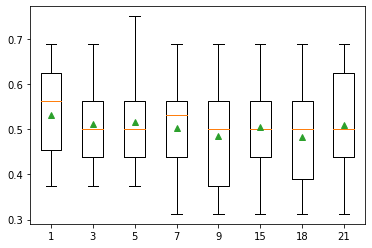

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train)

# transform the dataset
X_train = imputer.transform(X_train)

# print total missing
print('Missing: %d' % sum(isnan(X_train).flatten()))


Missing: 0


In [ ]:
X_test=imputer.transform(X_test)


In [ ]:
print('Missing: %d' % sum(isnan(X_test).flatten()))


Missing: 0


In [ ]:
X_train_numerical=X_train[:,:4]
X_train_categorical=X_train[:,4:]
X_test_numerical=X_test[:,:4]
X_test_categorical=X_test[:,4:]

In [ ]:
#CON MIN-MAX

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical)
X_scaler_train_numerical = scaler.transform(X_train_numerical) 
X_scaler_test_numerical=scaler.transform(X_test_numerical)

In [ ]:
X_train_scaler_all=np.c_[X_scaler_train_numerical,X_train_categorical]
X_test_scaler_all=np.c_[X_scaler_test_numerical,X_test_categorical]


# ***Clasificación***

# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_std_all, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.505


In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-7,1e-6,1-1e-4,10,100],"penalty":["l1"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_std_all, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.505


In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-7,1e-6,1-1e-4,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15],"penalty":["l1"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_std_all, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 3, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.509


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l1', C=3)
modelo_rid_log=logridge.fit(X_train_std_all, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_std_all)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[11  9]
 [ 8 13]]
tn: 11, fp:9, fn:8, tp:13
Accuracy: 0.5853658536585366
                  precision    recall  f1-score   support

Paciente control       0.58      0.55      0.56        20
   Paciente caso       0.59      0.62      0.60        21

        accuracy                           0.59        41
       macro avg       0.58      0.58      0.58        41
    weighted avg       0.59      0.59      0.58        41

Sensibilidad: 0.6190476190476191


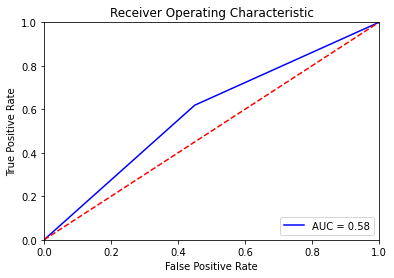

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy=[]
res_recall=[]
res_f1=[]
res_roc=[]

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5853658536585366
La matriz de confusión obtenida: [[11  9]
 [ 8 13]]
El valor de f1_score obtenido: 0.6046511627906977
El valor de recall es 0.6190476190476191


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)


Lo hace completamente de forma aleatoria

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_std_all, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

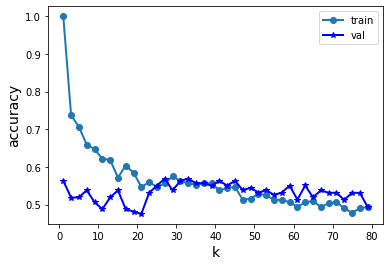

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
Valor correspondiente para el hiperparámetro: {'n_neighbors': 27}


In [ ]:
knn('accuracy')

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,41,2)}
  k_grid = np.array(range(1,41,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_std_all, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

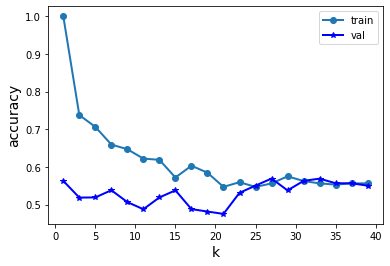

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
Valor correspondiente para el hiperparámetro: {'n_neighbors': 27}


In [ ]:
knn('accuracy')

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,25,2)}
  k_grid = np.array(range(1,25,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_std_all, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

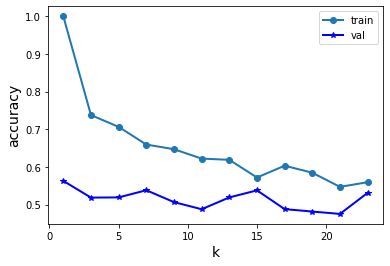

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.563
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}


In [ ]:
knn('accuracy')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 27)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_std_all, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_std_all)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[11  9]
 [14  7]]
El valor de f1_score obtenido: 0.37837837837837834
El valor de recall es 0.3333333333333333


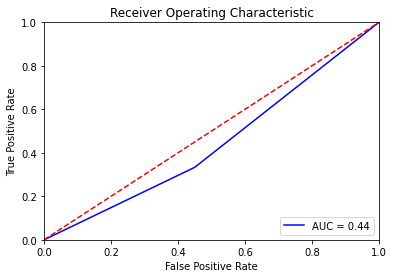

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_output_knn2)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_output_knn2)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_output_knn2, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_output_knn2)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[11  9]
 [14  7]]
tn: 11, fp:9, fn:14, tp:7
Accuracy: 0.43902439024390244
                  precision    recall  f1-score   support

Paciente control       0.44      0.55      0.49        20
   Paciente caso       0.44      0.33      0.38        21

        accuracy                           0.44        41
       macro avg       0.44      0.44      0.43        41
    weighted avg       0.44      0.44      0.43        41

Sensibilidad: 0.3333333333333333


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,20)}
  profundidad_grid = np.array(range(1,20))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_std_all, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 3}


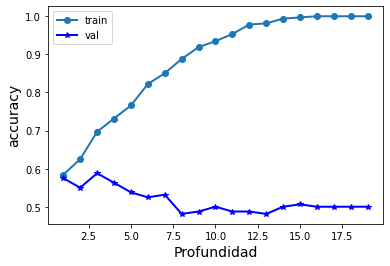

Mejor valor de la figura de mérito en validación cruzada: 0.588
Mejor valor del hiperparámetro: {'max_depth': 3}


In [ ]:
arbol('accuracy')

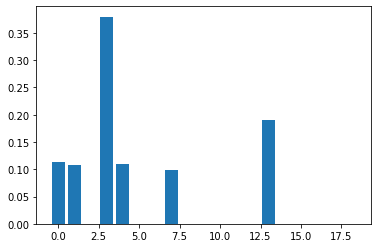

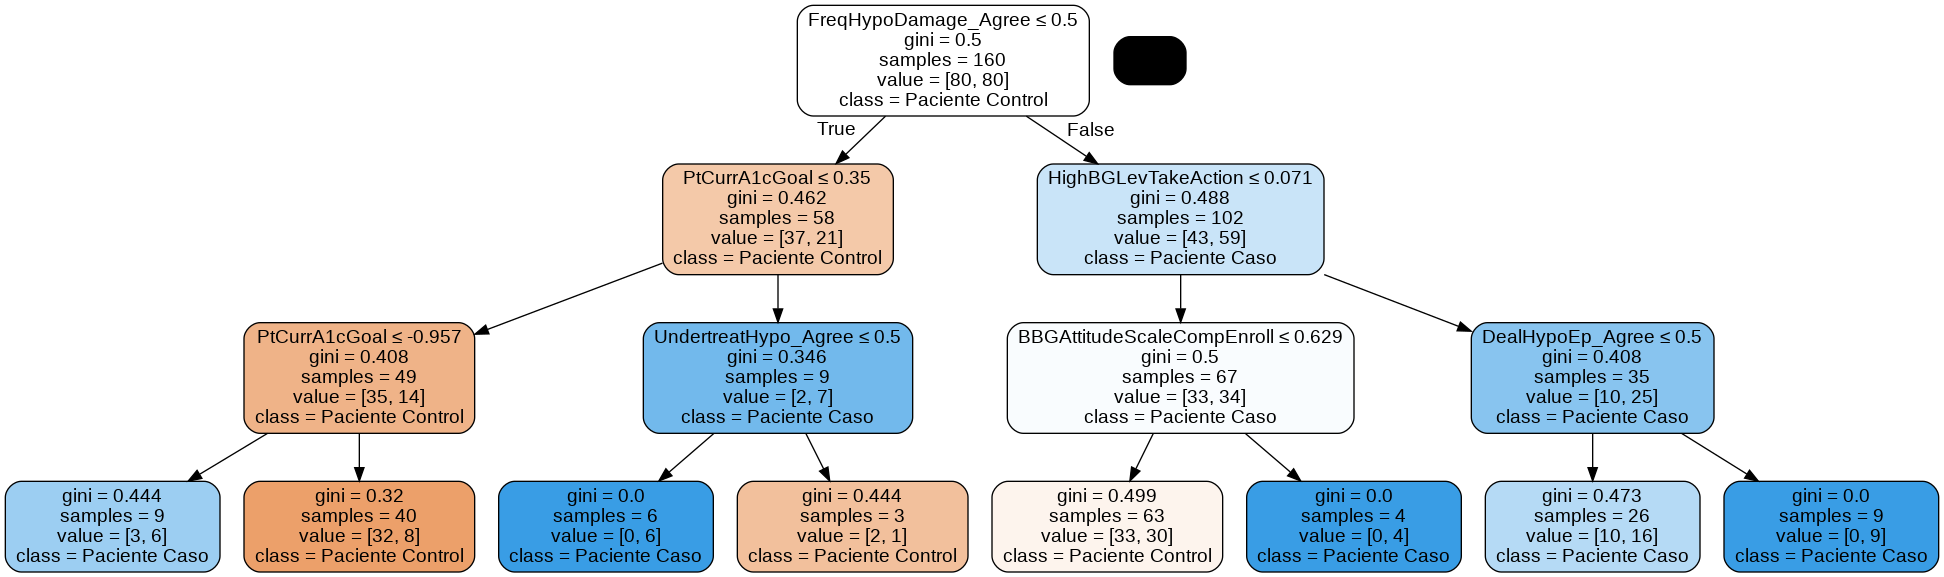

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=3)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_std_all, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_std_all)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[1:],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[15  5]
 [14  7]]
El valor de f1_score obtenido: 0.4242424242424242
El valor de recall es 0.3333333333333333


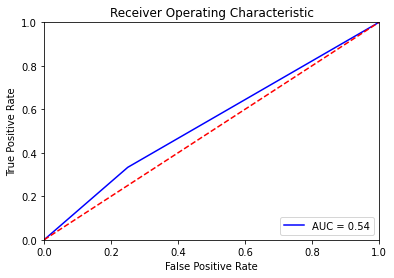

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
from sklearn.svm import SVC


In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly','linear'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

svc.fit(X_train_std_all, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556


In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly','linear'], 'gamma': [10,1,0.1,0.01,1e-2, 1e-3, 1e-4, 1e-5,1e-6,1e-7],
                     'C': [1e-5,1e-4,0.001, 0.10, 0.1, 1,2,3,4,5,6,7,8,9,10, 15,20,25,30,35,40, 50, 100, 1000]}
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

svc.fit(X_train_std_all, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


KeyboardInterrupt: ignored

In [ ]:


svc=SVC(C=50,kernel='poly',gamma=0.001,decision_function_shape='ovo')
svc.fit(X_std_train,Y_train)
y_test_pred=svc.predict(X_std_test)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


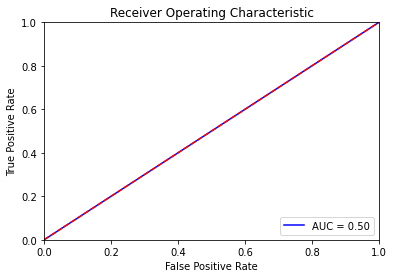

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística", "Knn","Árbol","SVC"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                    
Regresión logística  0.463415  0.500000  0.450000  0.467391
Knn                  0.463415  0.611111  0.500000  0.479469
Árbol                0.463415  0.500000  0.450000  0.467391
SVC                  0.439024  1.000000  0.610169  0.500000

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística", "Knn","Árbol"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                    
Regresión logística  0.585366  0.619048  0.604651  0.584524
Knn                  0.439024  0.333333  0.378378  0.441667
Árbol                0.536585  0.333333  0.424242  0.541667

# ***Feature selection***

In [ ]:
# Creamos x (input) e y (output)
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y = data["BCaseControlStatus"]

X.shape, Y.shape

((201, 19), (201,))

In [ ]:
X

BBGAttitudeScaleCompEnroll  HighBGLevTakeAction  LowBGLevTakeAction  \
0                           0.0                200.0                70.0   
1                           0.0                230.0                70.0   
2                           0.0                250.0                50.0   
3                           0.0                150.0                60.0   
4                          11.0                150.0                60.0   
..                          ...                  ...                 ...   
196                         8.0                250.0                70.0   
197                         8.0                400.0                65.0   
198                         8.0                200.0                65.0   
199                        11.0                150.0                75.0   
200                         8.0                250.0                60.0   

     PtCurrA1cGoal  DealHypoEp_Agree  DealHypoEp_Disagree  DealHypoEp_Neutral  \
0             65.0                 1                    0                   0   
1            120.0                 0                    0                   1   
2             60.0                 0                    1                   0   
3             58.0                 1                    0                   0   
4              NaN                 1                    0                   0   
..             ...               ...                  ...                 ...   
196           70.0                 0                    1                   0   
197           78.0                 0                    0                   1   
198           70.0                 0                    1                   0   
199           78.0                 0                    1                   0   
200           65.0                 0                    1                   0   

     UndertreatHypo_Agree  UndertreatHypo_Disagree  UndertreatHypo_Neutral  \
0                       1                        0                       0   
1                       1                        0                       0   
2                       0                        1                       0   
3                       1                        0                       0   
4                       1                        0                       0   
..                    ...                      ...                     ...   
196                     0                        1                       0   
197                     1                        0                       0   
198                     0                        0                       1   
199                     0                        1                       0   
200                     0                        1                       0   

     HighBGDamage_Agree  HighBGDamage_Disagree  HighBGDamage_Neutral  \
0                     1                      0                     0   
1                     1                      0                     0   
2                     0                      1                     0   
3                     1                      0                     0   
4                     1                      0                     0   
..                  ...                    ...                   ...   
196                   1                      0                     0   
197                   0                      0                     1   
198                   0                      1                     0   
199                   0                      0                     1   
200                   0                      1                     0   

     FreqHypoDamage_Agree  FreqHypoDamage_Disagree  FreqHypoDamage_Neutral  \
0                       1                        0                       0   
1                       1                        0                       0   
2                       1                        0                       0   
3    

In [ ]:

X.columns

Index(['BBGAttitudeScaleCompEnroll', 'HighBGLevTakeAction',
       'LowBGLevTakeAction', 'PtCurrA1cGoal', 'DealHypoEp_Agree',
       'DealHypoEp_Disagree', 'DealHypoEp_Neutral', 'UndertreatHypo_Agree',
       'UndertreatHypo_Disagree', 'UndertreatHypo_Neutral',
       'HighBGDamage_Agree', 'HighBGDamage_Disagree', 'HighBGDamage_Neutral',
       'FreqHypoDamage_Agree', 'FreqHypoDamage_Disagree',
       'FreqHypoDamage_Neutral', 'DangersHighBG_Agree',
       'DangersHighBG_Disagree', 'DangersHighBG_Neutral'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y,test_size=0.2, random_state=3)

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

KeyboardInterrupt: ignored

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train)

# transform the dataset
X_train = imputer.transform(X_train)

# print total missing
print('Missing: %d' % sum(isnan(X_train).flatten()))


Missing: 0


In [ ]:
X_test=imputer.transform(X_test)


In [ ]:
print('Missing: %d' % sum(isnan(X_test).flatten()))


Missing: 0


In [ ]:
X_train_numerical=X_train[:,:4]
X_train_categorical=X_train[:,4:]
X_test_numerical=X_test[:,:4]
X_test_categorical=X_test[:,4:]

In [ ]:
#CON MIN-MAX

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical)
X_scaler_train_numerical = scaler.transform(X_train_numerical) 
X_scaler_test_numerical=scaler.transform(X_test_numerical)

In [ ]:
X_train_scaler_all=np.c_[X_scaler_train_numerical,X_train_categorical]
X_test_scaler_all=np.c_[X_scaler_test_numerical,X_test_categorical]


In [ ]:
X_train_scaler_all.shape

(160, 19)

# ***Métodos *embedded****

Ranking de Características:
1. Característica 0 (0.134636)
2. Característica 3 (0.133044)
3. Característica 1 (0.128173)
4. Característica 2 (0.124825)
5. Característica 12 (0.044596)
6. Característica 8 (0.042146)
7. Característica 11 (0.038672)
8. Característica 18 (0.038051)
9. Característica 17 (0.034165)
10. Característica 10 (0.032481)
11. Característica 4 (0.032340)
12. Característica 9 (0.031851)
13. Característica 13 (0.031255)
14. Característica 16 (0.030762)
15. Característica 6 (0.029441)
16. Característica 5 (0.027955)
17. Característica 7 (0.024039)
18. Característica 15 (0.023532)
19. Característica 14 (0.018038)


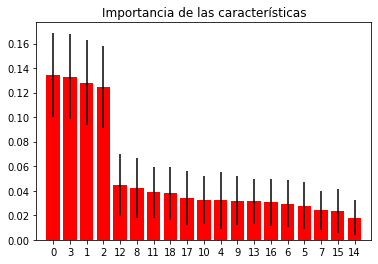

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[0,1,2,3]]
X_test_ec = X_test_scaler_all[:,[0,1,2,3]]


In [ ]:
X_train.isna().sum()

AttributeError: ignored

A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.5853658536585366
[[14  6]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.5853658536585366 0.625 0.5405405405405405


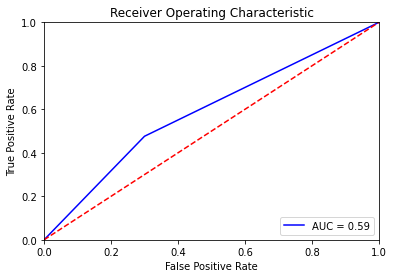

{'max_depth': 12}


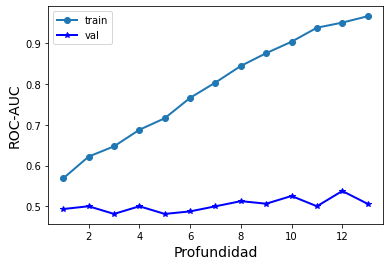

Mejor ROC-AUC en validación cruzada: 0.538
Mejor valor del hiperparámetro: {'max_depth': 12}
0.4634146341463415
[[ 8 12]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.4634146341463415 0.4782608695652174 0.5


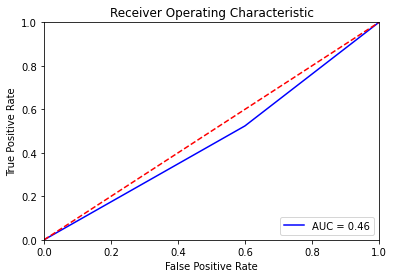

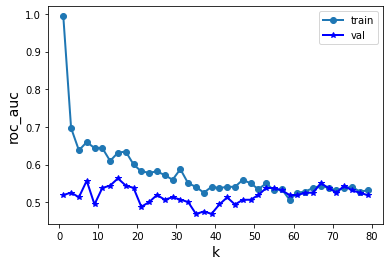

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.563
Valor correspondiente para el hiperparámetro: {'n_neighbors': 15}
0.6097560975609756
[[15  5]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.6097560975609756 0.6666666666666666 0.5555555555555556


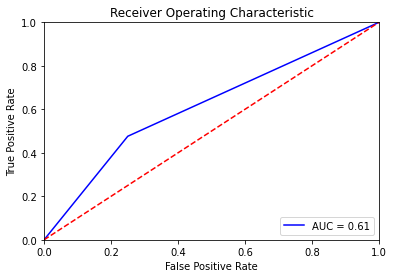

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.4878048780487805
[[17  3]
 [18  3]]
Sensibilidad, Accuracy, precision, f1-score 0.14285714285714285 0.4878048780487805 0.5 0.22222222222222224


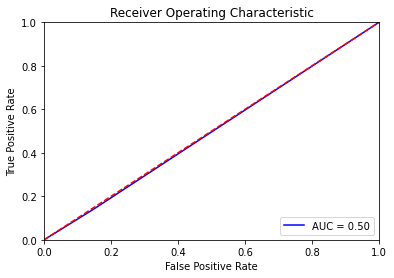

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.4634146341463415
[[16  4]
 [18  3]]
Sensibilidad, Accuracy, precision, f1-score 0.14285714285714285 0.4634146341463415 0.42857142857142855 0.21428571428571427


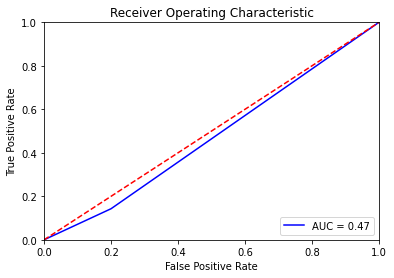

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.585366  0.476190  0.540541  0.588095   0.625000
árbol                0.463415  0.523810  0.500000  0.461905   0.478261
Knn                  0.609756  0.476190  0.555556  0.613095   0.666667
SVC                  0.487805  0.142857  0.222222  0.496429   0.500000
SVC-lineal           0.463415  0.142857  0.214286  0.496429   0.428571

# ***Método filter***

A continuación, a partir de validación cruzada con 3 folds, obtenemos el fold1, fold2 y fold3:

In [ ]:
# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
# # array = data.values
X_train_scaler_all=np.array(X_train_scaler_all)
X_test_scaler_all=np.array(X_test_scaler_all)
Y_train=(np.array(Y_train))
Y_test=np.array(Y_test)
# # Separamos en variables de entrada al modelo (8 primeras) y de salida (1 variable) 
# X = array[:,1:59]
# Y = array[:,0]

names=[]
for i in range(19):
  names.append(str(i))
# names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11','f12','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13']
# names = data.columns[1:]
names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18']

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  # In this case, k=3, 

for train, val in kf.split(X_train_scaler_all):
  # print("%s %s" % (train, val))
  # print(len(val))
  # print(val)
  if (len(val)==53) and (val[0]==107):
    fold3=list(val)
    print(len(fold3))
    print(fold3)
  if (len(val)==54):
    fold1=list(val)
    print(len(fold1))
    print(fold1)
  if (len(val)==53) and (val[0]==54):
    fold2=list(val)
    print(len(fold2))
    print(fold2)

54
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
53
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]
53
[107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


# ***COMBINACIÓN PRIMERA***


En esta primera combinación utilizaremos fold1 y fold2 para entrenar, y fold3 para validar:

In [ ]:
X_entrenamiento=np.concatenate((X_train_scaler_all[fold1], X_train_scaler_all[fold2]))
Y_entrenamiento=np.concatenate((Y_train[fold1], Y_train[fold2]))
X_val=X_train_scaler_all[fold3]
Y_val=Y_train[fold3]

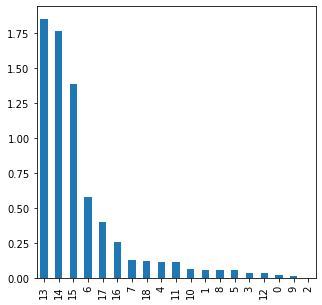

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=chi2, k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_entrenamiento, Y_entrenamiento)
fit_Chi2 = pd.Series(fit_Chi2.scores_)
fit_Chi2.sort_values(ascending=False)

fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# mutual_info = mutual_info_classif(X_entrenamiento, Y_entrenamiento)
# mutual_info

In [ ]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.sort_values(ascending=False)

In [ ]:
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(5, 5))


In [ ]:
# X_val=X_val[:, [1,2,21,22,24]] 
# print(len(X_val), len(Y_val))

In [ ]:
# X_entrenamiento=X_entrenamiento[:, [1,2,21,22,24]]

# ***COMBINACIÓN 2***

En esta combinación usaremos fold1 y fold3 para entrenar y usaremos fold 2 para validar:

In [ ]:
X_entrenamiento2=np.concatenate((X_train_scaler_all[fold1], X_train_scaler_all[fold3]))
Y_entrenamiento2=np.concatenate((Y_train[fold1], Y_train[fold3]))
X_val2=X_train_scaler_all[fold2]
Y_val2=Y_train[fold2]

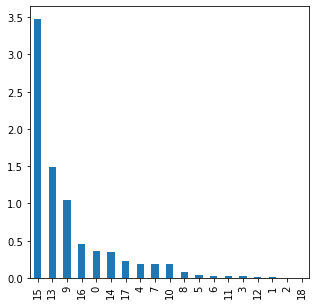

In [ ]:
bestfeatures_Chi2_2 = SelectKBest(score_func=chi2, k='all')
fit_Chi2_2 = bestfeatures_Chi2_2.fit(X_entrenamiento2, Y_entrenamiento2)
fit_Chi2_2 = pd.Series(fit_Chi2_2.scores_)
fit_Chi2_2.sort_values(ascending=False)

fit_Chi2_2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_2.scores_.sort_values})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0,figsize=(50,8))
# plt.title("Estadístico chi cuadrado considerando subconjunto X train")

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# mutual_info = mutual_info_classif(X_entrenamiento2, Y_entrenamiento2)
# mutual_info

In [ ]:

# mutual_info = pd.Series(mutual_info)
# mutual_info.sort_values(ascending=False)

In [ ]:
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [ ]:
# X_val2=X_val2[:, [1,2]] 
# X_entrenamiento2=X_entrenamiento2[:, [1,2]]

# ***COMBINACIÓN 3***

En este último caso, utilizaremos el fold 2 y fold3 para entrenar y el fold 1 para validar:

In [ ]:
X_entrenamiento3=np.concatenate((X_train_scaler_all[fold2], X_train_scaler_all[fold3]))
Y_entrenamiento3=np.concatenate((Y_train[fold2], Y_train[fold3]))
X_val3=X_train_scaler_all[fold1]
Y_val3=Y_train[fold1]

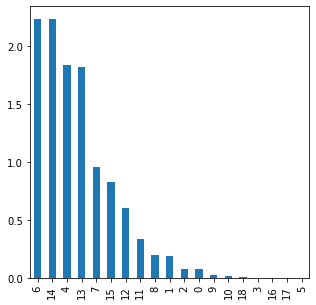

In [ ]:
bestfeatures_Chi2_3 = SelectKBest(score_func=chi2, k='all')
fit_Chi2_3 = bestfeatures_Chi2_3.fit(X_entrenamiento3, Y_entrenamiento3)
fit_Chi2_3 = pd.Series(fit_Chi2_3.scores_)
fit_Chi2_3.sort_values(ascending=False)

fit_Chi2_3.sort_values(ascending=False).plot.bar(figsize=(5, 5))
# gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_3.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
# plt.title("Estadístico chi cuadrado considerando subconjunto X train")

* FreqHypoDamage_Agree	
* FreqHypoDamage_Disagree	
* FreqHypoDamage_Neutral

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# mutual_info = mutual_info_classif(X_entrenamiento3, Y_entrenamiento3)
# mutual_info

In [ ]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.sort_values(ascending=False)

In [ ]:
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [ ]:
# X_val3=X_val3[:, [2]] 
# X_entrenamiento3=X_entrenamiento3[:, [2]]

In [ ]:

X_train_ec = X_train_scaler_all[:,[13,14,15]]
X_test_ec = X_test_scaler_all[:,[13,14,15]]


In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


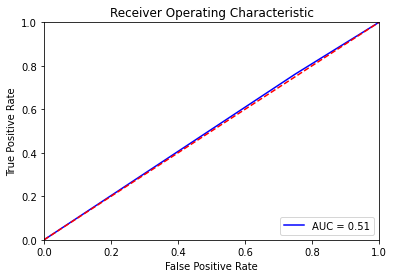

{'max_depth': 1}


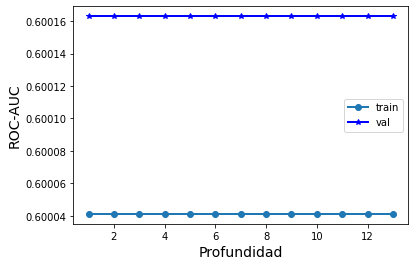

Mejor ROC-AUC en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1}
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


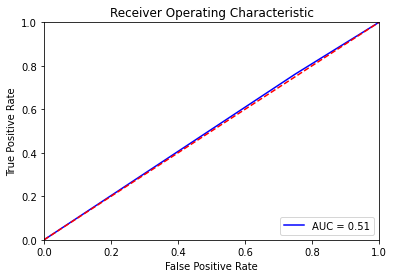

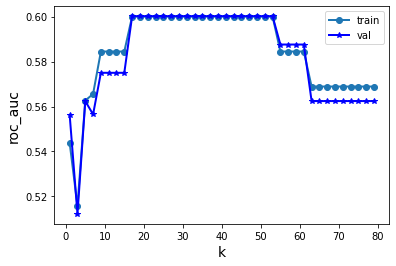

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


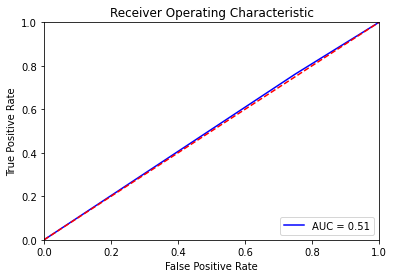

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


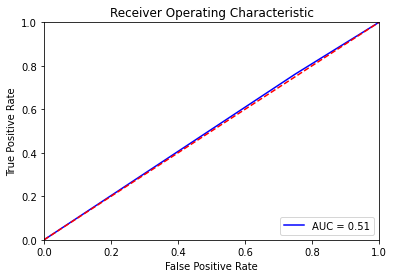

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 5 15]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5121951219512195 0.5161290322580645 0.6153846153846153


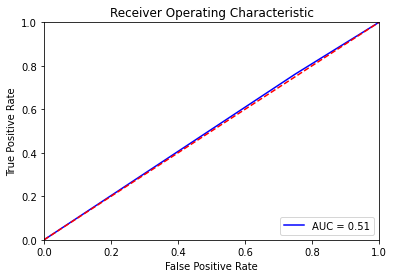

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.512195  0.761905  0.615385  0.505952   0.516129
árbol                0.512195  0.761905  0.615385  0.505952   0.516129
Knn                  0.512195  0.761905  0.615385  0.505952   0.516129
SVC                  0.512195  0.761905  0.615385  0.505952   0.516129
SVC-lineal           0.512195  0.761905  0.615385  0.505952   0.516129

In [ ]:
O

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel

In [ ]:
feat_labels=X.columns

('BBGAttitudeScaleCompEnroll', 0.12591355911862692)
('HighBGLevTakeAction', 0.1540141289712324)
('LowBGLevTakeAction', 0.13692908904770923)
('PtCurrA1cGoal', 0.16365108469226433)
('DealHypoEp_Agree', 0.03106571436724818)
('DealHypoEp_Disagree', 0.025075340644072804)
('DealHypoEp_Neutral', 0.026973547911158923)
('UndertreatHypo_Agree', 0.022069930107052084)
('UndertreatHypo_Disagree', 0.032918001967598864)
('UndertreatHypo_Neutral', 0.02669441635790901)
('HighBGDamage_Agree', 0.028080049859064347)
('HighBGDamage_Disagree', 0.029999852294360838)
('HighBGDamage_Neutral', 0.031469231988364654)
('FreqHypoDamage_Agree', 0.037685094409650004)
('FreqHypoDamage_Disagree', 0.021016225032625437)
('FreqHypoDamage_Neutral', 0.02597954278736443)
('DangersHighBG_Agree', 0.02525701706251879)
('DangersHighBG_Disagree', 0.027617725616575526)
('DangersHighBG_Neutral', 0.02759044776460326)
Ranking de Características:
1. Característica 3 (0.163651)
2. Característica 1 (0.154014)
3. Característica 2 (0.1369

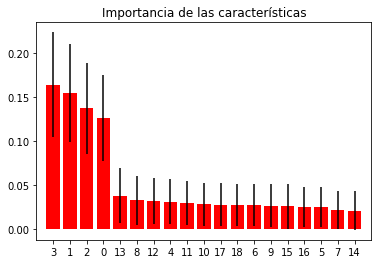

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all, Y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all.shape[1]])
plt.show()


In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train_scaler_all, Y_train)

In [ ]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

HighBGLevTakeAction
PtCurrA1cGoal


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística","árbol" "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

NameError: ignored

# ***NORMALIZACIÓN CON STANDARD SCALER***

# ***División en train y test***

In [ ]:
# Creamos x (input) e y (output)
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y = data["BCaseControlStatus"]


X.shape, Y.shape

((201, 9), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

A continuación, imputaremos los valores NaN de las variables categóricas calculando la moda  del conjunto de 
train y aplicacándolos tanto al conjunto de train como al conjunto de test:

In [ ]:
X_train.isna().sum()

BBGAttitudeScaleCompEnroll    2
DealHypoEp                    2
UndertreatHypo                2
HighBGDamage                  2
FreqHypoDamage                2
DangersHighBG                 2
HighBGLevTakeAction           2
LowBGLevTakeAction            2
PtCurrA1cGoal                 3
dtype: int64

In [ ]:
X_test.isna().sum()

BBGAttitudeScaleCompEnroll    0
DealHypoEp                    0
UndertreatHypo                0
HighBGDamage                  0
FreqHypoDamage                0
DangersHighBG                 0
HighBGLevTakeAction           0
LowBGLevTakeAction            0
PtCurrA1cGoal                 3
dtype: int64

In [ ]:
print(X_train.shape, X_test.shape)

(160, 9) (41, 9)


Antes de convertir esa variable categórica a partir de one-hot encoding, tenemos que tratar esos valores nulos, y para ello sacaremos la moda de X_train en la variable MoCAPtEff, y a continuación, aplicaremos esa moda a los valores nulos de todo el dataset, y posteriormente aplicaremos one hot encoding, y volveremos a dividir en entrenamiento y test.

In [ ]:
from statistics import mode
data["DealHypoEp"].replace(np.nan, mode(X_train["DealHypoEp"]), inplace=True)
data["UndertreatHypo"].replace(np.nan, mode(X_train["UndertreatHypo"]), inplace=True)
data["HighBGDamage"].replace(np.nan, mode(X_train["HighBGDamage"]), inplace=True)
data["FreqHypoDamage"].replace(np.nan, mode(X_train["FreqHypoDamage"]), inplace=True)
data["DangersHighBG"].replace(np.nan, mode(X_train["DangersHighBG"]), inplace=True)

In [ ]:
data.isna().sum()

BCaseControlStatus            0
BBGAttitudeScaleCompEnroll    2
DealHypoEp                    0
UndertreatHypo                0
HighBGDamage                  0
FreqHypoDamage                0
DangersHighBG                 0
HighBGLevTakeAction           2
LowBGLevTakeAction            2
PtCurrA1cGoal                 6
dtype: int64

Entonces, a continuación, aplicamos one-hot encoding:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def var_categ(variable):
  global data
  enc = OneHotEncoder(handle_unknown='ignore')
  enc_data = pd.DataFrame(enc.fit_transform(data[[variable]]).toarray())
  data[variable].value_counts() # Identifity categories
  enc_data.describe()
  #Solo incluye categorías que tengan datos
  #aunque no tengan datos
  data = pd.concat([data,pd.get_dummies(data[variable], prefix=variable)],axis=1)

In [ ]:
var_categ("DealHypoEp")
var_categ("UndertreatHypo")
var_categ("HighBGDamage")
var_categ("FreqHypoDamage")
var_categ("DangersHighBG")


In [ ]:
data.head()

BCaseControlStatus  BBGAttitudeScaleCompEnroll DealHypoEp UndertreatHypo  \
0                   1                         0.0      Agree          Agree   
1                   0                         0.0    Neutral          Agree   
2                   1                         0.0   Disagree       Disagree   
3                   0                         0.0      Agree          Agree   
4                   1                        11.0      Agree          Agree   

  HighBGDamage FreqHypoDamage DangersHighBG  HighBGLevTakeAction  \
0        Agree          Agree         Agree                200.0   
1        Agree          Agree      Disagree                230.0   
2     Disagree          Agree      Disagree                250.0   
3        Agree          Agree         Agree                150.0   
4        Agree          Agree       Neutral                150.0   

   LowBGLevTakeAction  PtCurrA1cGoal  ...  UndertreatHypo_Neutral  \
0                70.0           65.0  ...                       0   
1                70.0          120.0  ...                       0   
2                50.0           60.0  ...                       0   
3                60.0           58.0  ...                       0   
4                60.0            NaN  ...                       0   

   HighBGDamage_Agree  HighBGDamage_Disagree  HighBGDamage_Neutral  \
0                   1                      0                     0   
1                   1                      0                     0   
2                   0                      1                     0   
3                   1                      0                     0   
4                   1                      0                     0   

   FreqHypoDamage_Agree  FreqHypoDamage_Disagree  FreqHypoDamage_Neutral  \
0                     1                        0                       0   
1                     1                        0                       0   
2                     1                        0                       0   
3                     1                        0                       0   
4                     1                        0                       0   

   DangersHighBG_Agree  DangersHighBG_Disagree  DangersHighBG_Neutral  
0                    1                       0                      0  
1                    0                       1                      0  
2                    0                       1                      0  
3                    1                       0                      0  
4                    0                       0                      1  

[5 rows x 25 columns]

In [ ]:
data.drop(['DealHypoEp'], axis=1, inplace=True)
data.drop(['UndertreatHypo'], axis=1, inplace=True) 
data.drop(['HighBGDamage'], axis=1, inplace=True) 
data.drop(['FreqHypoDamage'], axis=1, inplace=True) 
data.drop(['DangersHighBG'], axis=1, inplace=True) 


In [ ]:
data.head()

BCaseControlStatus  BBGAttitudeScaleCompEnroll  HighBGLevTakeAction  \
0                   1                         0.0                200.0   
1                   0                         0.0                230.0   
2                   1                         0.0                250.0   
3                   0                         0.0                150.0   
4                   1                        11.0                150.0   

   LowBGLevTakeAction  PtCurrA1cGoal  DealHypoEp_Agree  DealHypoEp_Disagree  \
0                70.0           65.0                 1                    0   
1                70.0          120.0                 0                    0   
2                50.0           60.0                 0                    1   
3                60.0           58.0                 1                    0   
4                60.0            NaN                 1                    0   

   DealHypoEp_Neutral  UndertreatHypo_Agree  UndertreatHypo_Disagree  \
0                   0                     1                        0   
1                   1                     1                        0   
2                   0                     0                        1   
3                   0                     1                        0   
4                   0                     1                        0   

   UndertreatHypo_Neutral  HighBGDamage_Agree  HighBGDamage_Disagree  \
0                       0                   1                      0   
1                       0                   1                      0   
2                       0                   0                      1   
3                       0                   1                      0   
4                       0                   1                      0   

   HighBGDamage_Neutral  FreqHypoDamage_Agree  FreqHypoDamage_Disagree  \
0                     0                     1                        0   
1                     0                     1                        0   
2                     0                     1                        0   
3                     0                     1                        0   
4                     0                     1                        0   

   FreqHypoDamage_Neutral  DangersHighBG_Agree  DangersHighBG_Disagree  \
0                       0                    1                       0   
1                       0                    0                       1   
2                       0                    0                       1   
3                       0                    1                       0   
4                       0                    0                       0   

   DangersHighBG_Neutral  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

Ahora, ya volvemos a dividir en entrenamiento y test:

In [ ]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 19), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [ ]:
X_train.isna().sum()

BBGAttitudeScaleCompEnroll    2
HighBGLevTakeAction           2
LowBGLevTakeAction            2
PtCurrA1cGoal                 3
DealHypoEp_Agree              0
DealHypoEp_Disagree           0
DealHypoEp_Neutral            0
UndertreatHypo_Agree          0
UndertreatHypo_Disagree       0
UndertreatHypo_Neutral        0
HighBGDamage_Agree            0
HighBGDamage_Disagree         0
HighBGDamage_Neutral          0
FreqHypoDamage_Agree          0
FreqHypoDamage_Disagree       0
FreqHypoDamage_Neutral        0
DangersHighBG_Agree           0
DangersHighBG_Disagree        0
DangersHighBG_Neutral         0
dtype: int64

In [ ]:
X_test.isna().sum()

BBGAttitudeScaleCompEnroll    0
HighBGLevTakeAction           0
LowBGLevTakeAction            0
PtCurrA1cGoal                 3
DealHypoEp_Agree              0
DealHypoEp_Disagree           0
DealHypoEp_Neutral            0
UndertreatHypo_Agree          0
UndertreatHypo_Disagree       0
UndertreatHypo_Neutral        0
HighBGDamage_Agree            0
HighBGDamage_Disagree         0
HighBGDamage_Neutral          0
FreqHypoDamage_Agree          0
FreqHypoDamage_Disagree       0
FreqHypoDamage_Neutral        0
DangersHighBG_Agree           0
DangersHighBG_Disagree        0
DangersHighBG_Neutral         0
dtype: int64

A continuación tratamos los outliers:

In [ ]:
# import pandas as pd
# from scipy import stats


# for i in X_train:
#   z_scores1 = stats.zscore(X_train[i])
#   abs_z_scores1 = np.abs(z_scores1)
#   outliers1 = (abs_z_scores1 > 2)
#   X_train[i] = X_train[i].where(~(outliers1), X_train[i].mean())

#   for i in X_test:
#     # z_scores1 = stats.zscore(X_train[i])
#     # abs_z_scores1 = np.abs(z_scores1)
#     # outliers1 = (abs_z_scores1 > 2)
#     # X_train[i] = X_train[i].where(~(outliers1), X_train[i].mean())

#     z_scores2 = stats.zscore(X_test[i])
#     abs_z_scores2 = np.abs(z_scores2)
#     outliers2 = (abs_z_scores2 > 2)
#     X_test[i] = X_test[i].where(~(outliers2), X_train[i].mean())

#     # z_scores2 = stats.zscore(X_test[i])
#     # abs_z_scores2 = np.abs(z_scores2)
#     # outliers2 = (abs_z_scores2 > 2)
#     # X_test[i] = X_test[i].where(~(outliers2), X_train[i].mean())

#   # except:
#   #   print(i, ": No existen outliers")

#   # for i in X_test:
#   #   try:
#   #     # z_scores1 = stats.zscore(X_train[i])
#   #     # abs_z_scores1 = np.abs(z_scores1)
#   #     # outliers1 = (abs_z_scores1 > 2)
#   #     # X_train[i] = X_train[i].where(~(outliers1), X_train[i].mean())

#   #     z_scores2 = stats.zscore(X_test[i])
#   #     abs_z_scores2 = np.abs(z_scores2)
#   #     outliers2 = (abs_z_scores2 > 2)
#   #     X_test[i] = X_test[i].where(~(outliers2), X_train[i].mean())

#   # except:
#   #   print(i, ": No existen outliers")

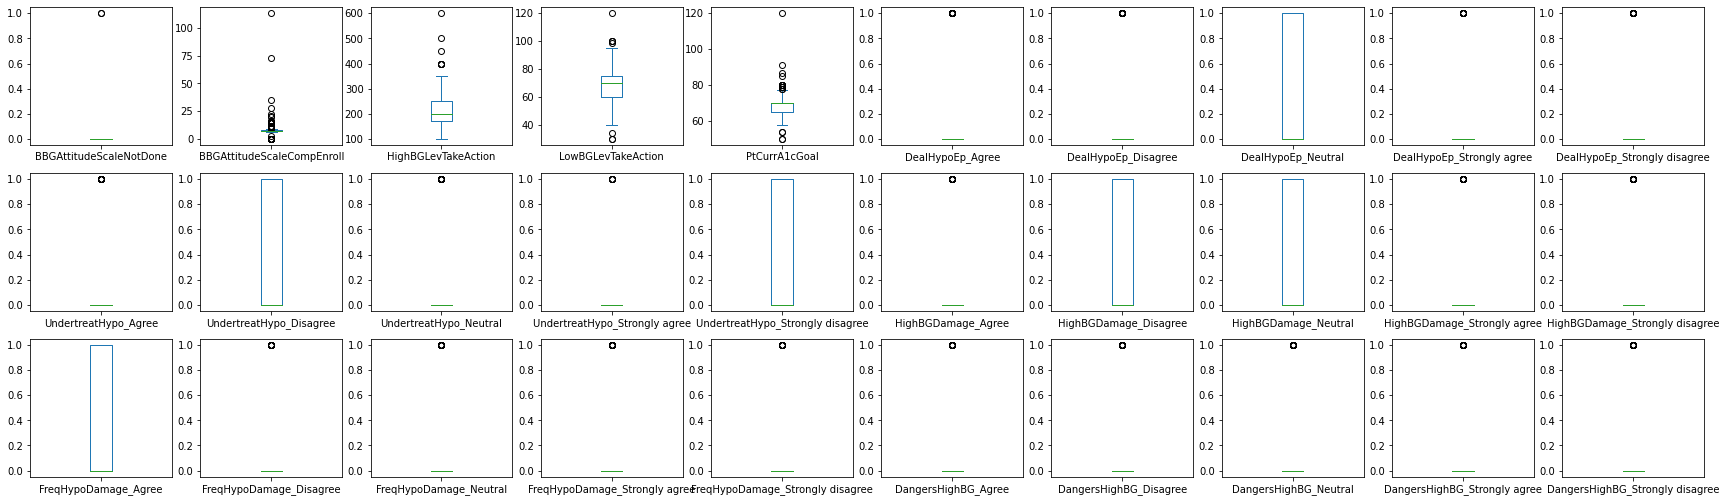

In [ ]:
X_train.plot(kind='box',subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(30,30))
plt.show()

# ***Sustitución de las variables numéricas a partir de Knn imputer***

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train)

# transform the dataset
X_train = imputer.transform(X_train)

# print total missing
print('Missing: %d' % sum(isnan(X_train).flatten()))


Missing: 0


In [ ]:
X_test=imputer.transform(X_test)


In [ ]:
print('Missing: %d' % sum(isnan(X_test).flatten()))


Missing: 0


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


std_all = preprocessing.StandardScaler().fit(X_train)
X_std_train = std_all.transform(X_train) #Tendriamos todas las características estandarizadas
X_std_test = std_all.transform(X_test)

# ***Clasificación***

# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_std_train, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


NameError: ignored

In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l1', C=10)
modelo_rid_log=logridge.fit(X_std_train, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_std_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[10 13]
 [ 9  9]]
tn: 10, fp:13, fn:9, tp:9
Accuracy: 0.4634146341463415
                  precision    recall  f1-score   support

Paciente control       0.53      0.43      0.48        23
   Paciente caso       0.41      0.50      0.45        18

        accuracy                           0.46        41
       macro avg       0.47      0.47      0.46        41
    weighted avg       0.47      0.46      0.46        41

Sensibilidad: 0.5


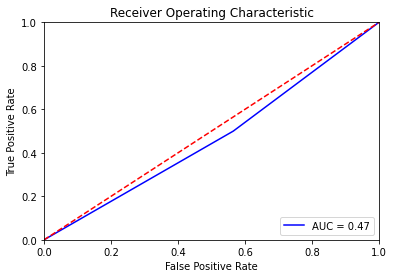

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy=[]
res_recall=[]
res_f1=[]
res_roc=[]

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)


Lo hace completamente de forma aleatoria

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_std_train, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

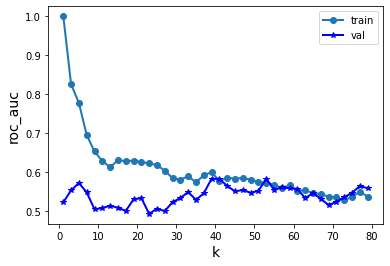

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.582
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 39)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_std_train, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_std_test)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[ 8 15]
 [ 7 11]]
El valor de f1_score obtenido: 0.5
El valor de recall es 0.6111111111111112


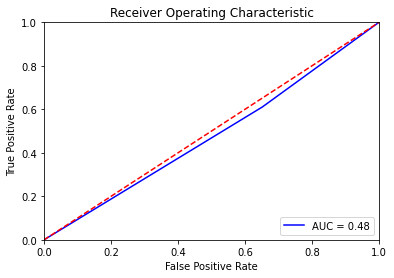

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_output_knn2)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_output_knn2)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_output_knn2, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_output_knn2)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 8 15]
 [ 7 11]]
tn: 8, fp:15, fn:7, tp:11
Accuracy: 0.4634146341463415
                  precision    recall  f1-score   support

Paciente control       0.53      0.35      0.42        23
   Paciente caso       0.42      0.61      0.50        18

        accuracy                           0.46        41
       macro avg       0.48      0.48      0.46        41
    weighted avg       0.48      0.46      0.46        41

Sensibilidad: 0.6111111111111112


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,20)}
  profundidad_grid = np.array(range(1,20))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 1}


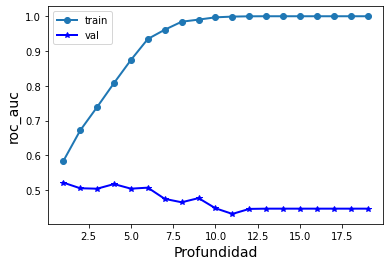

Mejor valor de la figura de mérito en validación cruzada: 0.522
Mejor valor del hiperparámetro: {'max_depth': 1}


In [ ]:
arbol('roc_auc')

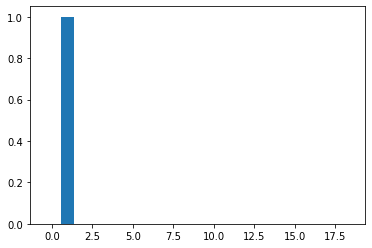

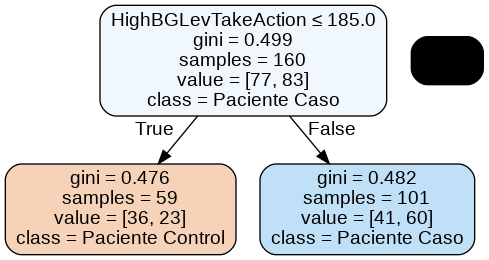

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=1)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[1:],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de recall es 0.5


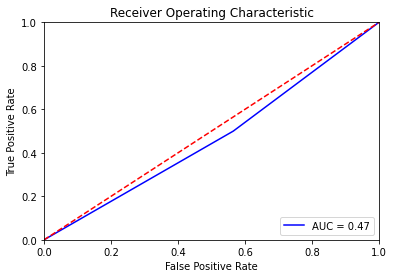

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
from sklearn.svm import SVC


In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_std_train, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.001, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606


In [ ]:


svc=SVC(C=50,kernel='poly',gamma=0.001,decision_function_shape='ovo')
svc.fit(X_std_train,Y_train)
y_test_pred=svc.predict(X_std_test)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


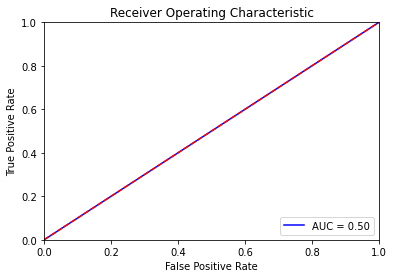

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística", "Knn","Árbol","SVC"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                    
Regresión logística  0.463415  0.500000  0.450000  0.467391
Knn                  0.463415  0.611111  0.500000  0.479469
Árbol                0.463415  0.500000  0.450000  0.467391
SVC                  0.439024  1.000000  0.610169  0.500000

# ***Sustitución de valores nan de variables numéricas a partir de su media***

In [ ]:
media=X_train["PtCurrA1cGoal"].mean()
print(media)

68.62420382165605


In [ ]:
X_train["PtCurrA1cGoal"].replace(np.nan, media, inplace=True)
X_test["PtCurrA1cGoal"].replace(np.nan, media, inplace=True)


In [ ]:
X_train["BBGAttitudeScaleCompEnroll"].replace(np.nan, X_train["BBGAttitudeScaleCompEnroll"].mean(), inplace=True)
X_test["BBGAttitudeScaleCompEnroll"].replace(np.nan, X_train["BBGAttitudeScaleCompEnroll"].mean(), inplace=True)

X_train["HighBGLevTakeAction"].replace(np.nan, X_train["HighBGLevTakeAction"].mean(), inplace=True)
X_test["HighBGLevTakeAction"].replace(np.nan, X_train["HighBGLevTakeAction"].mean(), inplace=True)

X_train["LowBGLevTakeAction"].replace(np.nan, X_train["LowBGLevTakeAction"].mean(), inplace=True)
X_test["LowBGLevTakeAction"].replace(np.nan, X_train["LowBGLevTakeAction"].mean(), inplace=True)

In [ ]:
X_train.isna().sum()

BBGAttitudeScaleNotDone             0
BBGAttitudeScaleCompEnroll          0
HighBGLevTakeAction                 0
LowBGLevTakeAction                  0
PtCurrA1cGoal                       0
DealHypoEp_Agree                    0
DealHypoEp_Disagree                 0
DealHypoEp_Neutral                  0
DealHypoEp_Strongly agree           0
DealHypoEp_Strongly disagree        0
UndertreatHypo_Agree                0
UndertreatHypo_Disagree             0
UndertreatHypo_Neutral              0
UndertreatHypo_Strongly agree       0
UndertreatHypo_Strongly disagree    0
HighBGDamage_Agree                  0
HighBGDamage_Disagree               0
HighBGDamage_Neutral                0
HighBGDamage_Strongly agree         0
HighBGDamage_Strongly disagree      0
FreqHypoDamage_Agree                0
FreqHypoDamage_Disagree             0
FreqHypoDamage_Neutral              0
FreqHypoDamage_Strongly agree       0
FreqHypoDamage_Strongly disagree    0
DangersHighBG_Agree                 0
DangersHighB

In [ ]:
X_test.isna().sum()

BBGAttitudeScaleNotDone             0
BBGAttitudeScaleCompEnroll          0
HighBGLevTakeAction                 0
LowBGLevTakeAction                  0
PtCurrA1cGoal                       0
DealHypoEp_Agree                    0
DealHypoEp_Disagree                 0
DealHypoEp_Neutral                  0
DealHypoEp_Strongly agree           0
DealHypoEp_Strongly disagree        0
UndertreatHypo_Agree                0
UndertreatHypo_Disagree             0
UndertreatHypo_Neutral              0
UndertreatHypo_Strongly agree       0
UndertreatHypo_Strongly disagree    0
HighBGDamage_Agree                  0
HighBGDamage_Disagree               0
HighBGDamage_Neutral                0
HighBGDamage_Strongly agree         0
HighBGDamage_Strongly disagree      0
FreqHypoDamage_Agree                0
FreqHypoDamage_Disagree             0
FreqHypoDamage_Neutral              0
FreqHypoDamage_Strongly agree       0
FreqHypoDamage_Strongly disagree    0
DangersHighBG_Agree                 0
DangersHighB

In [ ]:
# import pandas as pd
# from scipy import stats

# for i in X_train:
#   try:
#     z_scores1 = stats.zscore(X_train[i])
#     abs_z_scores1 = np.abs(z_scores1)
#     outliers1 = (abs_z_scores1 > 2)
#     X_train[i] = X_train[i].where(~(outliers1), X_train[i].mean())

#     # z_scores2 = stats.zscore(X_test[i])
#     # abs_z_scores2 = np.abs(z_scores2)
#     # outliers2 = (abs_z_scores2 > 2)
#     # X_test[i] = X_test[i].where(~(outliers2), X_train[i].mean())

#   except:
#     print(i, ": No existen outliers")

# for i in X_test:
#   try:
#     # z_scores1 = stats.zscore(X_train[i])
#     # abs_z_scores1 = np.abs(z_scores1)
#     # outliers1 = (abs_z_scores1 > 2)
#     # X_train[i] = X_train[i].where(~(outliers1), X_train[i].mean())

#     z_scores2 = stats.zscore(X_test[i])
#     abs_z_scores2 = np.abs(z_scores2)
#     outliers2 = (abs_z_scores2 > 2)
#     X_test[i] = X_test[i].where(~(outliers2), X_train[i].mean())

#   except:
#     print(i, ": No existen outliers")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


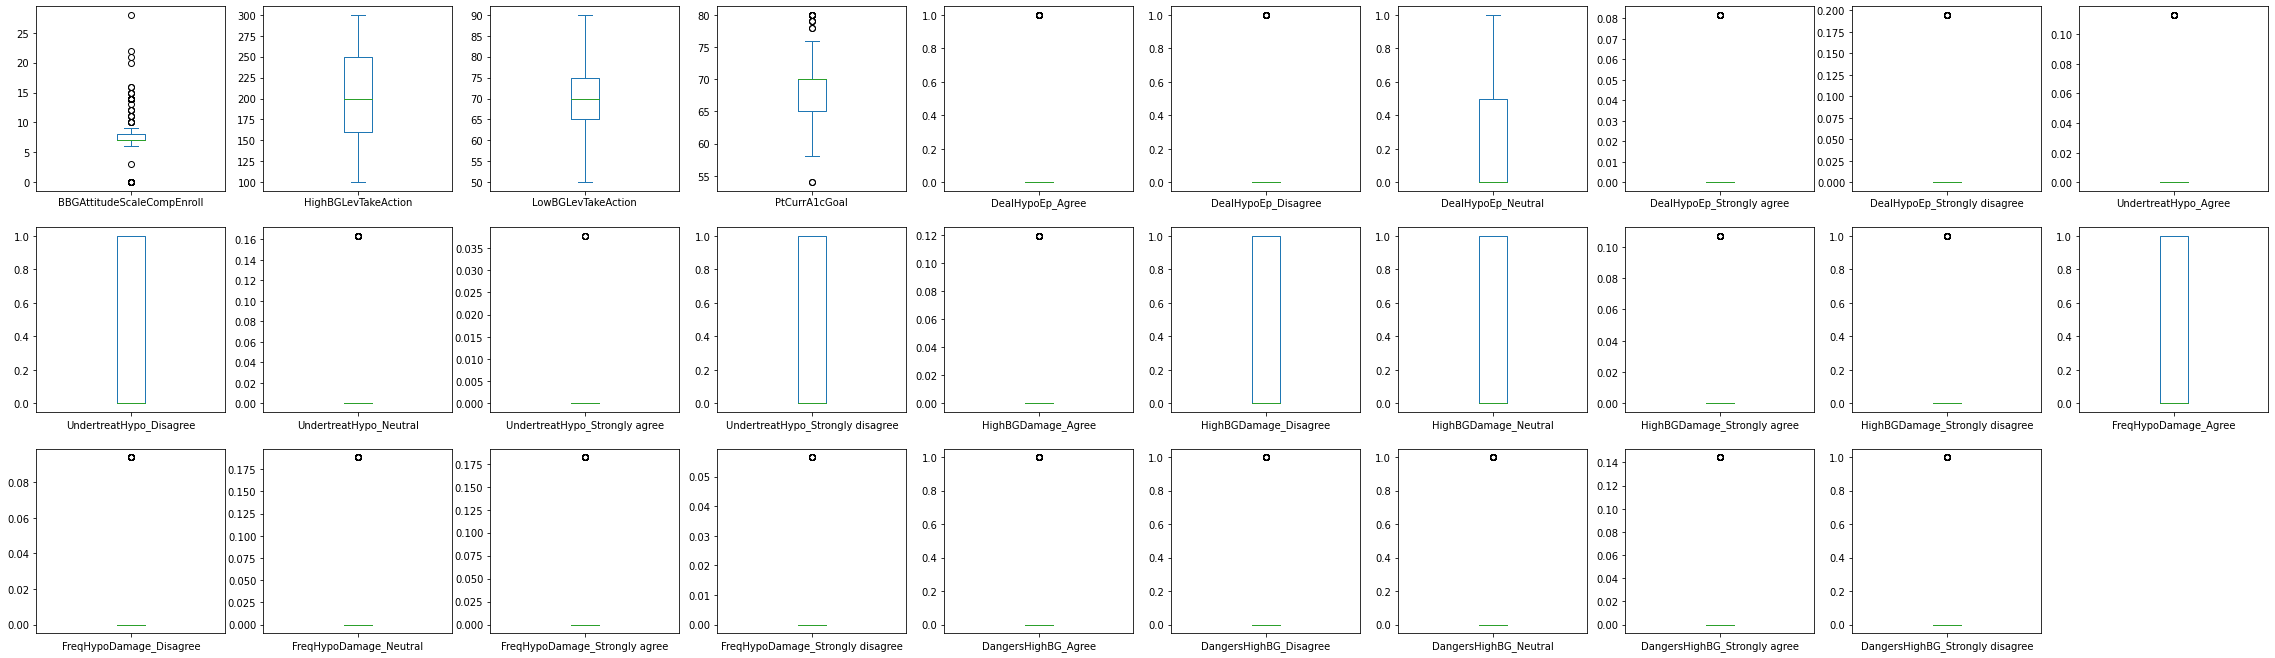

In [ ]:
# X_train.plot(kind='box',subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(40,40))
# plt.show()

De esta manera, hemos calculado la media del conjunto de train para esa variable y se aplica tanto al conjunto de train como al conjunto de test.

A continuación, estadarizamos el conjunto de train y test:

In [ ]:
# Normalizamos las variables


from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


std_all = preprocessing.StandardScaler().fit(X_train)
X_std_train = std_all.transform(X_train) #Tendriamos todas las características estandarizadas
X_std_test = std_all.transform(X_test)

# ***Clasificación***

# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_std_train, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_std_train, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_std_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[11 12]
 [ 8 10]]
tn: 11, fp:12, fn:8, tp:10
Accuracy: 0.5121951219512195
                  precision    recall  f1-score   support

Paciente control       0.58      0.48      0.52        23
   Paciente caso       0.45      0.56      0.50        18

        accuracy                           0.51        41
       macro avg       0.52      0.52      0.51        41
    weighted avg       0.52      0.51      0.51        41

Sensibilidad: 0.5555555555555556


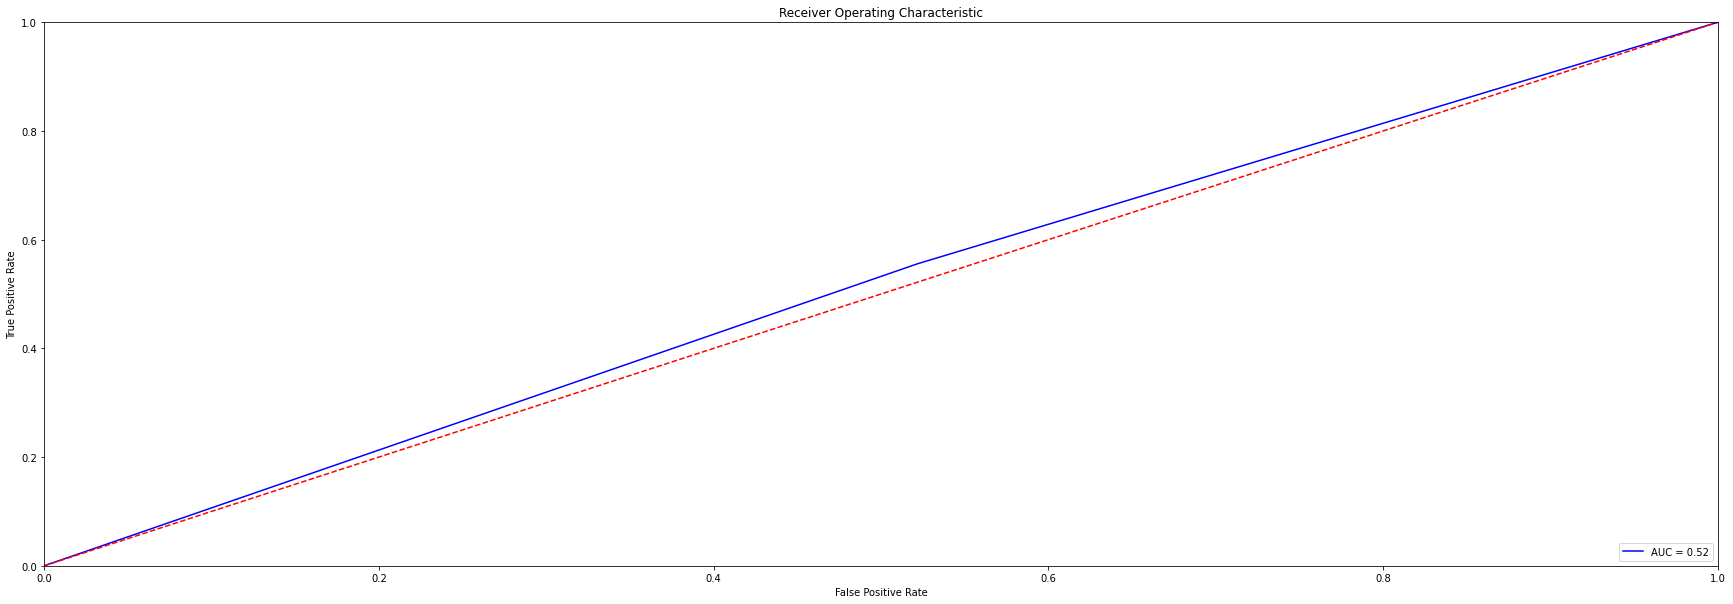

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Lo hace completamente de forma aleatoria

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_std_train, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

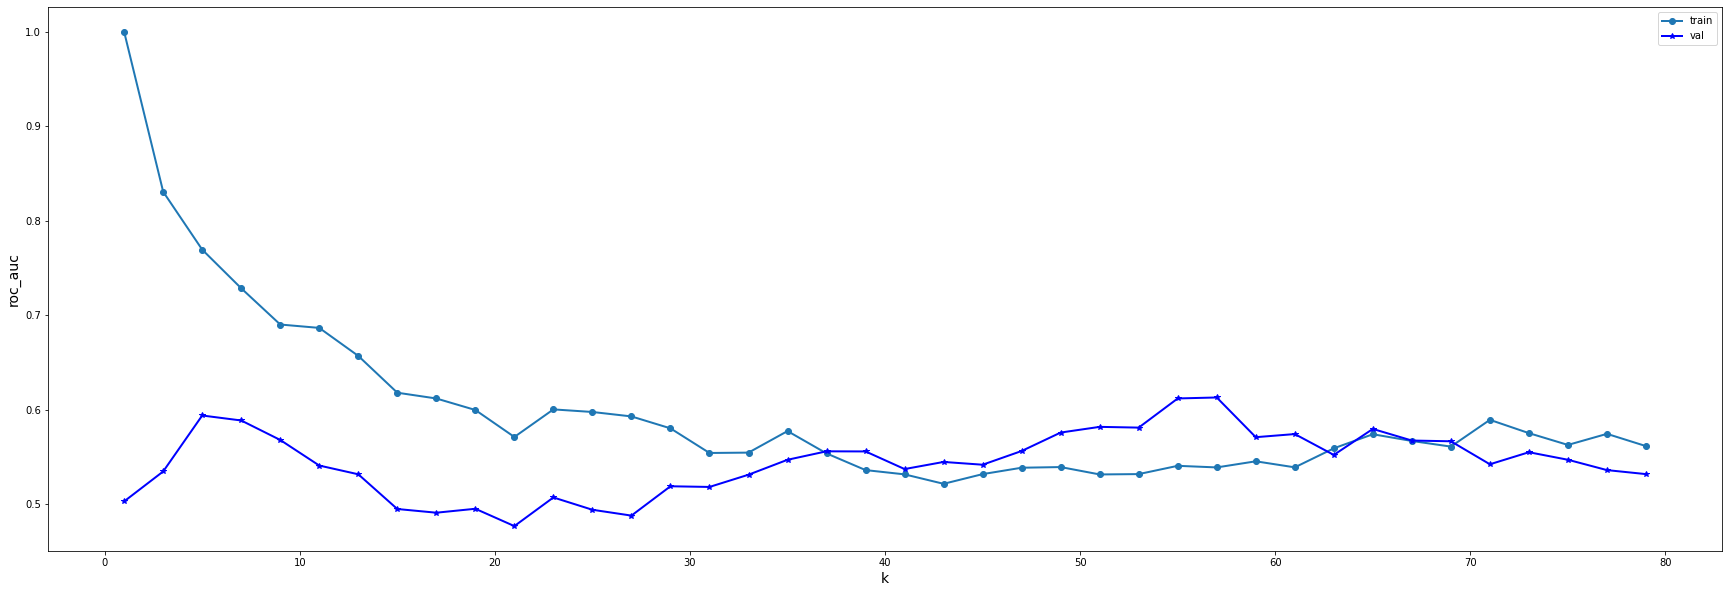

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
Valor correspondiente para el hiperparámetro: {'n_neighbors': 57}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 57)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_std_train, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_std_test)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5609756097560976
La matriz de confusión obtenida: [[10 13]
 [ 5 13]]
El valor de f1_score obtenido: 0.5909090909090908
El valor de recall es 0.7222222222222222


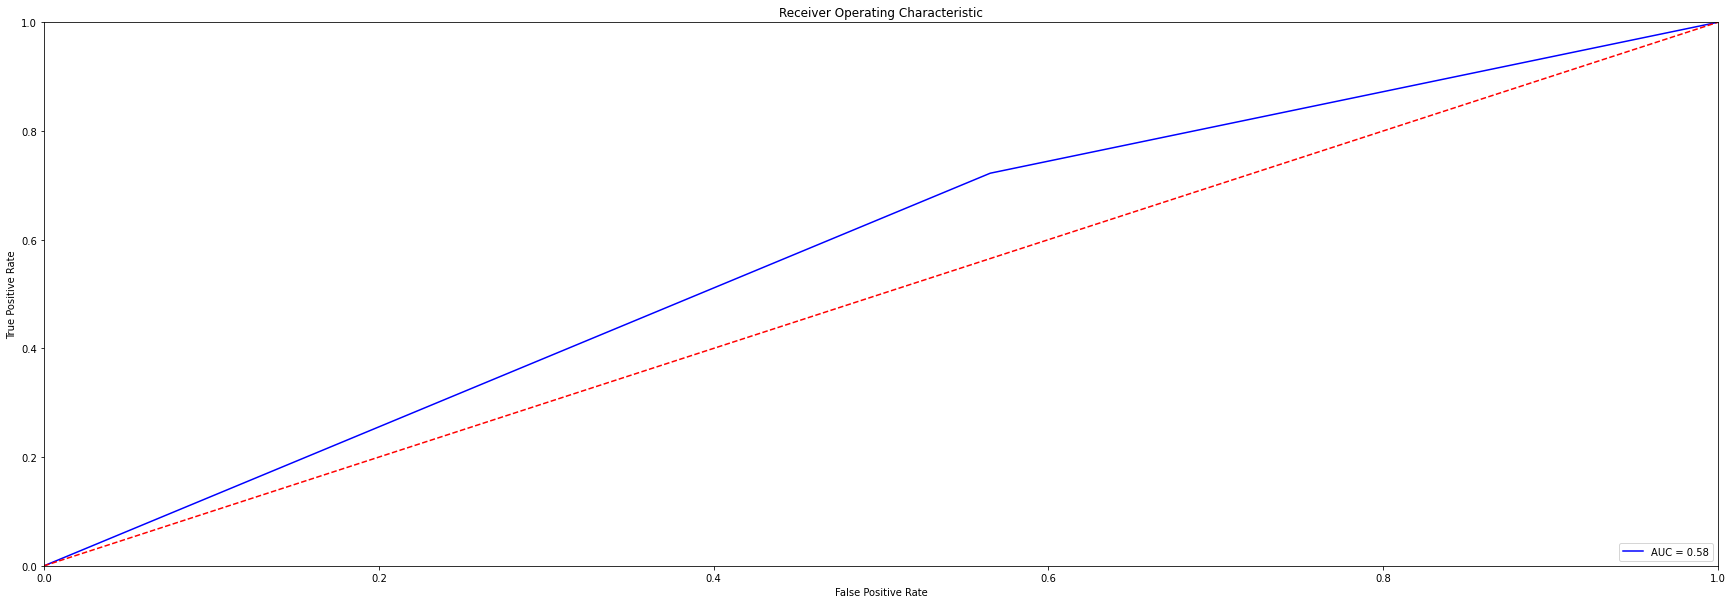

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,31)}
  profundidad_grid = np.array(range(1,31))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


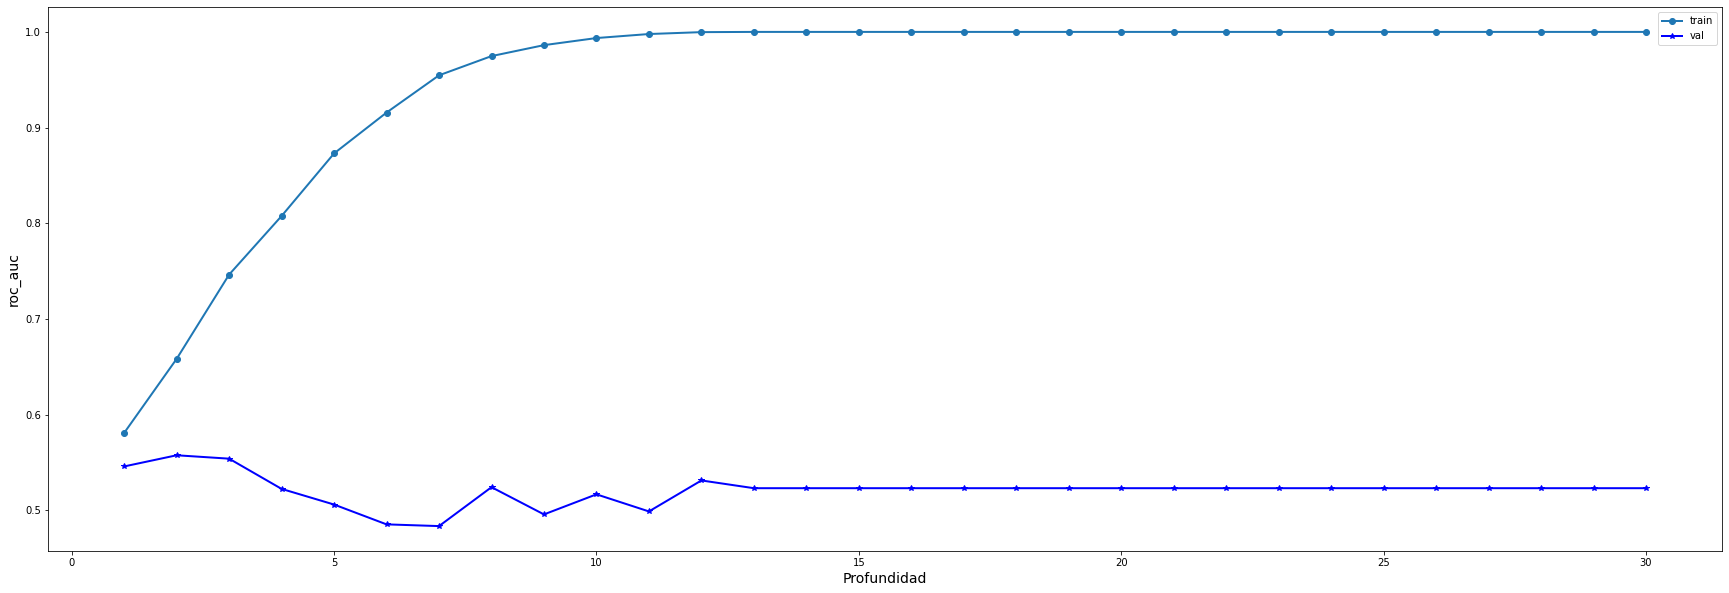

Mejor valor de la figura de mérito en validación cruzada: 0.558
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

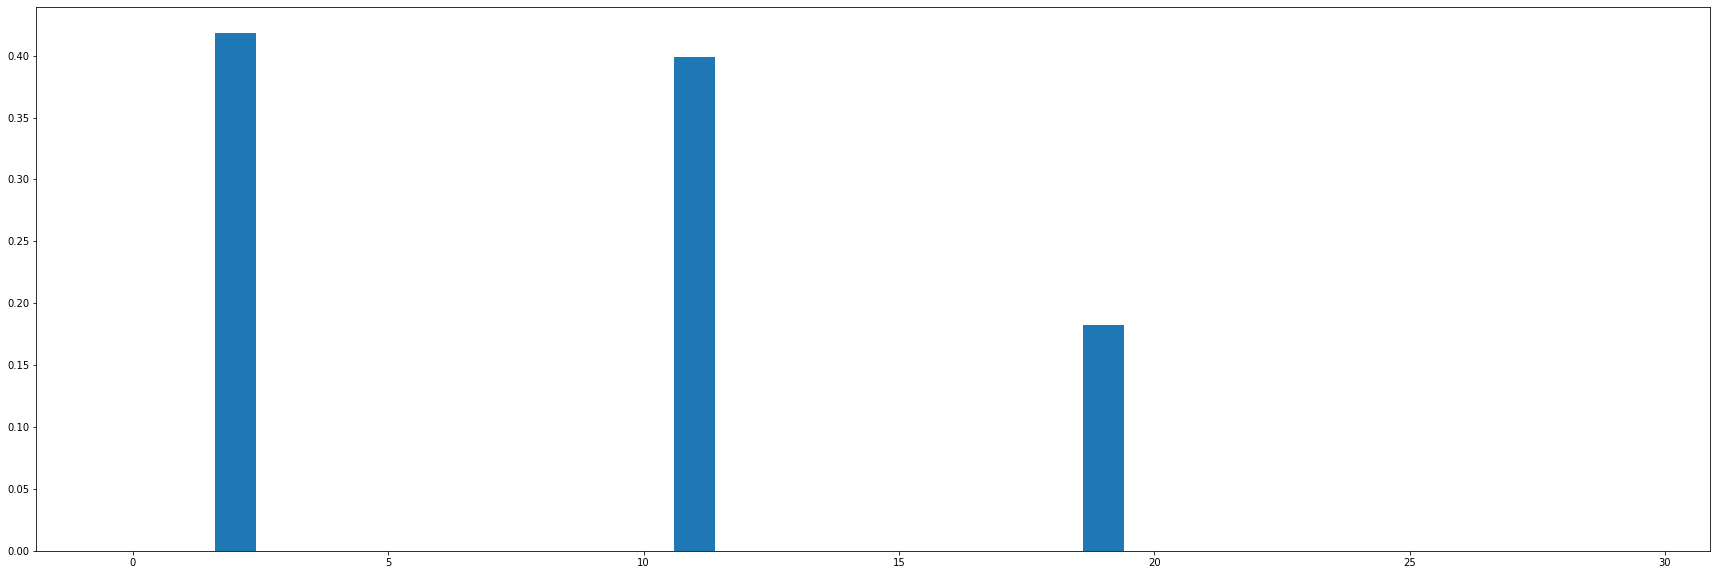

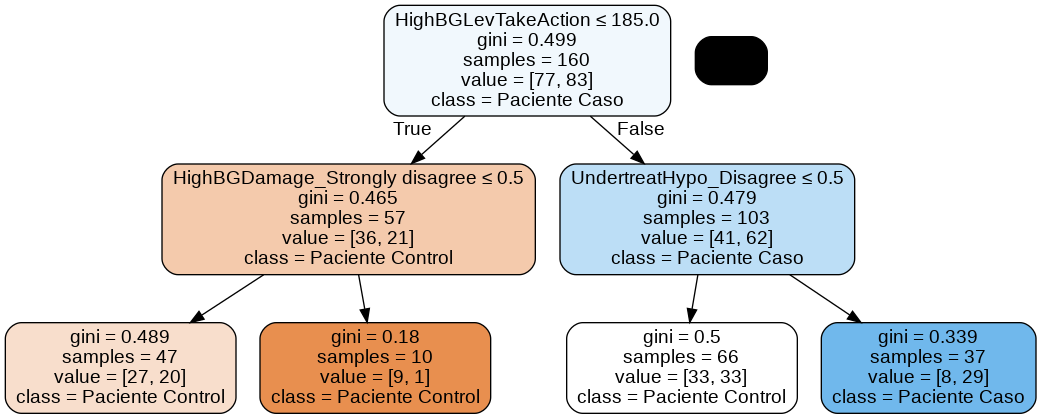

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[1:],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.5853658536585366
La matriz de confusión obtenida: [[18  5]
 [12  6]]
El valor de f1_score obtenido: 0.41379310344827586
El valor de sensibilidad es 0.3333333333333333


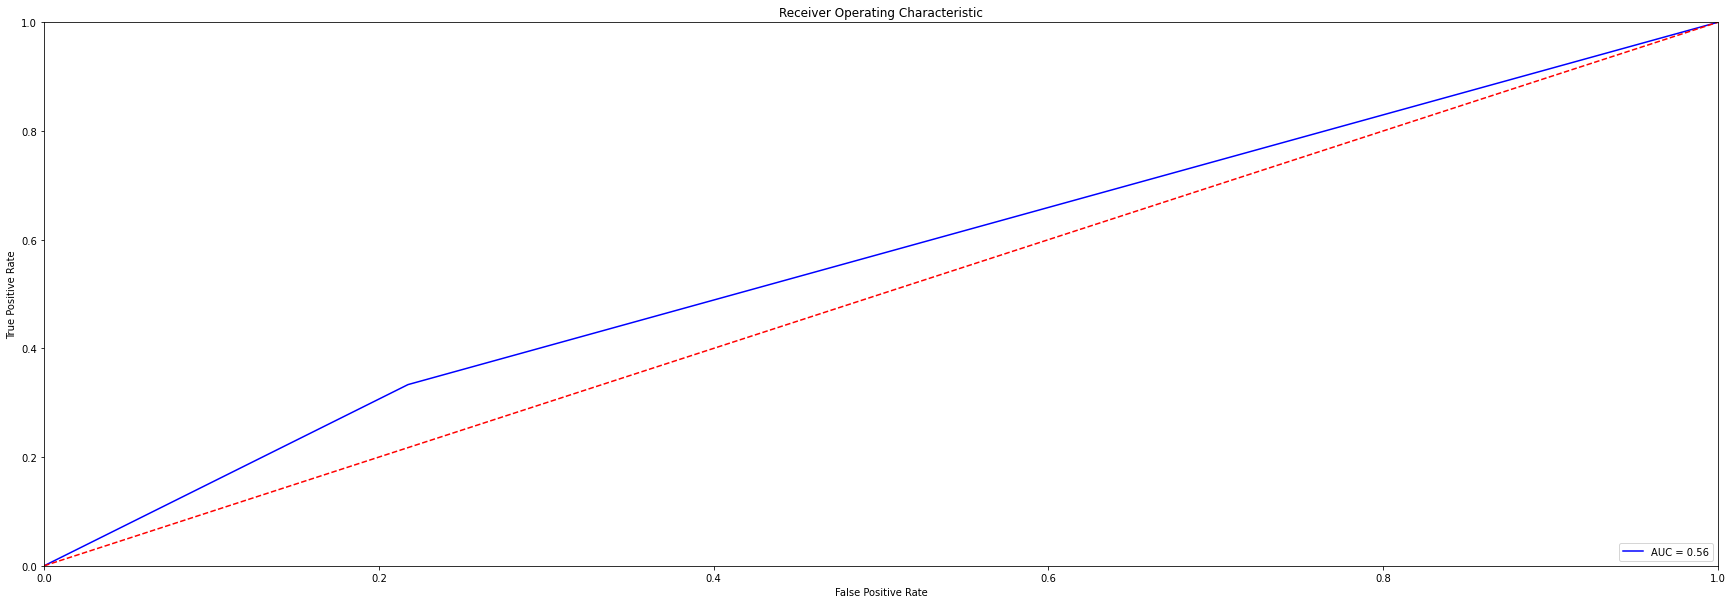

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ***Selección de características***

# ***Métodos *embedded****

Ranking de Características:
1. Característica 1 (0.149814)
2. Característica 3 (0.140619)
3. Característica 2 (0.136990)
4. Característica 0 (0.126603)
5. Característica 4 (0.039546)
6. Característica 8 (0.036625)
7. Característica 16 (0.035379)
8. Característica 9 (0.034478)
9. Característica 18 (0.034339)
10. Característica 17 (0.033848)
11. Característica 11 (0.033738)
12. Característica 12 (0.032253)
13. Característica 13 (0.030200)
14. Característica 10 (0.028058)
15. Característica 6 (0.027931)
16. Característica 5 (0.023305)
17. Característica 15 (0.021261)
18. Característica 7 (0.019314)
19. Característica 14 (0.015698)


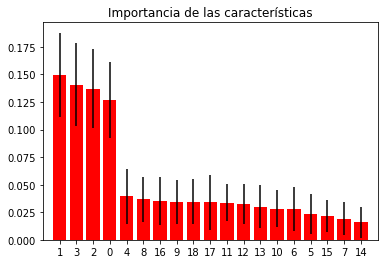

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_std_all, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_std_all.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_std_all.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_std_all.shape[1]), indices)
plt.xlim([-1, X_train_std_all.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

In [ ]:
X_train.head()

AttributeError: ignored

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_emb = X_train_std_all[:,[0,1,2,3]]
X_test_emb = X_test_std_all[:,[0,1,2,3]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_emb, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.510


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_emb, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_emb)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[13 10]
 [ 7 11]]
tn: 13, fp:10, fn:7, tp:11
Accuracy: 0.5853658536585366
                  precision    recall  f1-score   support

Paciente control       0.65      0.57      0.60        23
   Paciente caso       0.52      0.61      0.56        18

        accuracy                           0.59        41
       macro avg       0.59      0.59      0.58        41
    weighted avg       0.59      0.59      0.59        41

Sensibilidad: 0.6111111111111112


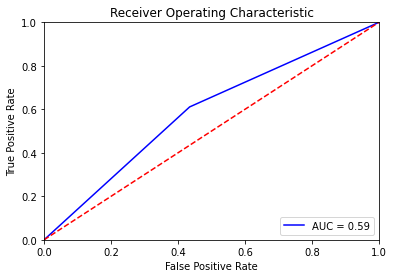

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy=[]
res_recall=[]
res_f1=[]
res_roc=[]

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5853658536585366
La matriz de confusión obtenida: [[13 10]
 [ 7 11]]
El valor de f1_score obtenido: 0.5641025641025642
El valor de recall es 0.6111111111111112


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_emb, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

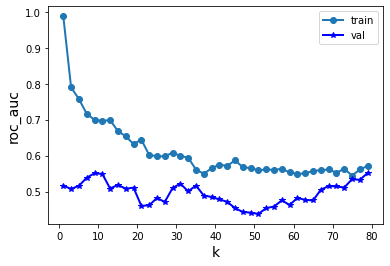

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.552
Valor correspondiente para el hiperparámetro: {'n_neighbors': 79}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 79)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_emb, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_emb)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5609756097560976
La matriz de confusión obtenida: [[15  8]
 [10  8]]
El valor de f1_score obtenido: 0.47058823529411764
El valor de recall es 0.4444444444444444


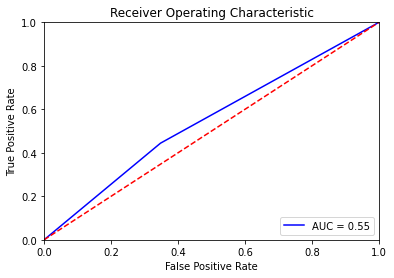

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5609756097560976
La matriz de confusión obtenida: [[15  8]
 [10  8]]
El valor de f1_score obtenido: 0.47058823529411764
El valor de recall es 0.4444444444444444


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,5)}
  profundidad_grid = np.array(range(1,5))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_emb, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 1}


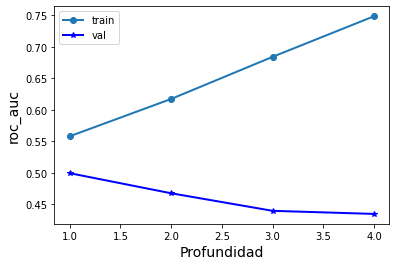

Mejor valor de la figura de mérito en validación cruzada: 0.499
Mejor valor del hiperparámetro: {'max_depth': 1}


In [ ]:
arbol('roc_auc')

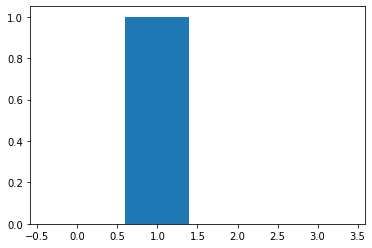

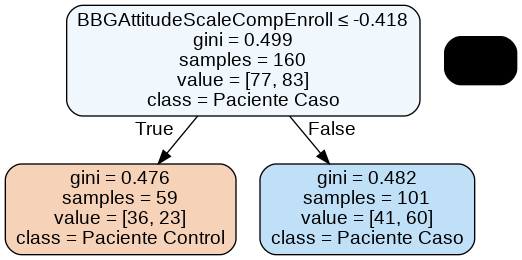

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=1)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_emb, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_emb)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[0,1,2,3]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de sensibilidad es 0.5


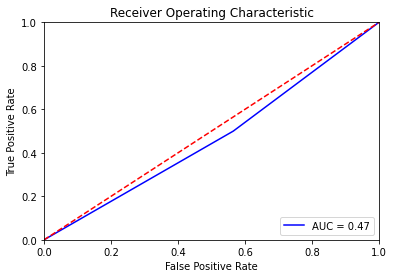

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test_0, y_output_arbol)
f11_score = f1_score(Y_test_0, y_output_arbol)
r1_score = recall_score(Y_test_0, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test_0, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[ 9 11]
 [10 11]]
El valor de f1_score obtenido: 0.5116279069767442
El valor de recall es 0.5238095238095238


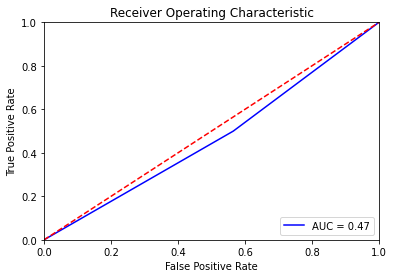

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_emb, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.560


In [ ]:


svc=SVC(C=100,kernel='rbf',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_emb,Y_train)
y_test_pred=svc.predict(X_test_emb)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[13 10]
 [11  7]]
El valor de f1_score obtenido: 0.39999999999999997
El valor de recall es 0.3888888888888889


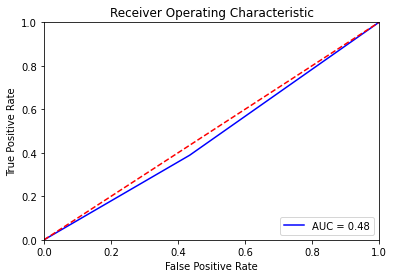

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***Método filter***

A continuación, a partir de validación cruzada con 3 folds, obtenemos el fold1, fold2 y fold3:

In [ ]:
# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
# # array = data.values
# X_train=np.array(X_train)
# X_text=np.array(X_test)
# Y_train=(np.array(Y_train))
# Y_test=np.array(Y_test)
# # Separamos en variables de entrada al modelo (8 primeras) y de salida (1 variable) 
# X = array[:,1:59]
# Y = array[:,0]

names=[]
for i in range(20):
  names.append(str(i))
# names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11','f12','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13']
# names = data.columns[1:]
names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19']

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  # In this case, k=3, 

for train, val in kf.split(X_train_std_all):
  # print("%s %s" % (train, val))
  # print(len(val))
  # print(val)
  if (len(val)==53) and (val[0]==107):
    fold3=list(val)
    print(len(fold3))
    print(fold3)
  if (len(val)==54):
    fold1=list(val)
    print(len(fold1))
    print(fold1)
  if (len(val)==53) and (val[0]==54):
    fold2=list(val)
    print(len(fold2))
    print(fold2)

54
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
53
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]
53
[107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


# ***COMBINACIÓN PRIMERA***


En esta primera combinación utilizaremos fold1 y fold2 para entrenar, y fold3 para validar:

In [ ]:
X_entrenamiento=np.concatenate((X_train_std_all[fold1], X_train_std_all[fold2]))
Y_entrenamiento=np.concatenate((Y_train[fold1], Y_train[fold2]))
X_val=X_train_std_all[fold3]
Y_val=Y_train[fold3]

KeyError: ignored

Text(0.5, 1.0, 'Chi2 considerando subconjunto X train')

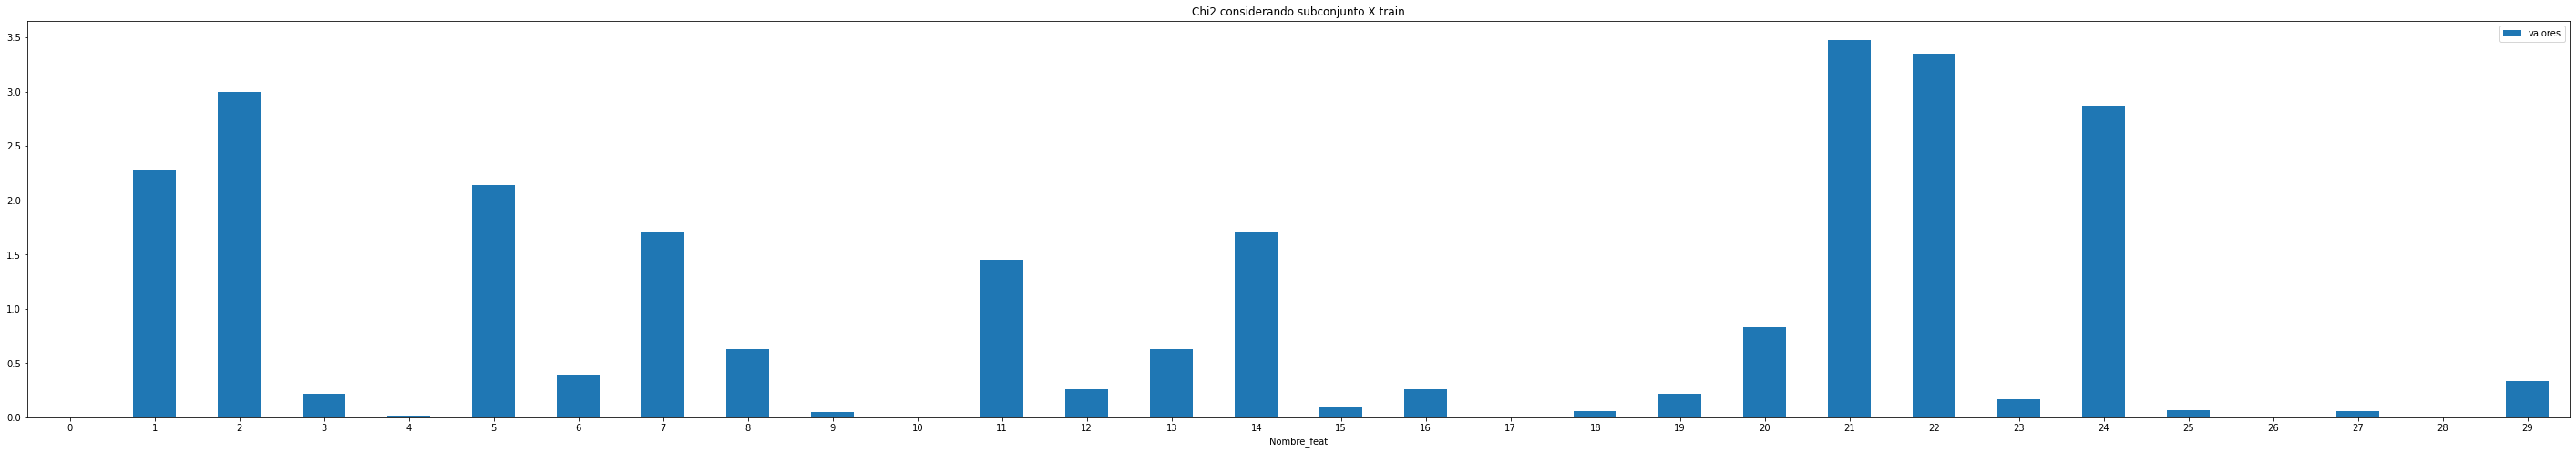

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=chi2, k=30)
fit_Chi2 = bestfeatures_Chi2.fit(X_entrenamiento, Y_entrenamiento)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
# df, ax = plt.subplots(figsize=(50, 8))
plt.title("Chi2 considerando subconjunto X train")

In [ ]:
X_val=X_val[:, [1,2,21,22,24]] 
print(len(X_val), len(Y_val))

53 53


In [ ]:
X_entrenamiento=X_entrenamiento[:, [1,2,21,22,24]]

Ahora con esas características elegidas, entrenaremos nuestro modelo knn y además también haremos validación para así obtener el mejor valor de k a partir de una figura de mérico que en este caso será el accuracy:

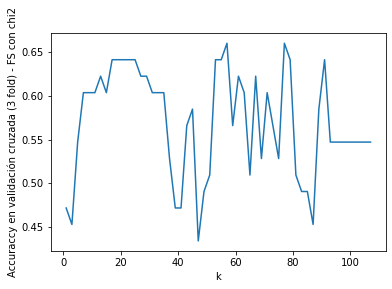

0.5471698113207547


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
k_range = range(1, 109, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entrenamiento, Y_entrenamiento)
    scores.append(knn.score(X_val, Y_val))
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val, Y_val))

El valor de k será 11, ya que es dónde mayor accuracy obtenemos, y además se empieza a estabilizar

# ***COMBINACIÓN 2***

En esta combinación usaremos fold1 y fold3 para entrenar y usaremos fold 2 para validar:

In [ ]:
X_entrenamiento2=np.concatenate((X_train[fold1], X_train[fold3]))
Y_entrenamiento2=np.concatenate((Y_train[fold1], Y_train[fold3]))
X_val2=X_train[fold2]
Y_val2=Y_train[fold2]

Text(0.5, 1.0, 'Estadístico chi cuadrado considerando subconjunto X train')

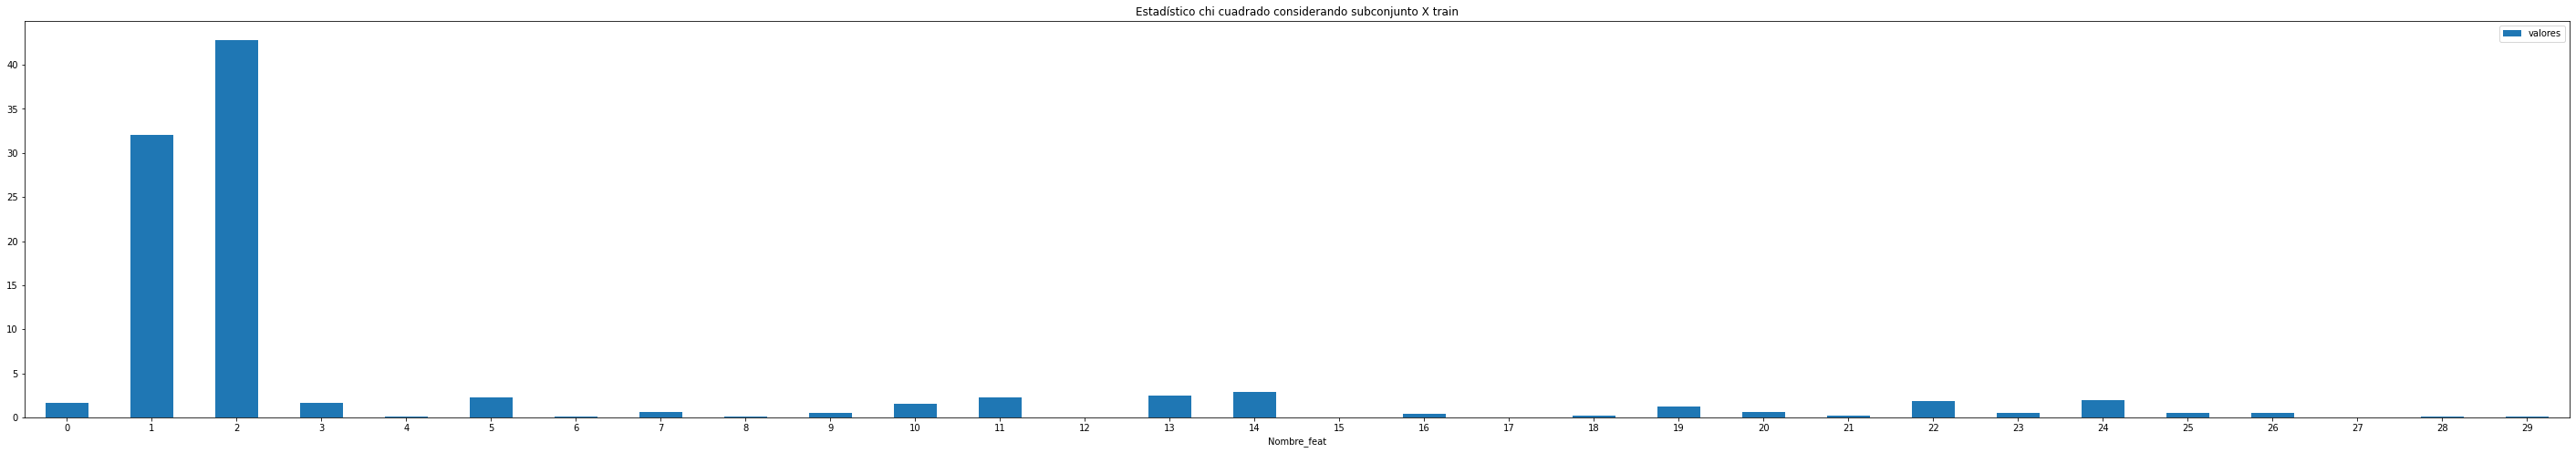

In [ ]:
bestfeatures_Chi2_2 = SelectKBest(score_func=chi2, k=30)
fit_Chi2_2 = bestfeatures_Chi2_2.fit(X_entrenamiento2, Y_entrenamiento2)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0,figsize=(50,8))
plt.title("Estadístico chi cuadrado considerando subconjunto X train")

Escogemos de nuestra X de validación y de nuestra X de train únicamente las características:

In [ ]:
X_val2=X_val2[:, [1,2]] 
X_entrenamiento2=X_entrenamiento2[:, [1,2]]

Ahora igual que antes, entrenamos nuestro modelo knn y elegimos el valor de k a partir de validación:

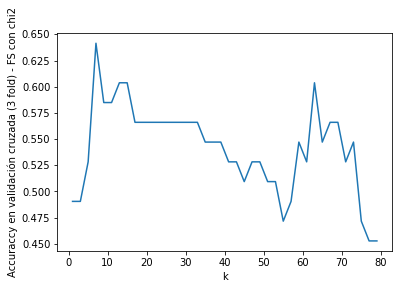

0.4528301886792453


In [ ]:
k_range = range(1, 81, 2)
scores2 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_entrenamiento2, Y_entrenamiento2)
    scores2.append(knn.score(X_val2, Y_val2))
plt.plot(k_range, scores2)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val2, Y_val2))

Vemos que el mayor valor de accuracy es de 0.675 y elegiríamos un valor de k de aproximadamente 27

# ***COMBINACIÓN 3***

En este último caso, utilizaremos el fold 2 y fold3 para entrenar y el fold 1 para validar:

In [ ]:
X_entrenamiento3=np.concatenate((X_train[fold2], X_train[fold3]))
Y_entrenamiento3=np.concatenate((Y_train[fold2], Y_train[fold3]))
X_val3=X_train[fold1]
Y_val3=Y_train[fold1]

Text(0.5, 1.0, 'Estadístico chi cuadrado considerando subconjunto X train')

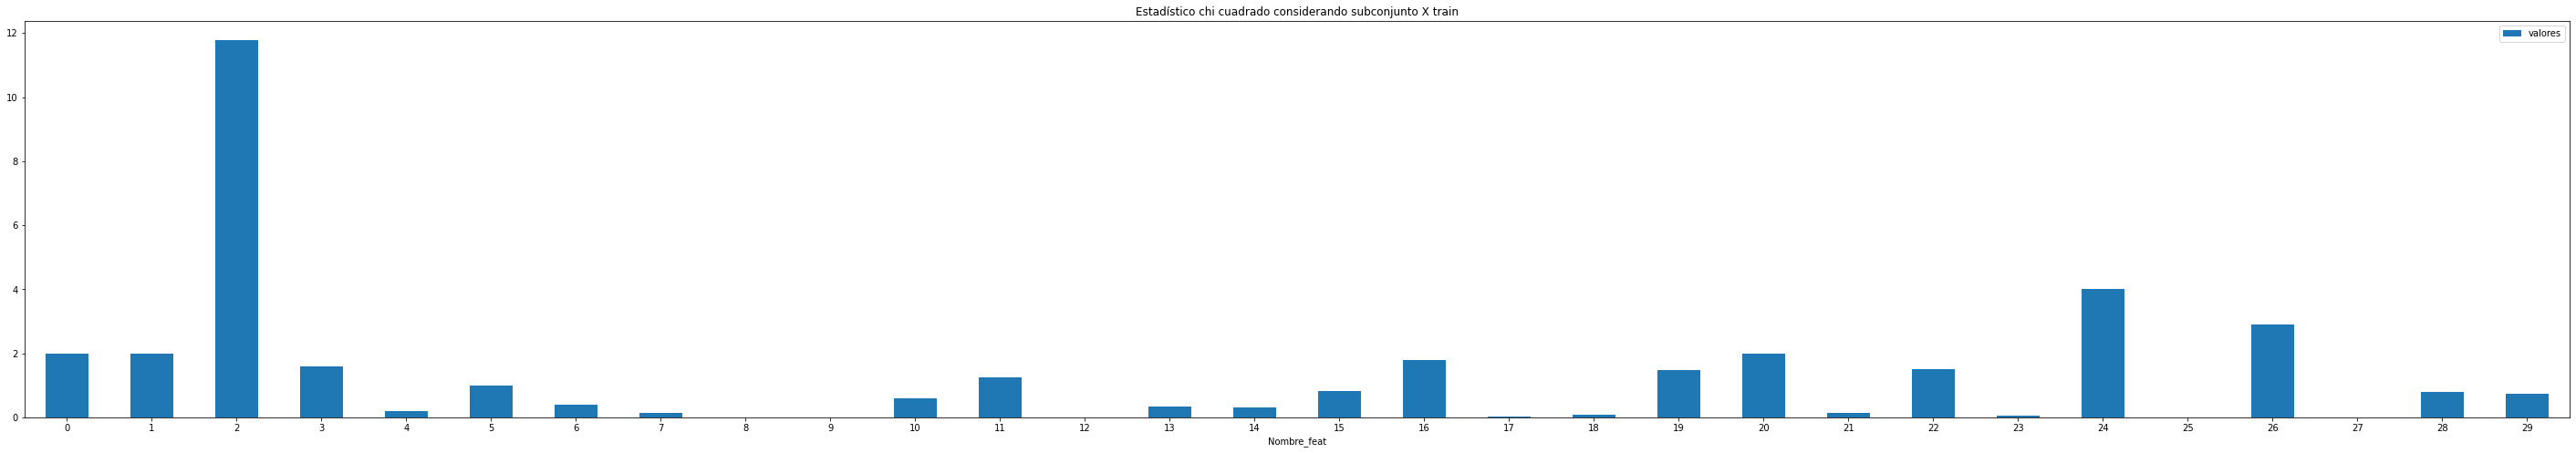

In [ ]:
bestfeatures_Chi2_3 = SelectKBest(score_func=chi2, k=30)
fit_Chi2_3 = bestfeatures_Chi2_3.fit(X_entrenamiento3, Y_entrenamiento3)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_3.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
plt.title("Estadístico chi cuadrado considerando subconjunto X train")

En esta ocasión, elegiremos como mejores características, de nuevo f6, pero en este caso, en vez de f11 elegiremos f2.

A continuación, elegimos esas dos características en nuestros conjuntos de X de entrenamiento y la X de validación:

In [ ]:
X_val3=X_val3[:, [2]] 
X_entrenamiento3=X_entrenamiento3[:, [2]]

Ahora construimos nuestro modelo knn y lo entrenamos y elegiremos el valor de k a partir de validación cruzada:

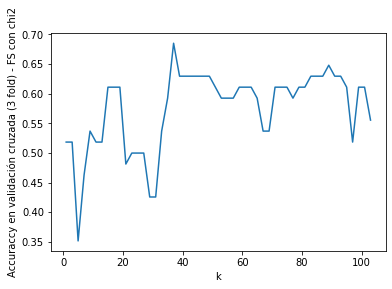

0.5555555555555556


In [ ]:
k_range = range(1, 105, 2)
scores3 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entrenamiento3, Y_entrenamiento3)
    scores3.append(knn.score(X_val3, Y_val3))
plt.plot(k_range, scores3)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val3, Y_val3))

Obtenemos un valor de accuracy en 0.65 en validación eligiendo un valor de k de aproximadamente 40.

Una vez hechas todas las combinaciones posibles, vemos que la característica f6 aparece en las 3 combinaciones, por lo que suponemos que será una característica relevante, y otra de las que aparece dos de las 3 veces es f11, por lo que también la elegiremos como caracterísitca relevante.

Una vez hecho esto, nuestra base de datos ya solo la utilizaremos con esas dos características y a continuación construiremos un modelo knn, y para elegir el valor de k realizaremos de nuevo validación cruzada, y posteriormente lo evaluaremos en nuestro conjunto independiente (test)

In [ ]:

X_train_filt = X_std_train[:,[1,2]]
X_test_filt = X_std_test[:,[1,2]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_filt, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.580


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_filt, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_filt)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[11 12]
 [ 9  9]]
tn: 11, fp:12, fn:9, tp:9
Accuracy: 0.4878048780487805
                  precision    recall  f1-score   support

Paciente control       0.55      0.48      0.51        23
   Paciente caso       0.43      0.50      0.46        18

        accuracy                           0.49        41
       macro avg       0.49      0.49      0.49        41
    weighted avg       0.50      0.49      0.49        41

Sensibilidad: 0.5


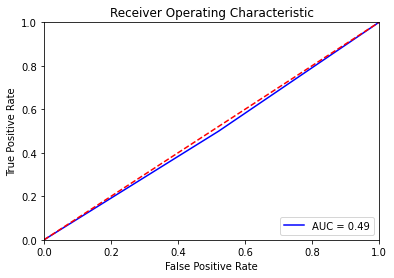

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[11 12]
 [ 9  9]]
El valor de f1_score obtenido: 0.4615384615384615
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_filt, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

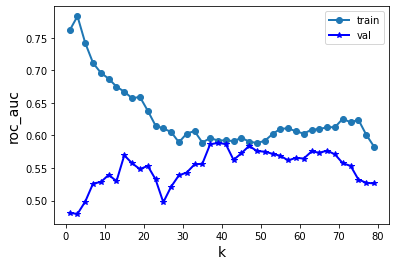

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.589
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 39)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_filt, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_filt)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de recall es 0.5


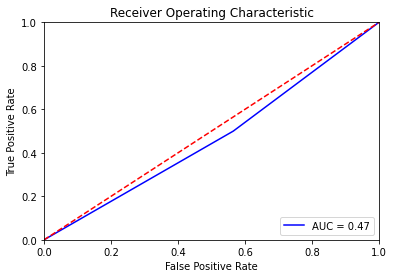

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,3)}
  profundidad_grid = np.array(range(1,3))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_filt, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 1}


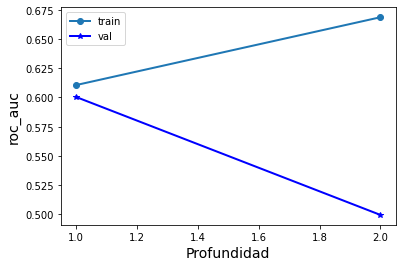

Mejor valor de la figura de mérito en validación cruzada: 0.600
Mejor valor del hiperparámetro: {'max_depth': 1}


In [ ]:
arbol('roc_auc')

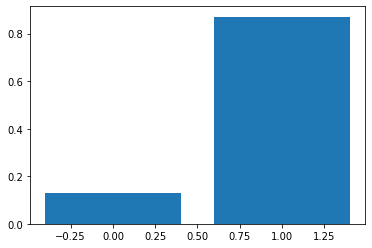

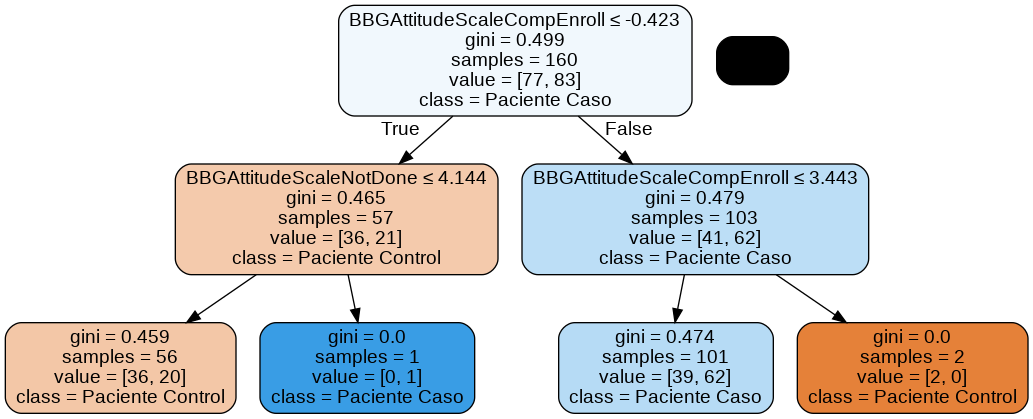

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_filt, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_filt)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[1,2]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de sensibilidad es 0.5


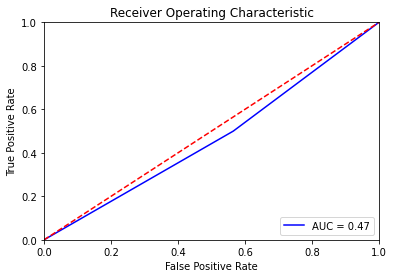

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de recall es 0.5


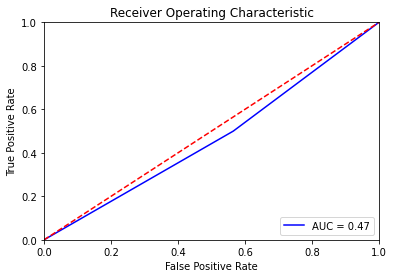

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_filt, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.610


In [ ]:


svc=SVC(C=0.1,kernel='rbf',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_filt,Y_train)
y_test_pred=svc.predict(X_test_filt)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


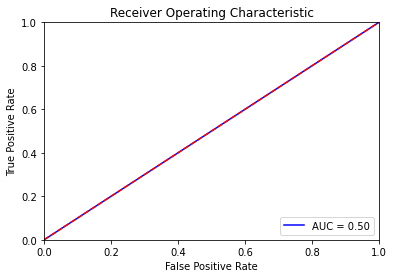

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Métodos wrapper con k-nn**

Con respecto al valor de k, elegiremos k=3, ya que es el valor obtenido al principio del proyecto con validación que nos daba mejores valores de figura de mérito.

# Sequential Forward Selection

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

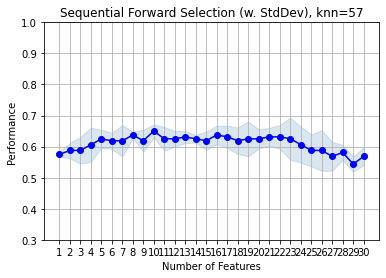

feature_idx  \
1                                               (11,)   
2                                            (11, 20)   
3                                         (5, 11, 20)   
4                                     (5, 11, 14, 20)   
5                                  (2, 5, 11, 14, 20)   
6                               (2, 5, 8, 11, 14, 20)   
7                            (2, 3, 5, 8, 11, 14, 20)   
8                        (2, 3, 5, 8, 11, 13, 14, 20)   
9                     (1, 2, 3, 5, 8, 11, 13, 14, 20)   
10                (1, 2, 3, 5, 8, 11, 13, 14, 20, 27)   
11             (0, 1, 2, 3, 5, 8, 11, 13, 14, 20, 27)   
12         (0, 1, 2, 3, 5, 8, 11, 13, 14, 20, 24, 27)   
13      (0, 1, 2, 3, 5, 8, 9, 11, 13, 14, 20, 24, 27)   
14  (0, 1, 2, 3, 5, 8, 9, 11, 13, 14, 17, 20, 24, 27)   
15  (0, 1, 2, 3, 5, 8, 9, 11, 13, 14, 17, 20, 24, ...   
16  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 20, ...   
17  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 20, ...   
18  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 19, ...   
19  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 19, ...   
20  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 15, 17, ...   
21  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 15, 17, ...   
22  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 15, 17, ...   
23  (0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 15, 16, ...   
24  (0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 13, 14, 15, 1...   
25  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15...   
26  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...   
27  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...   
28  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...   
29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.5740740740740741, 0.5660377358490566, 0.584...  0.575006   
2   [0.5740740740740741, 0.5660377358490566, 0.622...  0.587584   
3   [0.5370370370370371, 0.6415094339622641, 0.584...  0.587817   
4   [0.6481481481481481, 0.6415094339622641, 0.528...  0.605986   
5   [0.6666666666666666, 0.6037735849056604, 0.603...  0.624738   
6   [0.6481481481481481, 0.6226415094339622, 0.584...  0.618565   
7   [0.6481481481481481, 0.660377358490566, 0.5471...  0.618565   
8   [0.6481481481481481, 0.6415094339622641, 0.622...  0.637433   
9   [0.5740740740740741, 0.6226415094339622, 0.660...  0.619031   
10  [0.6296296296296297, 0.6415094339622641, 0.679...  0.650128   
11  [0.5925925925925926, 0.6037735849056604, 0.679...  0.625204   
12  [0.6111111111111112, 0.6037735849056604, 0.660...  0.625087   
13  [0.6481481481481481, 0.6037735849056604, 0.641...  0.631144   
14  [0.6111111111111112, 0.6226415094339622, 0.641...  0.625087   
15  [0.5925925925925926, 0.6037735849056604, 0.660...  0.618915   
16  [0.6111111111111112, 0.6226415094339622, 0.679...  0.637666   
17  [0.5925925925925926, 0.6792452830188679, 0.622...  0.631493   
18  [0.5925925925925926, 0.5849056603773585, 0.679...  0.618915   
19  [0.6481481481481481, 0.5471698113207547, 0.679...  0.624854   
20  [0.6296296296296297, 0.5849056603773585, 0.660...  0.624971   
21  [0.5925925925925926, 0.6415094339622641, 0.660...  0.631493   
22  [0.6296296296296297, 0.5849056603773585, 0.679...   0.63126   
23  [0.5555555555555556, 0.6037735849056604, 0.716...  0.625437   
24  [0.5370370370370371, 0.6037735849056604, 0.679...  0.606685   
25  [0.5555555555555556, 0.5471698113207547, 0.660...  0.587701   
26  [0.5555555555555556, 0.5283018867924528, 0.679...  0.587701   
27  [0.5740740740740741, 0.5094339622641509, 0.622...  0.568717   
28  [0.5925925925925926, 0.5471698113207547, 0.603...  0.581179   
29  [0.5555555555555556, 0.5094339622641509, 0.566...  0.543676   
30  [0.5925925925925926, 0.5283018867924528, 0.584...    0.5686   

                                        feature_names  ci_bound   std_dev  \
1                                               (11,)  0.017397  0.007731   
2                                         

In [ ]:
valor_k = 57
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=30, #Queremos llegar a 30 caracteristicas
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3)

sfs = sfs.fit(X_std_train, Y_train)

# Representar los resultados
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 1])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T


cogemos la combinación 8

Evaluamos nuestro modelo knn=3 con las características elegidas en nuestro conjunto de test:

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Según SFS, escogería f0, f1, f5 y f7 
X_train_norm_SFS = X_std_train[:,[2, 3, 5, 8, 11, 13, 14, 20]]
X_test_norm_SFS = X_std_test[:,[2, 3, 5, 8, 11, 13, 14, 20]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_norm_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.617


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_norm_SFS, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_norm_SFS)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 9 14]
 [ 6 12]]
tn: 9, fp:14, fn:6, tp:12
Accuracy: 0.5121951219512195
                  precision    recall  f1-score   support

Paciente control       0.60      0.39      0.47        23
   Paciente caso       0.46      0.67      0.55        18

        accuracy                           0.51        41
       macro avg       0.53      0.53      0.51        41
    weighted avg       0.54      0.51      0.51        41

Sensibilidad: 0.6666666666666666


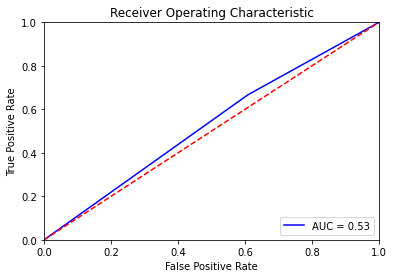

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 9 14]
 [ 6 12]]
El valor de f1_score obtenido: 0.5454545454545455
El valor de recall es 0.6666666666666666


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_norm_SFS, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

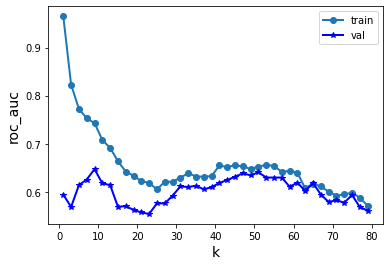

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.647
Valor correspondiente para el hiperparámetro: {'n_neighbors': 9}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 9)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_norm_SFS, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_norm_SFS)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[12 11]
 [ 8 10]]
El valor de f1_score obtenido: 0.5128205128205129
El valor de recall es 0.5555555555555556


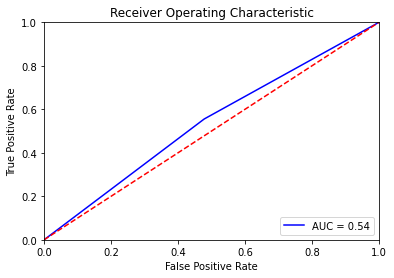

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[12 11]
 [ 8 10]]
El valor de f1_score obtenido: 0.5128205128205129
El valor de recall es 0.5555555555555556


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,9)}
  profundidad_grid = np.array(range(1,9))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_norm_SFS, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 4}


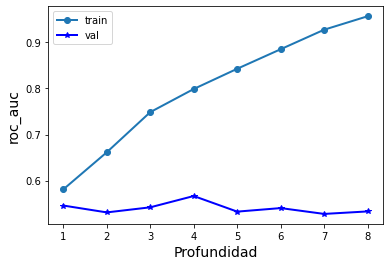

Mejor valor de la figura de mérito en validación cruzada: 0.567
Mejor valor del hiperparámetro: {'max_depth': 4}


In [ ]:
arbol('roc_auc')

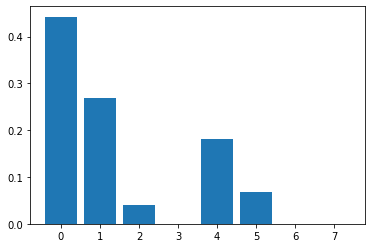

ValueError: ignored

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=4)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_norm_SFS, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_norm_SFS)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[1,2]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[15  8]
 [11  7]]
El valor de f1_score obtenido: 0.42424242424242425
El valor de sensibilidad es 0.3888888888888889


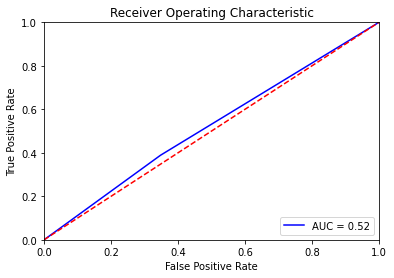

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[15  8]
 [11  7]]
El valor de f1_score obtenido: 0.42424242424242425
El valor de recall es 0.3888888888888889


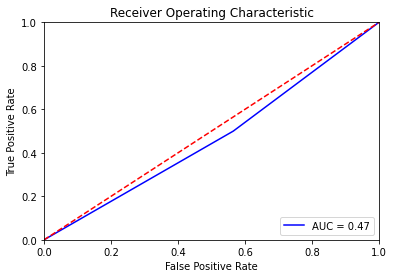

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_norm_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.648


In [ ]:


svc=SVC(C=1000,kernel='rbf',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_norm_SFS,Y_train)
y_test_pred=svc.predict(X_test_norm_SFS)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[14  9]
 [10  8]]
El valor de f1_score obtenido: 0.45714285714285713
El valor de recall es 0.4444444444444444


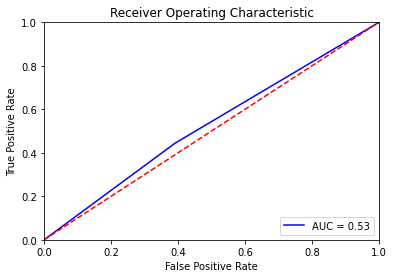

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# Sequential Backward Elimination

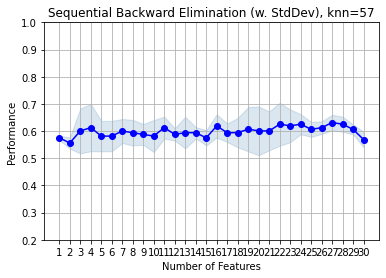

feature_idx  \
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
29  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
28  (0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...   
27  (1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, ...   
26  (1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16,...   
25  (1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16,...   
24  (1, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17...   
23  (1, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 18...   
22  (1, 3, 6, 7, 10, 11, 12, 13, 14, 15, 16, 18, 1...   
21  (1, 3, 6, 7, 10, 11, 12, 13, 14, 16, 18, 19, 2...   
20  (1, 3, 6, 7, 10, 11, 12, 13, 14, 16, 18, 19, 2...   
19  (1, 3, 6, 7, 11, 12, 13, 14, 16, 18, 19, 21, 2...   
18  (1, 3, 6, 7, 11, 12, 13, 14, 16, 18, 21, 22, 2...   
17  (1, 3, 6, 7, 11, 12, 13, 16, 18, 21, 22, 24, 2...   
16  (1, 3, 6, 7, 11, 12, 16, 18, 21, 22, 24, 25, 2...   
15  (1, 3, 6, 7, 11, 16, 18, 21, 22, 24, 25, 26, 2...   
14  (1, 3, 6, 7, 11, 16, 18, 21, 22, 24, 25, 27, 2...   
13  (3, 6, 7, 11, 16, 18, 21, 22, 24, 25, 27, 28, 29)   
12      (3, 6, 7, 11, 16, 21, 22, 24, 25, 27, 28, 29)   
11          (3, 6, 7, 11, 16, 21, 22, 25, 27, 28, 29)   
10             (6, 7, 11, 16, 21, 22, 25, 27, 28, 29)   
9                  (6, 7, 11, 16, 22, 25, 27, 28, 29)   
8                     (6, 11, 16, 22, 25, 27, 28, 29)   
7                        (11, 16, 22, 25, 27, 28, 29)   
6                            (11, 16, 22, 25, 28, 29)   
5                                (11, 16, 22, 28, 29)   
4                                    (11, 16, 22, 29)   
3                                        (16, 22, 29)   
2                                            (22, 29)   
1                                               (22,)   

                                            cv_scores avg_score  \
30  [0.5925925925925926, 0.5283018867924528, 0.584...    0.5686   
29  [0.6296296296296297, 0.6037735849056604, 0.584...  0.606103   
28  [0.5925925925925926, 0.6226415094339622, 0.660...  0.625204   
27  [0.5925925925925926, 0.6415094339622641, 0.660...  0.631493   
26  [0.6111111111111112, 0.6415094339622641, 0.584...  0.612509   
25  [0.5740740740740741, 0.6415094339622641, 0.603...  0.606452   
24  [0.5740740740740741, 0.660377358490566, 0.6415...   0.62532   
23  [0.5370370370370371, 0.6792452830188679, 0.641...  0.619264   
22  [0.5555555555555556, 0.5849056603773585, 0.735...  0.625437   
21       [0.5, 0.6415094339622641, 0.660377358490566]  0.600629   
20  [0.48148148148148145, 0.6226415094339622, 0.69...  0.600745   
19      [0.5, 0.6226415094339622, 0.6981132075471698]  0.606918   
18  [0.5185185185185185, 0.6226415094339622, 0.641...  0.594223   
17  [0.5740740740740741, 0.6415094339622641, 0.566...  0.593874   
16  [0.5925925925925926, 0.6792452830188679, 0.584...  0.618915   
15  [0.5370370370370371, 0.5849056603773585, 0.603...  0.575239   
14  [0.5740740740740741, 0.5849056603773585, 0.622...  0.593874   
13  [0.5185185185185185, 0.6037735849056604, 0.660...  0.594223   
12  [0.5555555555555556, 0.6037735849056604, 0.603...  0.587701   
11  [0.5555555555555556, 0.6415094339622641, 0.641...  0.612858   
10  [0.5185185185185185, 0.5660377358490566, 0.660...  0.581645   
9   [0.5555555555555556, 0.5660377358490566, 0.641...  0.587701   
8   [0.5555555555555556, 0.5660377358490566, 0.660...   0.59399   
7   [0.5555555555555556, 0.5849056603773585, 0.660...   0.60028   
6   [0.5370370370370371, 0.5471698113207547, 0.660...  0.581528   
5   [0.5370370370370371, 0.5471698113207547, 0.660...  0.581528   
4   [0.5555555555555556, 0.5471698113207547, 0.735...  0.612858   
3   [0.5370370370370371, 0.5471698113207547, 0.716...  0.600396   
2   [0.5370370370370371, 0.5471698113207547, 0.584...  0.556371   
1   [0.5740740740740741, 0.5660377358490566, 0.584...  0.575006   

                                        feature_names  ci_bound   std_dev  \
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.064511  0.028667   
29  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [ ]:
# Sequential Backward Selection
valor_k = 57
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=3)
sbs = sbs.fit(X_std_train, Y_train)



# Plotting the results
fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.2, 1])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Según SFS, escogería f0, f1, f5 y f7 
X_train_SFS = X_std_train[:,[11, 16, 22, 29]]
X_test_SFS = X_std_test[:,[11, 16, 22, 29]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.564


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_SFS, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_SFS)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[10 13]
 [ 9  9]]
tn: 10, fp:13, fn:9, tp:9
Accuracy: 0.4634146341463415
                  precision    recall  f1-score   support

Paciente control       0.53      0.43      0.48        23
   Paciente caso       0.41      0.50      0.45        18

        accuracy                           0.46        41
       macro avg       0.47      0.47      0.46        41
    weighted avg       0.47      0.46      0.46        41

Sensibilidad: 0.5


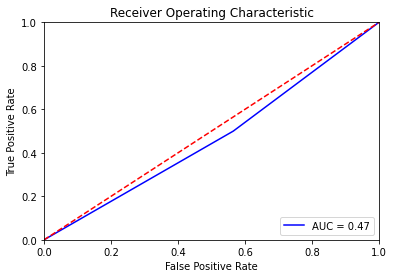

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[10 13]
 [ 9  9]]
El valor de f1_score obtenido: 0.45
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_SFS, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

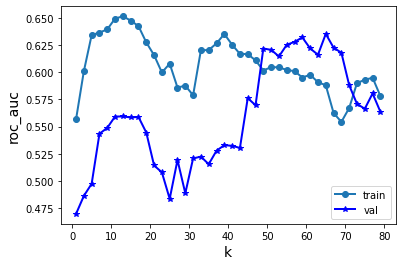

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.635
Valor correspondiente para el hiperparámetro: {'n_neighbors': 65}


In [ ]:
knn('roc_auc')

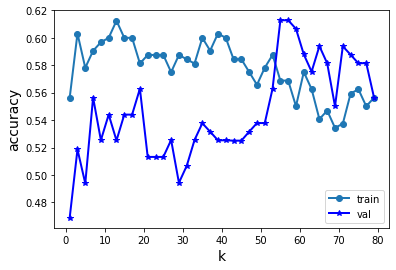

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
Valor correspondiente para el hiperparámetro: {'n_neighbors': 55}


In [ ]:
knn('accuracy')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 55)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_SFS, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_SFS)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 6 17]
 [ 3 15]]
El valor de f1_score obtenido: 0.6
El valor de recall es 0.8333333333333334


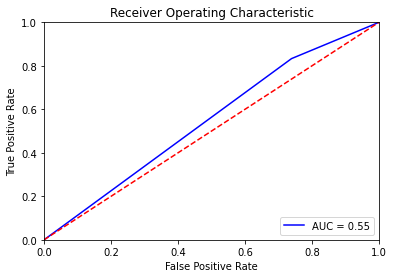

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 6 17]
 [ 3 15]]
El valor de f1_score obtenido: 0.6
El valor de recall es 0.8333333333333334


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,5)}
  profundidad_grid = np.array(range(1,5))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_SFS, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


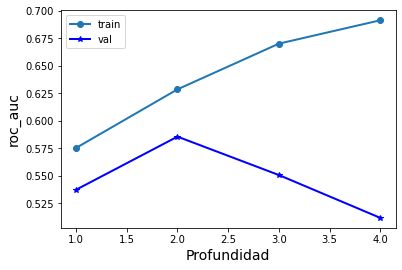

Mejor valor de la figura de mérito en validación cruzada: 0.586
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

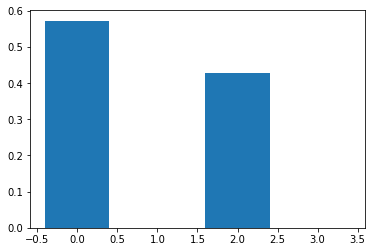

ValueError: ignored

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_SFS, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_SFS)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[:,],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[15  8]
 [11  7]]
El valor de f1_score obtenido: 0.42424242424242425
El valor de sensibilidad es 0.3888888888888889


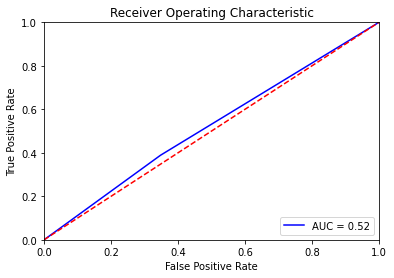

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5365853658536586
La matriz de confusión obtenida: [[15  8]
 [11  7]]
El valor de f1_score obtenido: 0.42424242424242425
El valor de recall es 0.3888888888888889


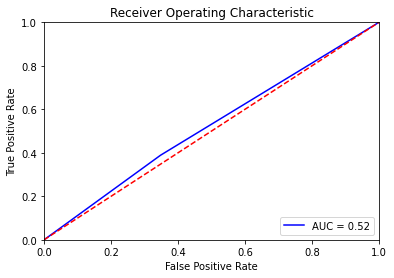

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.574


In [ ]:


svc=SVC(C=0.001,kernel='poly',gamma=1e-05,decision_function_shape='ovo')
svc.fit(X_train_SFS,Y_train)
y_test_pred=svc.predict(X_test_SFS)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


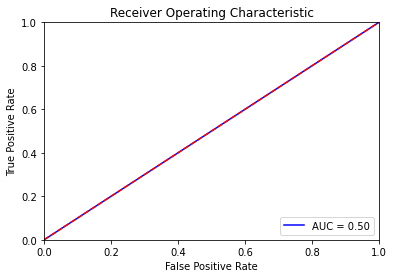

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística-árbol", "Knn-árbol","Árbol-arbol","SVC-árbol","Regresión logística-chi2", "Knn-chi2","Árbol-chi2","SVC-chi2","Regresión logística-SFS-knn", "Knn-SFS-knn","Árbol-SFS-knn","SVC-SFS-knn","Regresión logística-SBE-knn", "Knn-SBE-knn","Árbol-SBE-knn","SVC-SBE-knn"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                            
Regresión logística-árbol    0.609756  0.666667  0.600000  0.615942
Knn-árbol                    0.585366  0.500000  0.514286  0.576087
Árbol-arbol                  0.463415  0.500000  0.450000  0.467391
SVC-árbol                    0.439024  0.444444  0.410256  0.439614
Regresión logística-chi2     0.487805  0.500000  0.461538  0.489130
Knn-chi2                     0.463415  0.500000  0.450000  0.467391
Árbol-chi2                   0.463415  0.500000  0.450000  0.467391
SVC-chi2                     0.439024  1.000000  0.610169  0.500000
Regresión logística-SFS-knn  0.512195  0.666667  0.545455  0.528986
Knn-SFS-knn                  0.536585  0.555556  0.512821  0.538647
Árbol-SFS-knn                0.536585  0.388889  0.424242  0.520531
SVC-SFS-knn                  0.536585  0.444444  0.457143  0.526570
Regresión logística-SBE-knn  0.463415  0.500000  0.450000  0.467391
Knn-SBE-knn                  0.512195  0.833333  0.600000  0.547101
Árbol-SBE-knn                0.536585  0.388889  0.424242  0.520531
SVC-SBE-knn                  0.439024  1.000000  0.610169  0.500000